In [5]:
data <- read.csv("https://raw.githubusercontent.com/Clerin26/Project/6cf485e5fa17458176f5aa70c7929bba4c233c3d/School%20Survey%20(1).csv")

head(data)
print(nrow(data))




X KH         ATTITUDE_ENG.5 INTEREST_ENG.5 CLASSMATERELATION.5
1 1 1052010101 586.23         621.79         588.30             
2 2 1052010102 586.23         486.39         359.71             
3 3 1052010103 517.63         520.31         588.30             
4 4 1052010105 586.23         621.79         588.30             
5 5 1052010106 418.47         389.93         588.30             
6 6 1052010107 517.63         567.66         522.64             
  CAMPUS_CONDITION.5 SATISIFACTION_LEARNING_MATH.5 STRATEGY_MATH.5
1 481.70             509.82                        539.17         
2 423.55             691.82                        460.49         
3 636.77             544.19                        495.86         
4 506.95             478.61                        477.53         
5 583.84             509.82                        601.41         
6 583.84             363.61                        428.63         
  THR_MATH_NEW.5 PISA_12_ST81_ENG.5 ⋯ SELF_PROTECTION.9 ENG_LEVE9_KNOWLEDGE_T1
1 593.96         658.28             ⋯ 551.69            613.14                
2 593.96         542.17             ⋯ 551.69            662.84                
3 653.13         601.18             ⋯ 551.69            663.23                
4 593.96         553.55             ⋯ 386.80            604.29                
5 504.06         387.97             ⋯ 386.80            622.48                
6 331.84         658.28             ⋯ 551.69            663.23                
  ENG_LEVE9_KNOWLEDGE_T2 ENG9   ENG_LEVEL_9 MATH9  MATH_LEVE9_THINKING_T1
1 592.47                 574.94 3           611.20 647.56                
2 779.50                 664.68 4           546.40 464.60                
3 666.52                 662.50 4           700.80 608.86                
4 642.35                 625.95 4           695.56 662.44                
5 686.42                 697.72 4           640.72 681.35                
6 611.40                 608.16 4           581.91 594.28                
  MATH_LEVE9_THINKING_T2 MATH_LEVE9_KNOWLEDGE_T1 MATH_LEVE9_KNOWLEDGE_T2
1 702.33                 664.52                  500.40                 
2 503.30                 428.37                  552.00                 
3 567.61                 651.81                  667.40                 
4 624.70                 715.76                  649.37                 
5 468.67                 652.86                  588.40                 
6 415.19                 535.82                  672.10

[1] 390


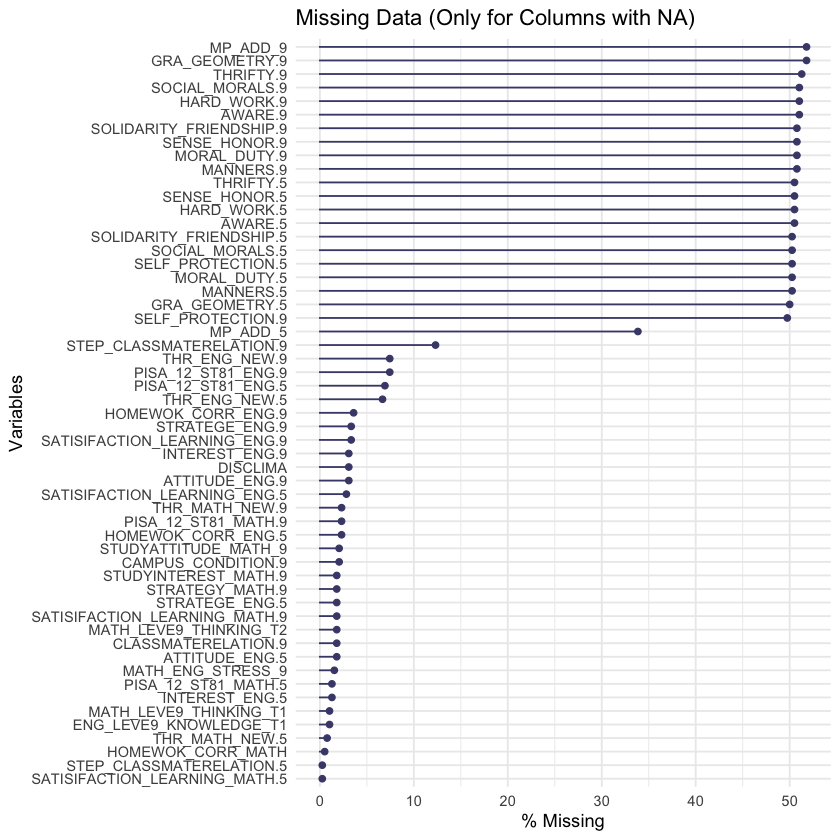

In [6]:

library(naniar)
library(ggplot2)

# Keep only columns with at least one missing value
data_na <- data[, colSums(is.na(data)) > 0]
gg_miss_var(data_na, show_pct = TRUE) +
  ggtitle("Missing Data (Only for Columns with NA)") +
  theme_minimal()

In [7]:
data$STEP_CLASSMATERELATION.5<-as.factor(data$STEP_CLASSMATERELATION.5)
data$ENG_LEVEL_5<-as.factor(data$ENG_LEVEL_5)
data$STEP_CLASSMATERELATION.9<-as.factor(data$STEP_CLASSMATERELATION.9)
data$ENG_LEVEL_9<-as.factor(data$ENG_LEVEL_9)
str(data)

library(VIM)
vars_with_na <- names(data)[colSums(is.na(data)) > 0]
data_imputed <- kNN(data, variable = vars_with_na, k = 9, imp_var = FALSE)
colSums(is.na(data_imputed))
head(data_imputed)
str(data_imputed)

data_imputed2 <- data_imputed[,!names(data_imputed) %in% c("X","KH", "ENG_LEVEL_5","ENG_LEVEL_5", 
  "ENG_LEVE5_KNOWLEDGE_T1", 
  "ENG_LEVE5_KNOWLEDGE_T2",
  "MATH_LEVE5_KNOWLEDGE_T1", 
  "MATH_LEVE5_KNOWLEDGE_T2",
  "MATH_LEVE5_THINKING_T2", 
  "MATH_LEVE5_THINKING_T1",
  "ENG_LEVEL_9", 
  "ENG_LEVE9_KNOWLEDGE_T1", 
  "ENG_LEVE9_KNOWLEDGE_T2",
  "MATH_LEVE9_KNOWLEDGE_T1", 
  "MATH_LEVE9_KNOWLEDGE_T2",
  "MATH_LEVE9_THINKING_T2", 
  "MATH_LEVE9_THINKING_T1")]

'data.frame':	390 obs. of  77 variables:
 $ X                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ KH                           : int  1052010101 1052010102 1052010103 1052010105 1052010106 1052010107 1052010108 1052010109 1052010110 1052010111 ...
 $ ATTITUDE_ENG.5               : num  586 586 518 586 418 ...
 $ INTEREST_ENG.5               : num  622 486 520 622 390 ...
 $ CLASSMATERELATION.5          : num  588 360 588 588 588 ...
 $ CAMPUS_CONDITION.5           : num  482 424 637 507 584 ...
 $ SATISIFACTION_LEARNING_MATH.5: num  510 692 544 479 510 ...
 $ STRATEGY_MATH.5              : num  539 460 496 478 601 ...
 $ THR_MATH_NEW.5               : num  594 594 653 594 504 ...
 $ PISA_12_ST81_ENG.5           : num  658 542 601 554 388 ...
 $ THR_ENG_NEW.5                : num  534 534 611 510 470 ...
 $ HOMEWOK_CORR_MATH            : num  504 611 504 611 547 ...
 $ STRATEGE_ENG.5               : num  629 604 472 505 424 ...
 $ SATISIFACTION_LEARNING_ENG.5 : num  634 NA 589

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




X                            KH 
                            0                             0 
               ATTITUDE_ENG.5                INTEREST_ENG.5 
                            0                             0 
          CLASSMATERELATION.5            CAMPUS_CONDITION.5 
                            0                             0 
SATISIFACTION_LEARNING_MATH.5               STRATEGY_MATH.5 
                            0                             0 
               THR_MATH_NEW.5            PISA_12_ST81_ENG.5 
                            0                             0 
                THR_ENG_NEW.5             HOMEWOK_CORR_MATH 
                            0                             0 
               STRATEGE_ENG.5  SATISIFACTION_LEARNING_ENG.5 
                            0                             0 
           HOMEWOK_CORR_ENG.5          STUDYINTEREST_MATH.5 
                            0                             0 
     STEP_CLASSMATERELATION.5           PISA_12_ST81_MATH.5 
                            0                             0 
            MATH_ENG_STRESS_5                     MANNERS.5 
                            0                             0 
              SOCIAL_MORALS.5                   HARD_WORK.5 
                            0                             0 
                     MP_ADD_5       SOLIDARITY_FRIENDSHIP.5 
                            0                             0 
                 MORAL_DUTY.5                     THRIFTY.5 
                            0                             0 
                      AWARE.5                 SENSE_HONOR.5 
                            0                             0 
               GRA_GEOMETRY.5             SELF_PROTECTION.5 
                            0                             0 
                  ENG_LEVEL_5                          ENG5 
                            0                             0 
       ENG_LEVE5_KNOWLEDGE_T1        ENG_LEVE5_KNOWLEDGE_T2 
                            0                             0 
      MATH_LEVE5_KNOWLEDGE_T1       MATH_LEVE5_KNOWLEDGE_T2 
                            0                             0 
                        MATH5        MATH_LEVE5_THINKING_T2 
                            0                             0 
       MATH_LEVE5_THINKING_T1                ATTITUDE_ENG.9 
                            0                             0 
               INTEREST_ENG.9           CLASSMATERELATION.9 
                            0                             0 
         STUDYINTEREST_MATH.9            CAMPUS_CONDITION.9 
                            0                             0 
         STUDYATTITUDE_MATH_9 SATISIFACTION_LEARNING_MATH.9 
                            0                             0 
              STRATEGY_MATH.9                      DISCLIMA 
                            0                             0 
               THR_MATH_NEW.9            PISA_12_ST81_ENG.9 
                            0                             0 
                THR_ENG_NEW.9  SATISIFACTION_LEARNING_ENG.9 
                            0                             0 
               STRATEGE_ENG.9            HOMEWOK_CORR_ENG.9 
                            0                             0 
     STEP_CLASSMATERELATION.9           PISA_12_ST81_MATH.9 
                            0                             0 
            MATH_ENG_STRESS_9                     MANNERS.9 
                            0                             0 
              SOCIAL_MORALS.9                 SENSE_HONOR.9 
                            0                             0 
                  HARD_WORK.9       SOLIDARITY_FRIENDSHIP.9 
                            0                             0 
                 MORAL_DUTY.9                     THRIFTY.9 
                            0                             0 
                      AWARE.9                      MP_ADD_9 
                            0                             0 
  

X KH         ATTITUDE_ENG.5 INTEREST_ENG.5 CLASSMATERELATION.5
1 1 1052010101 586.23         621.79         588.30             
2 2 1052010102 586.23         486.39         359.71             
3 3 1052010103 517.63         520.31         588.30             
4 4 1052010105 586.23         621.79         588.30             
5 5 1052010106 418.47         389.93         588.30             
6 6 1052010107 517.63         567.66         522.64             
  CAMPUS_CONDITION.5 SATISIFACTION_LEARNING_MATH.5 STRATEGY_MATH.5
1 481.70             509.82                        539.17         
2 423.55             691.82                        460.49         
3 636.77             544.19                        495.86         
4 506.95             478.61                        477.53         
5 583.84             509.82                        601.41         
6 583.84             363.61                        428.63         
  THR_MATH_NEW.5 PISA_12_ST81_ENG.5 ⋯ SELF_PROTECTION.9 ENG_LEVE9_KNOWLEDGE_T1
1 593.96         658.28             ⋯ 551.69            613.14                
2 593.96         542.17             ⋯ 551.69            662.84                
3 653.13         601.18             ⋯ 551.69            663.23                
4 593.96         553.55             ⋯ 386.80            604.29                
5 504.06         387.97             ⋯ 386.80            622.48                
6 331.84         658.28             ⋯ 551.69            663.23                
  ENG_LEVE9_KNOWLEDGE_T2 ENG9   ENG_LEVEL_9 MATH9  MATH_LEVE9_THINKING_T1
1 592.47                 574.94 3           611.20 647.56                
2 779.50                 664.68 4           546.40 464.60                
3 666.52                 662.50 4           700.80 608.86                
4 642.35                 625.95 4           695.56 662.44                
5 686.42                 697.72 4           640.72 681.35                
6 611.40                 608.16 4           581.91 594.28                
  MATH_LEVE9_THINKING_T2 MATH_LEVE9_KNOWLEDGE_T1 MATH_LEVE9_KNOWLEDGE_T2
1 702.33                 664.52                  500.40                 
2 503.30                 428.37                  552.00                 
3 567.61                 651.81                  667.40                 
4 624.70                 715.76                  649.37                 
5 468.67                 652.86                  588.40                 
6 415.19                 535.82                  672.10

'data.frame':	390 obs. of  77 variables:
 $ X                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ KH                           : int  1052010101 1052010102 1052010103 1052010105 1052010106 1052010107 1052010108 1052010109 1052010110 1052010111 ...
 $ ATTITUDE_ENG.5               : num  586 586 518 586 418 ...
 $ INTEREST_ENG.5               : num  622 486 520 622 390 ...
 $ CLASSMATERELATION.5          : num  588 360 588 588 588 ...
 $ CAMPUS_CONDITION.5           : num  482 424 637 507 584 ...
 $ SATISIFACTION_LEARNING_MATH.5: num  510 692 544 479 510 ...
 $ STRATEGY_MATH.5              : num  539 460 496 478 601 ...
 $ THR_MATH_NEW.5               : num  594 594 653 594 504 ...
 $ PISA_12_ST81_ENG.5           : num  658 542 601 554 388 ...
 $ THR_ENG_NEW.5                : num  534 534 611 510 470 ...
 $ HOMEWOK_CORR_MATH            : num  504 611 504 611 547 ...
 $ STRATEGE_ENG.5               : num  629 604 472 505 424 ...
 $ SATISIFACTION_LEARNING_ENG.5 : num  634 497 58

In [8]:

library(naniar)
library(ggplot2)

# Keep only columns with at least one missing value  (i got error here which is good as there is no NA columns)
data_na <- data_imputed2[, colSums(is.na(data_imputed2)) > 0]
gg_miss_var(data_na, show_pct = TRUE) +
  ggtitle("Missing Data (Only for Columns with NA)") +
  theme_minimal()

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'variable' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .

In [9]:
selected_vars <- c(
  "ATTITUDE_ENG.5", "INTEREST_ENG.5", "CLASSMATERELATION.5", "CAMPUS_CONDITION.5",
  "SATISIFACTION_LEARNING_MATH.5", "STRATEGY_MATH.5", "THR_MATH_NEW.5", "PISA_12_ST81_ENG.5",
  "THR_ENG_NEW.5", "HOMEWOK_CORR_MATH", "STRATEGE_ENG.5", "SATISIFACTION_LEARNING_ENG.5",
  "HOMEWOK_CORR_ENG.5", "STUDYINTEREST_MATH.5", "STEP_CLASSMATERELATION.5", "PISA_12_ST81_MATH.5",
  "MATH_ENG_STRESS_5", "MANNERS.5", "SOCIAL_MORALS.5", "HARD_WORK.5", "MP_ADD_5",
  "SOLIDARITY_FRIENDSHIP.5", "MORAL_DUTY.5", "THRIFTY.5", "AWARE.5", "SENSE_HONOR.5",
  "GRA_GEOMETRY.5", "SELF_PROTECTION.5", "ENG5", "MATH5"
)

reduced_data5 <- data_imputed2[, selected_vars]

In [10]:

selected_columns <- c(
  "ATTITUDE_ENG.9", "INTEREST_ENG.9", "CLASSMATERELATION.9", "STUDYINTEREST_MATH.9",
  "CAMPUS_CONDITION.9", "STUDYATTITUDE_MATH_9", "SATISIFACTION_LEARNING_MATH.9", 
  "STRATEGY_MATH.9", "DISCLIMA", "THR_MATH_NEW.9", "PISA_12_ST81_ENG.9", 
  "THR_ENG_NEW.9", "SATISIFACTION_LEARNING_ENG.9", "STRATEGE_ENG.9", 
  "HOMEWOK_CORR_ENG.9", "STEP_CLASSMATERELATION.9", "PISA_12_ST81_MATH.9", 
  "MATH_ENG_STRESS_9", "MANNERS.9", "SOCIAL_MORALS.9", "SENSE_HONOR.9", 
  "HARD_WORK.9", "SOLIDARITY_FRIENDSHIP.9", "MORAL_DUTY.9", "THRIFTY.9", 
  "AWARE.9", "MP_ADD_9", "GRA_GEOMETRY.9", "SELF_PROTECTION.9", 
  "ENG9", "MATH9"
)

# Subset the dataset
reduced_data9 <- data_imputed2[, selected_columns]

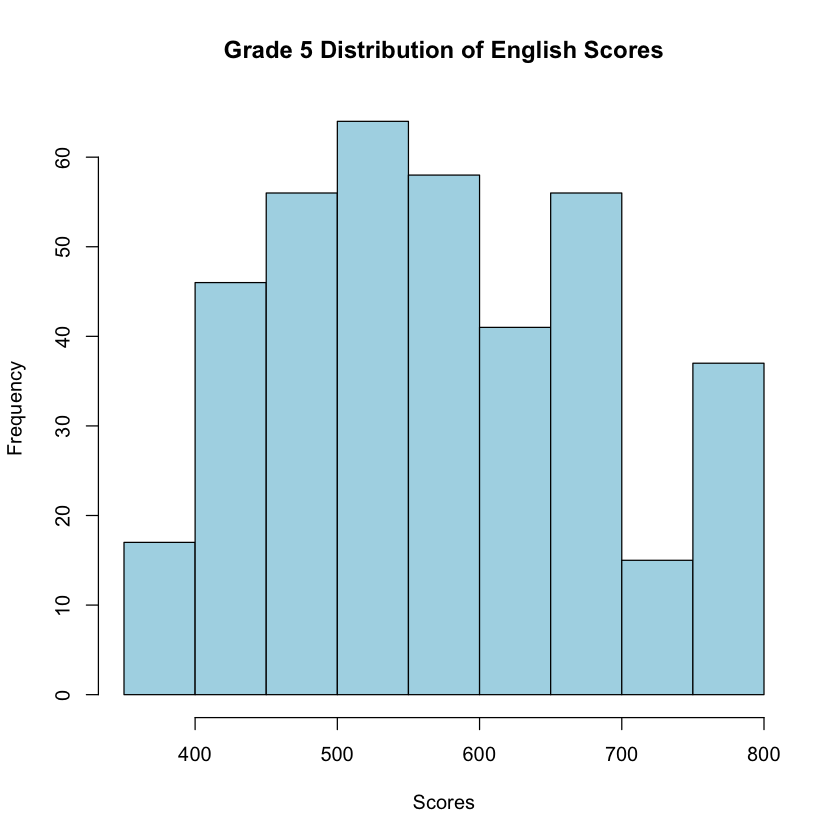

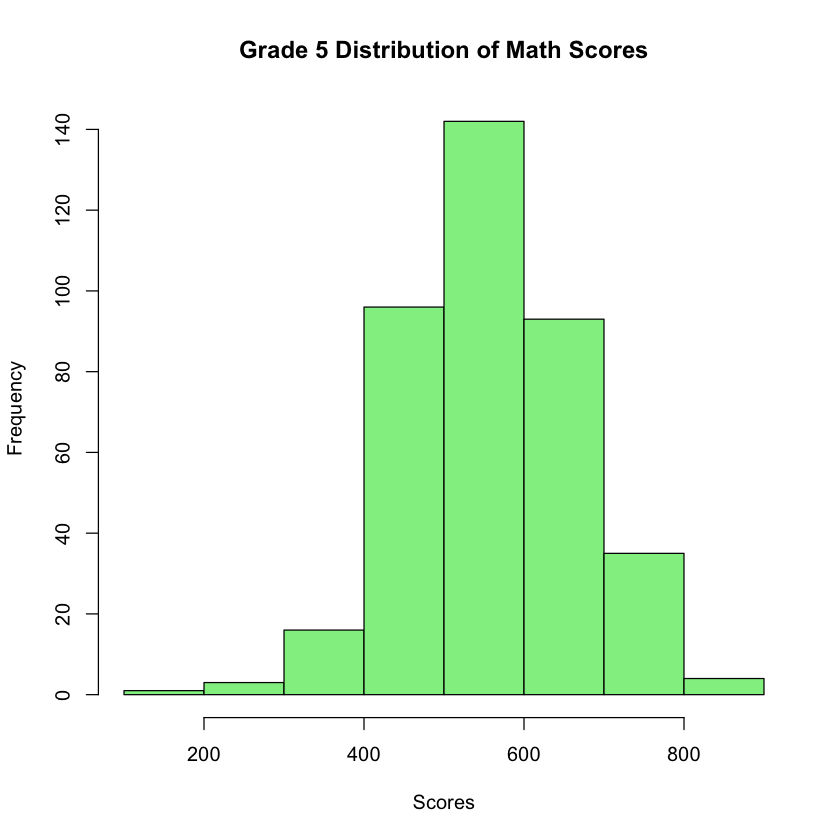

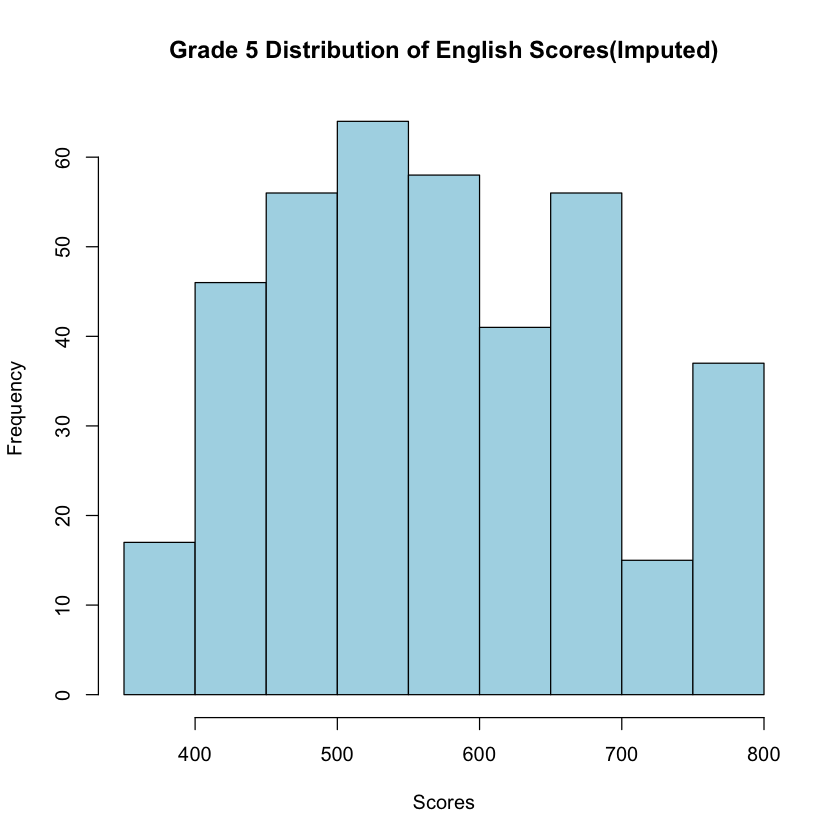

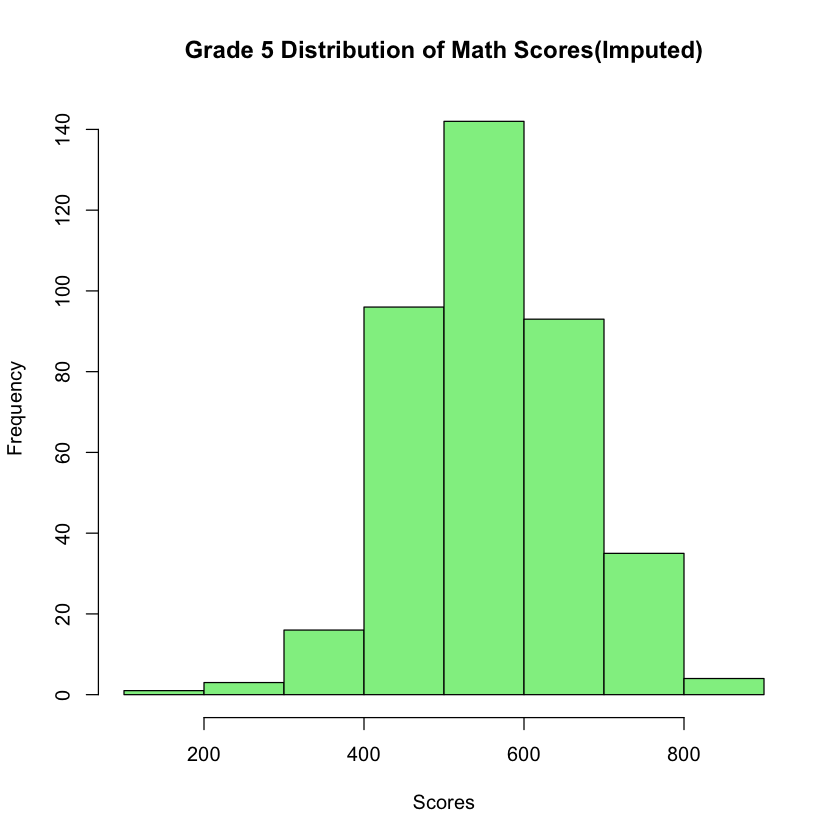

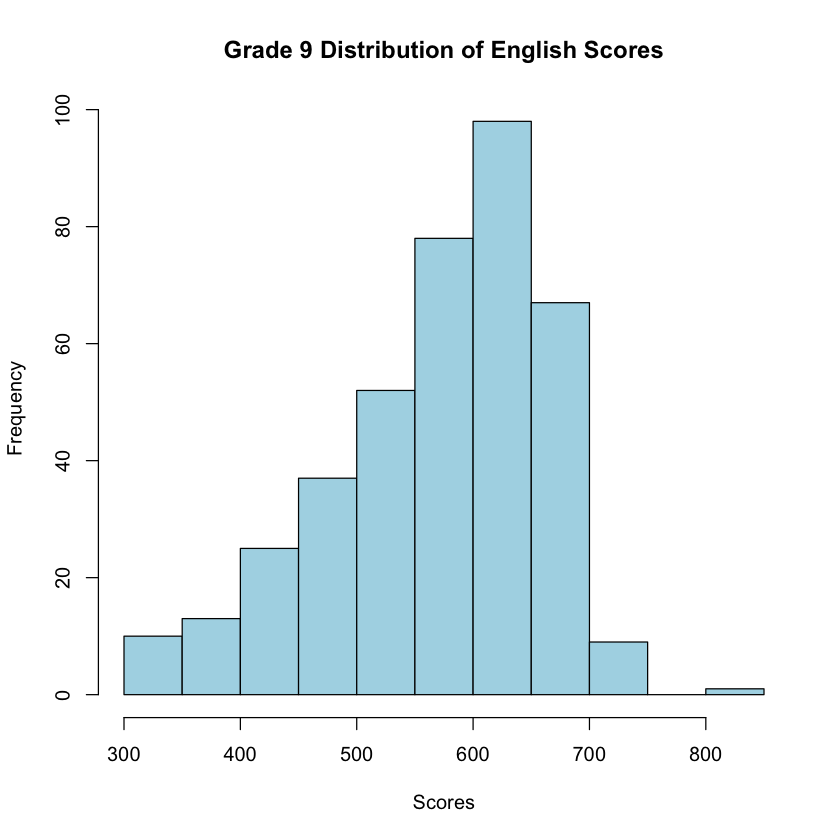

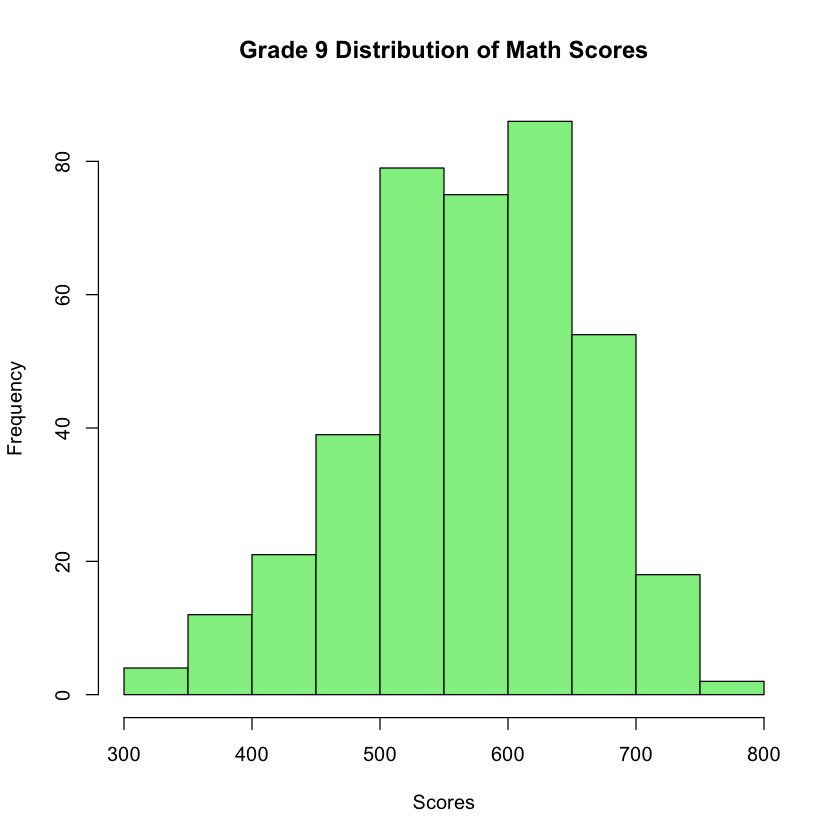

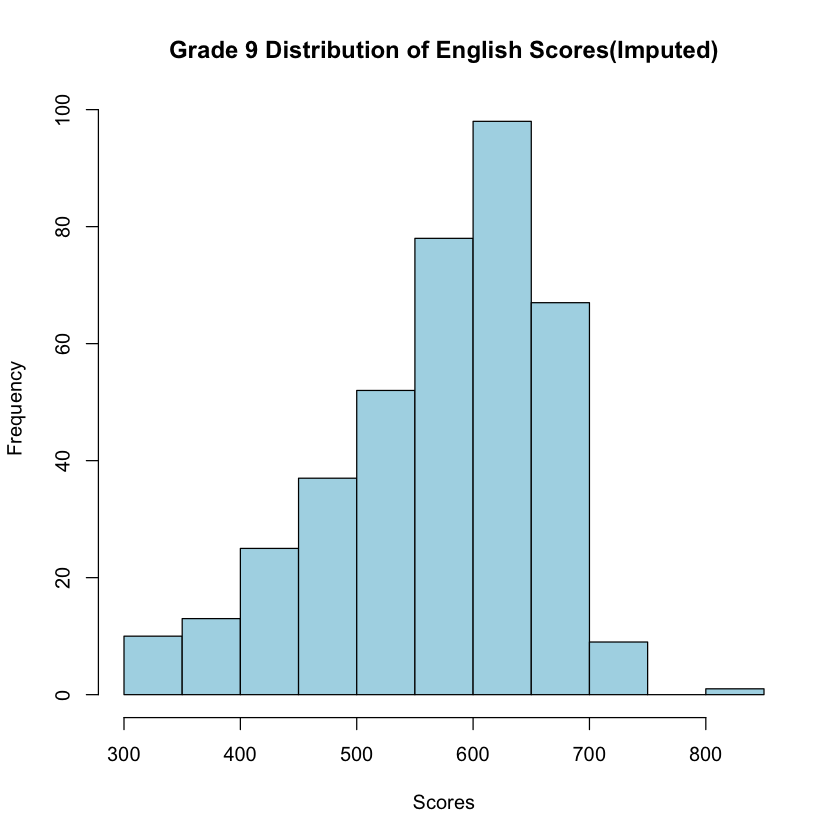

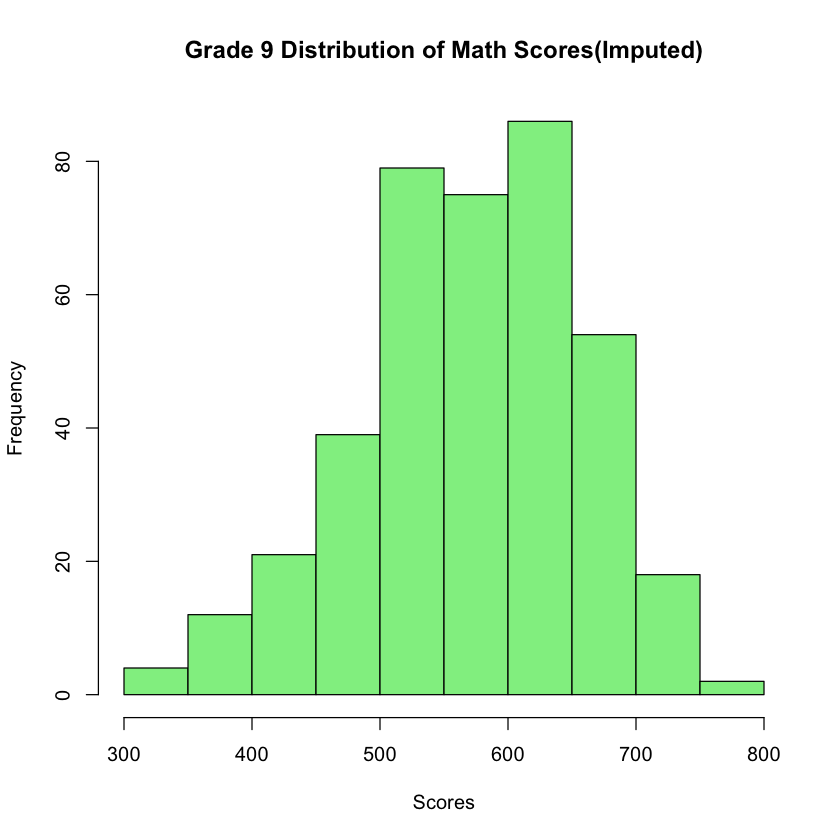

In [11]:


#without the imputed data
hist(data$ENG5,main="Grade 5 Distribution of English Scores",col="lightblue",xlab="Scores")
hist(data$MATH5,main="Grade 5 Distribution of Math Scores",col="lightgreen",xlab="Scores")

#both the graphs seems to be a almost normal distribution to me
hist(data_imputed2$ENG5,main="Grade 5 Distribution of English Scores(Imputed)",col="lightblue",xlab="Scores")
hist(data_imputed2$MATH5,main="Grade 5 Distribution of Math Scores(Imputed)",col="lightgreen",xlab="Scores")

#without the imputed data
hist(data$ENG9,main="Grade 9 Distribution of English Scores",col="lightblue",xlab="Scores") 
hist(data$MATH9,main="Grade 9 Distribution of Math Scores",col="lightgreen",xlab="Scores")


# roughly skewed to left the 9th grade english score is and almost normal distribution for math score
hist(data_imputed2$ENG9,main="Grade 9 Distribution of English Scores(Imputed)",col="lightblue",xlab="Scores")
hist(data_imputed2$MATH9,main="Grade 9 Distribution of Math Scores(Imputed)",col="lightgreen",xlab="Scores")



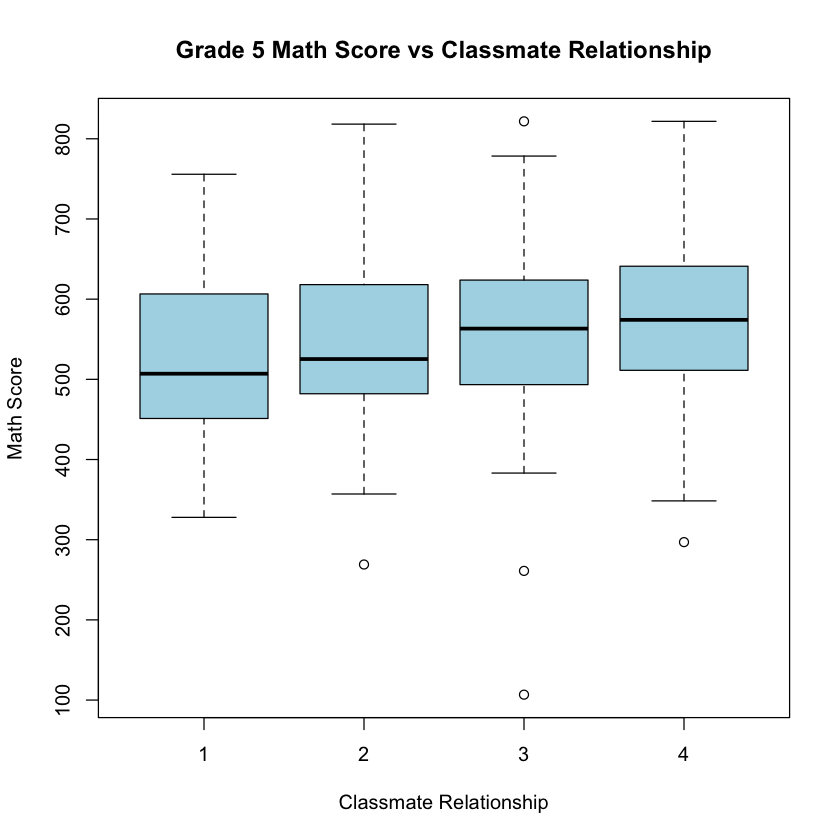

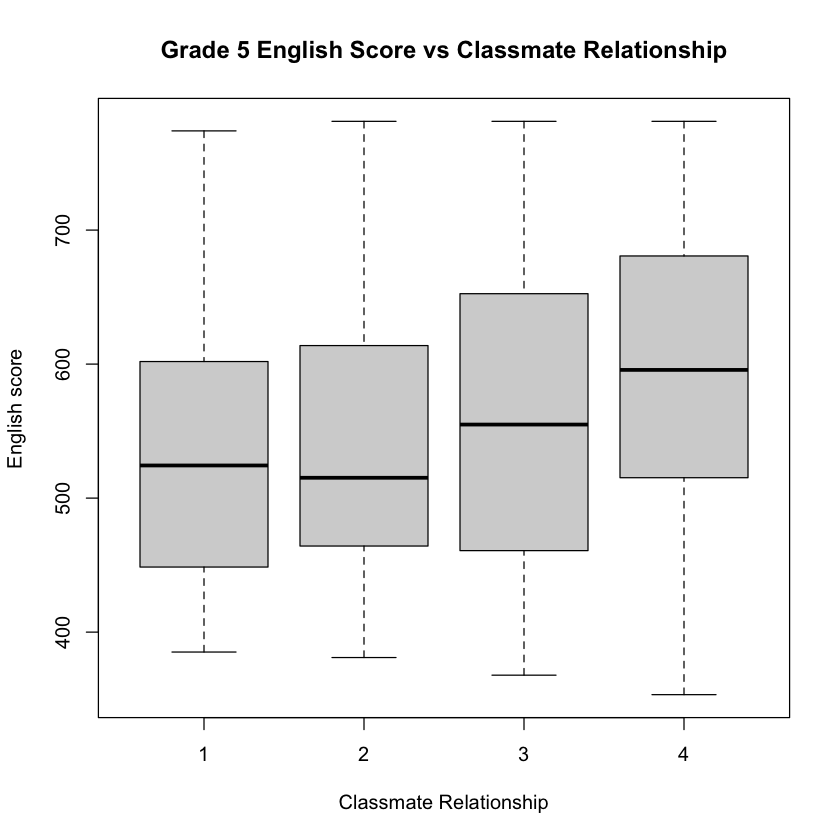

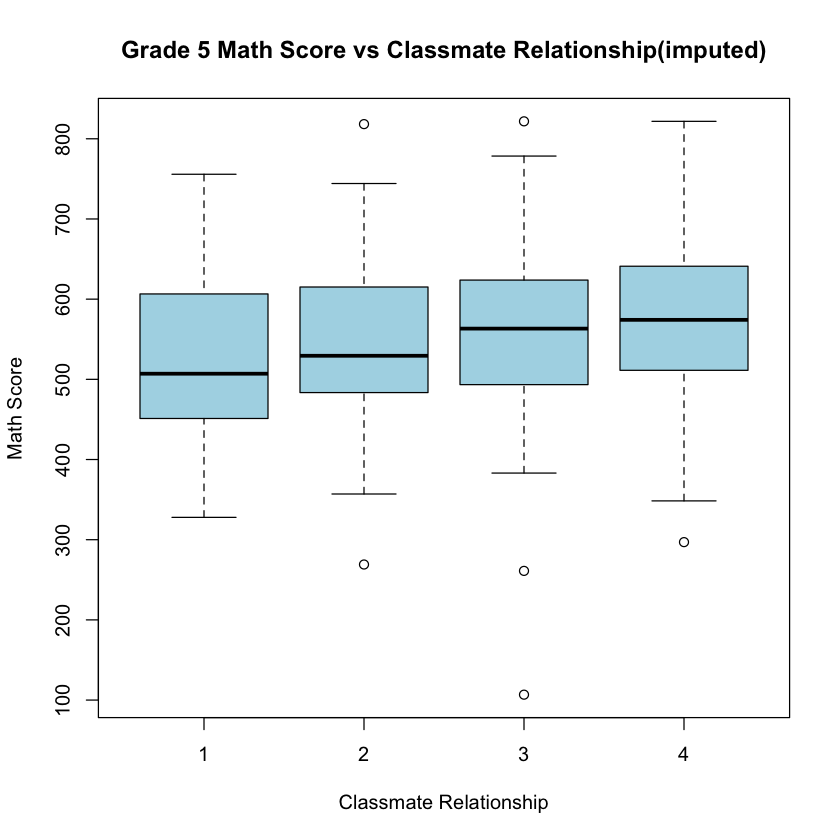

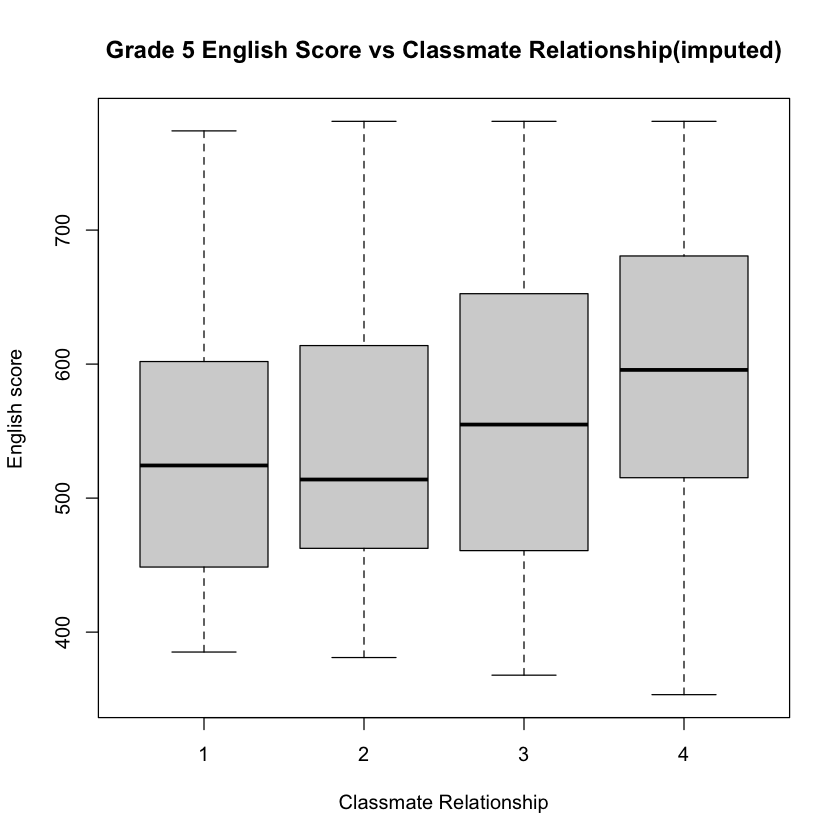

In [10]:
 # Students who report better relationships with classmates tend to score higher in English however there is high variability. similarly score improves for math when peer relationship improves
boxplot(data$MATH5 ~ data$STEP_CLASSMATERELATION.5,
        main = "Grade 5 Math Score vs Classmate Relationship",
        xlab = "Classmate Relationship",
        ylab = "Math Score",
        col = "lightblue") # as the classmate relation improves the score also improves
boxplot(main="Grade 5 English Score vs Classmate Relationship",data$ENG5~data$STEP_CLASSMATERELATION.5,xlab="Classmate Relationship",ylab="English score") # as the classmate relation increases the score also improves
##########################################


# Students who report better relationships with classmates tend to score higher in English however there is high variability. similarly score improves for math when peer relationship improves
boxplot(data_imputed2$MATH5 ~ data_imputed2$STEP_CLASSMATERELATION.5,
        main = "Grade 5 Math Score vs Classmate Relationship(imputed)",
        xlab = "Classmate Relationship",
        ylab = "Math Score",
        col = "lightblue") # as the classmate relation improves the score also improves
boxplot(main="Grade 5 English Score vs Classmate Relationship(imputed)",data_imputed2$ENG5~data_imputed2$STEP_CLASSMATERELATION.5,xlab="Classmate Relationship",ylab="English score") # as the classmate relation increases the score also improves
##########################################

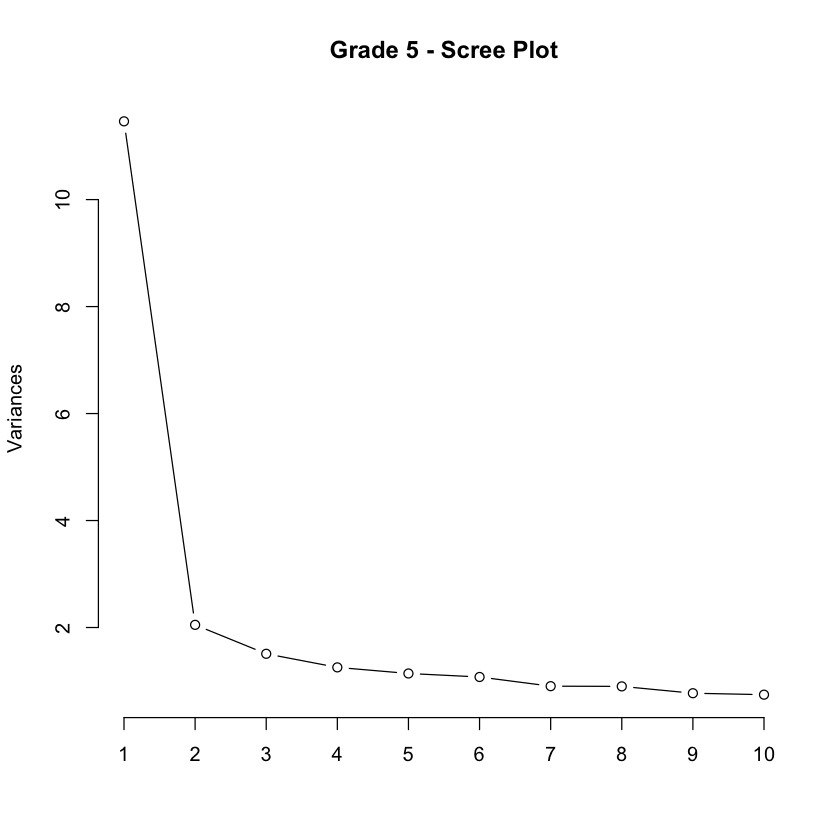

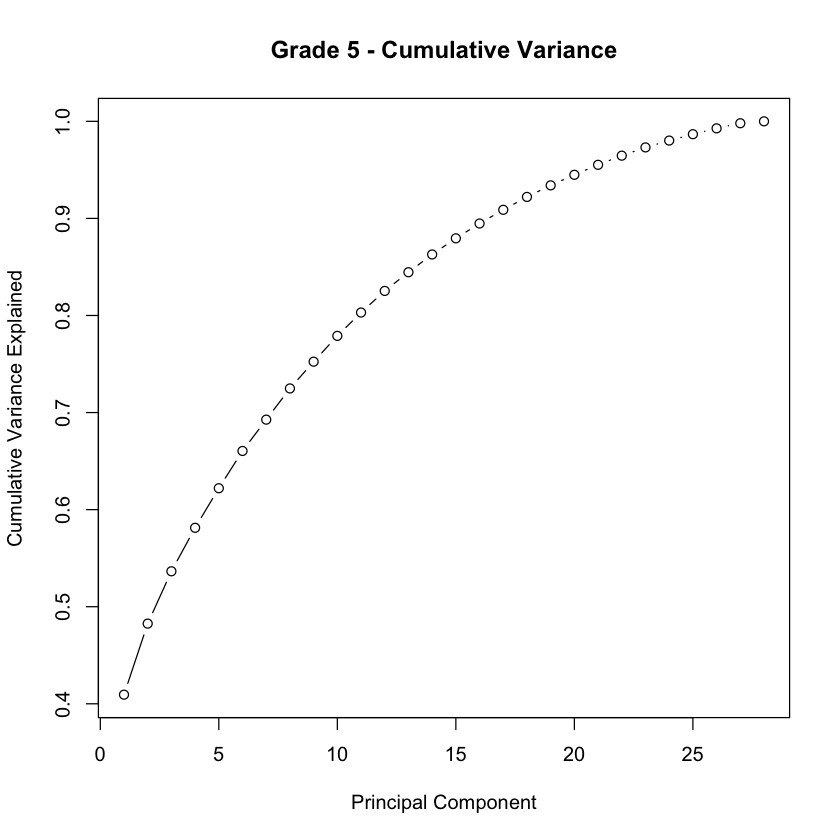

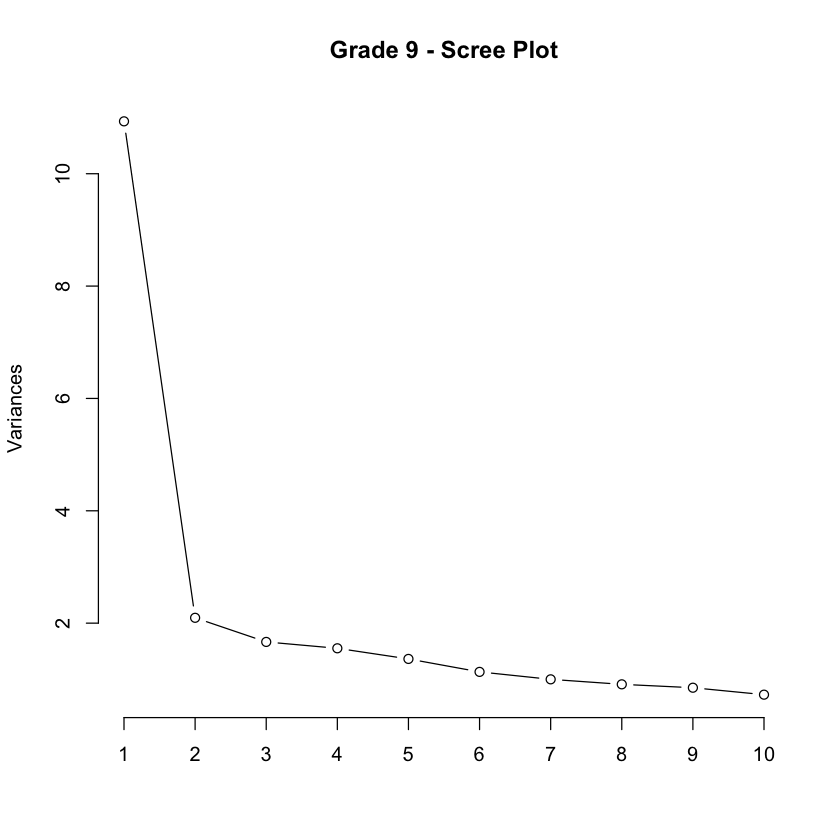

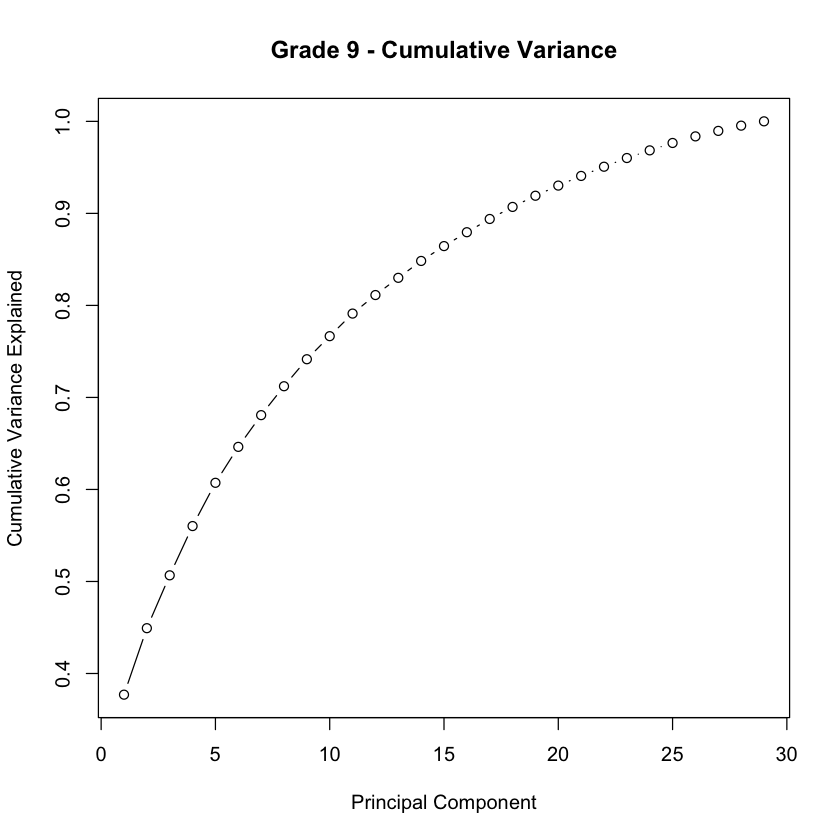

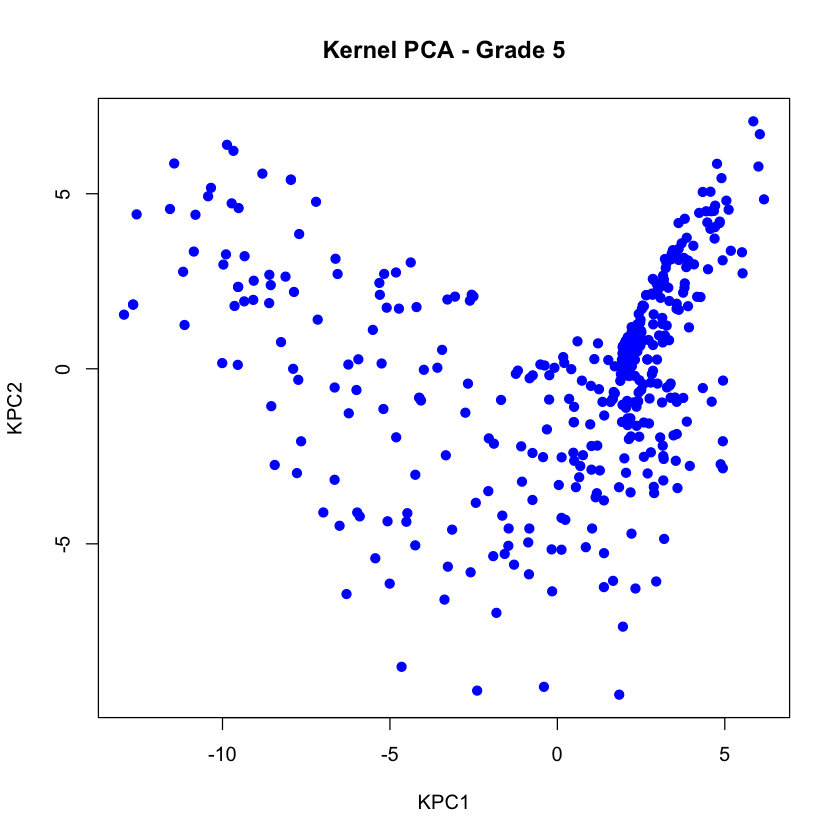

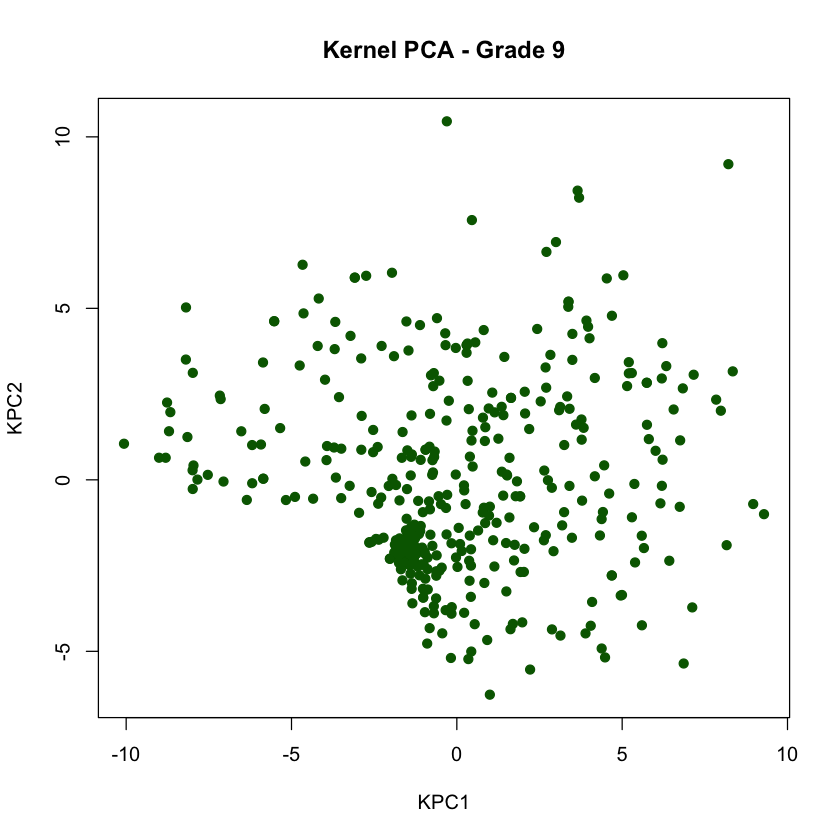

In [13]:


#Below whatever i did proved my data is nonlinearly dependent.

# --- Handle Ordinal Factors ---
reduced_data5$STEP_CLASSMATERELATION.5 <- as.numeric(as.character(reduced_data5$STEP_CLASSMATERELATION.5))
reduced_data9$STEP_CLASSMATERELATION.9 <- as.numeric(as.character(reduced_data9$STEP_CLASSMATERELATION.9))

# --- PCA for Grade 5 ---
pca_input5 <- reduced_data5[, !names(reduced_data5) %in% c("ENG5", "MATH5")]
scaled5 <- scale(pca_input5)
pca_5 <- prcomp(scaled5, center = TRUE, scale. = TRUE)

# Scree plot
plot(pca_5, type = "l", main = "Grade 5 - Scree Plot")

# Cumulative variance
cum_var5 <- cumsum(summary(pca_5)$importance[2,])
plot(cum_var5, type = "b", xlab = "Principal Component", 
     ylab = "Cumulative Variance Explained", main = "Grade 5 - Cumulative Variance")

# --- PCA for Grade 9 ---
pca_input9 <- reduced_data9[, !names(reduced_data9) %in% c("ENG9", "MATH9")]
scaled9 <- scale(pca_input9)
pca_9 <- prcomp(scaled9, center = TRUE, scale. = TRUE)

# Scree plot
plot(pca_9, type = "l", main = "Grade 9 - Scree Plot")

# Cumulative variance
cum_var9 <- cumsum(summary(pca_9)$importance[2,])
plot(cum_var9, type = "b", xlab = "Principal Component", 
     ylab = "Cumulative Variance Explained", main = "Grade 9 - Cumulative Variance")

# --- Optional: Extract PCA Scores (Top 20 Components) ---
pca_scores5 <- as.data.frame(pca_5$x[, 1:20])
pca_data5 <- cbind(pca_scores5, reduced_data5[, c("ENG5", "MATH5")])

pca_scores9 <- as.data.frame(pca_9$x[, 1:20])
pca_data9 <- cbind(pca_scores9, reduced_data9[, c("ENG9", "MATH9")])

#install.packages("kernlab")  # Run only once
library(kernlab)
library(ggplot2)
library(dplyr)
library(ranger)
# Kernel PCA using RBF kernel (captures non-linear structure)
kpca_5 <- kpca(~., data = as.data.frame(scaled5), kernel = "rbfdot", features = 10)

# Plot first two kernel principal components
plot(rotated(kpca_5)[,1], rotated(kpca_5)[,2],
     main = "Kernel PCA - Grade 5",
     xlab = "KPC1", ylab = "KPC2", col = "blue", pch = 19)
kpca_9 <- kpca(~., data = as.data.frame(scaled9), kernel = "rbfdot", features = 10)

plot(rotated(kpca_9)[,1], rotated(kpca_9)[,2],
     main = "Kernel PCA - Grade 9",
     xlab = "KPC1", ylab = "KPC2", col = "darkgreen", pch = 19)


In [15]:
install.packages("energy")  # Run only once
library(energy)

also installing the dependency ‘gsl’





The downloaded binary packages are in
	/var/folders/bz/1g4hr5d93lv6wm_f9n21_kgh0000gn/T//Rtmp1mEwot/downloaded_packages


corrplot 0.95 loaded



                              ATTITUDE_ENG.5 INTEREST_ENG.5 CLASSMATERELATION.5
ATTITUDE_ENG.5                    1.00000000     0.62766802          0.30623753
INTEREST_ENG.5                    0.62766802     1.00000000          0.41188093
CLASSMATERELATION.5               0.30623753     0.41188093          1.00000000
CAMPUS_CONDITION.5                0.37121762     0.46652073          0.46394376
SATISIFACTION_LEARNING_MATH.5     0.18658570     0.35949698          0.46674946
STRATEGY_MATH.5                   0.37449572     0.53093409          0.57212249
THR_MATH_NEW.5                    0.43091373     0.42338491          0.46384907
PISA_12_ST81_ENG.5                0.40496250     0.55558917          0.40252645
THR_ENG_NEW.5                     0.46625047     0.63756498          0.42056231
HOMEWOK_CORR_MATH                 0.28111883     0.31260022          0.25276761
STRATEGE_ENG.5                    0.50249876     0.65392142          0.47619696
SATISIFACTION_LEARNING_ENG.5      0.3718

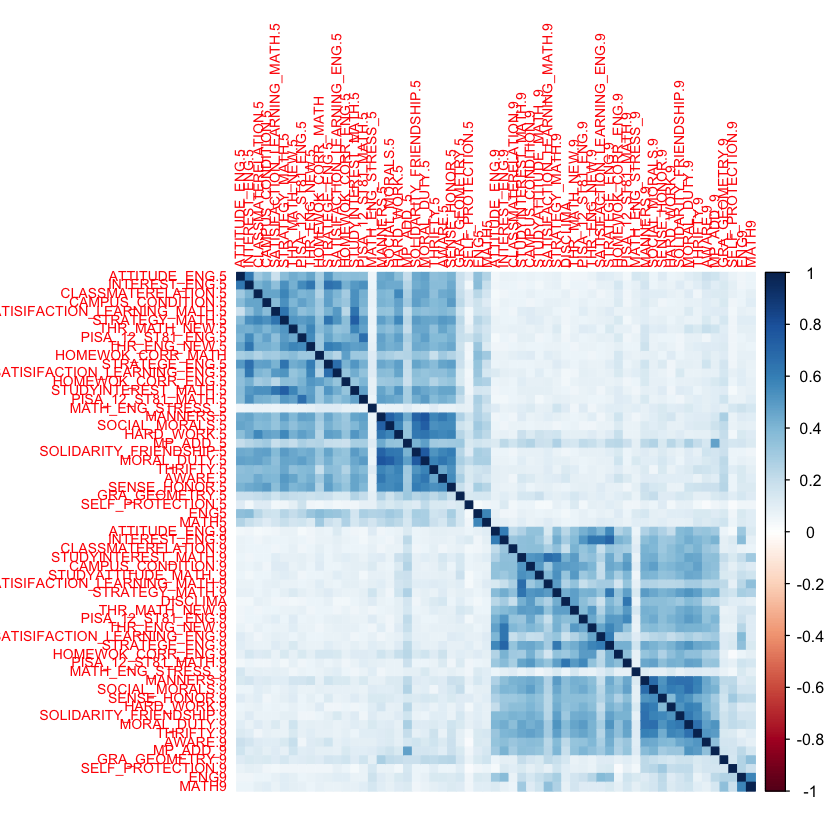

In [17]:
library(energy)

numeric_data <- data_imputed2[, sapply(data_imputed2, is.numeric)]
feature_names <- colnames(numeric_data)
n <- ncol(numeric_data)

dcor_matrix <- matrix(0, nrow = n, ncol = n)
colnames(dcor_matrix) <- rownames(dcor_matrix) <- feature_names

for (i in 1:n) {
  for (j in 1:n) {
    dcor_matrix[i, j] <- dcor(numeric_data[[i]], numeric_data[[j]])
  }
}
library(corrplot)
corrplot(dcor_matrix, method = "color", tl.cex = 0.7)
print(dcor_matrix)

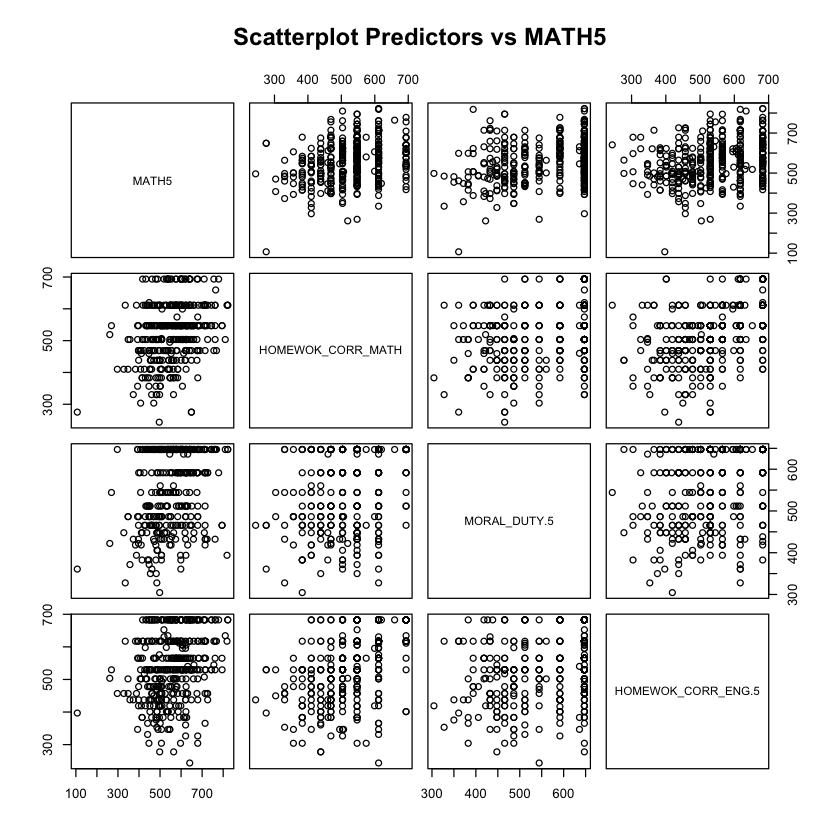

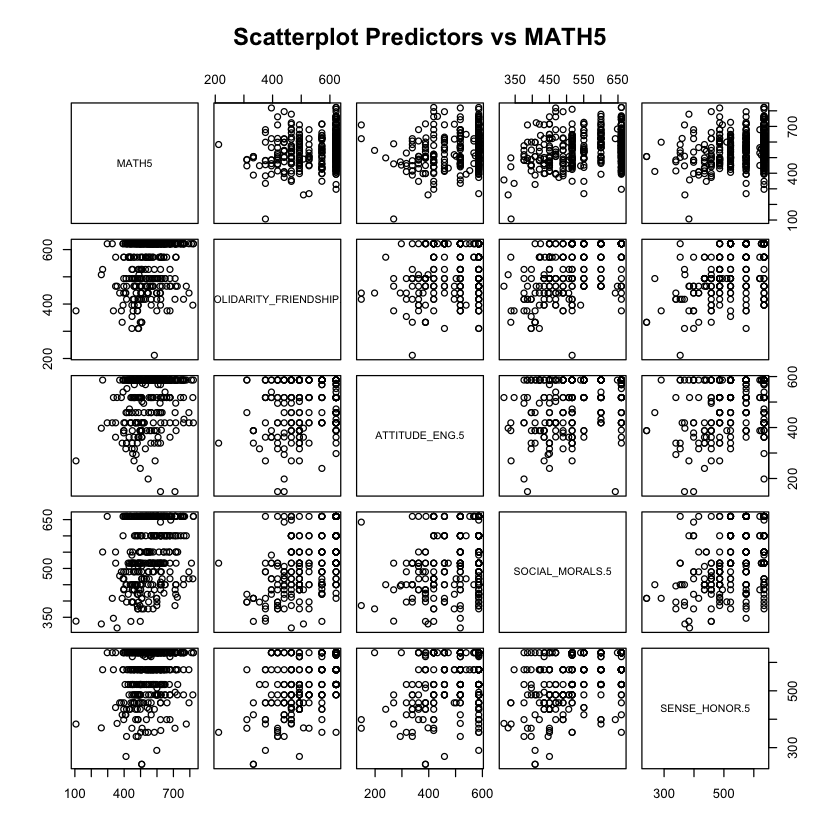

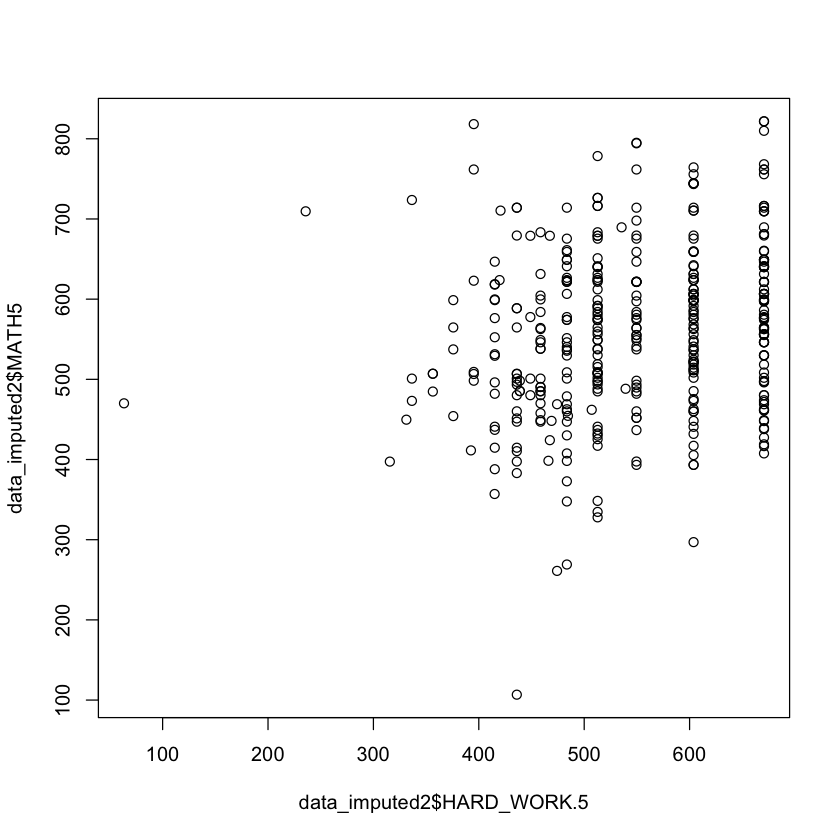

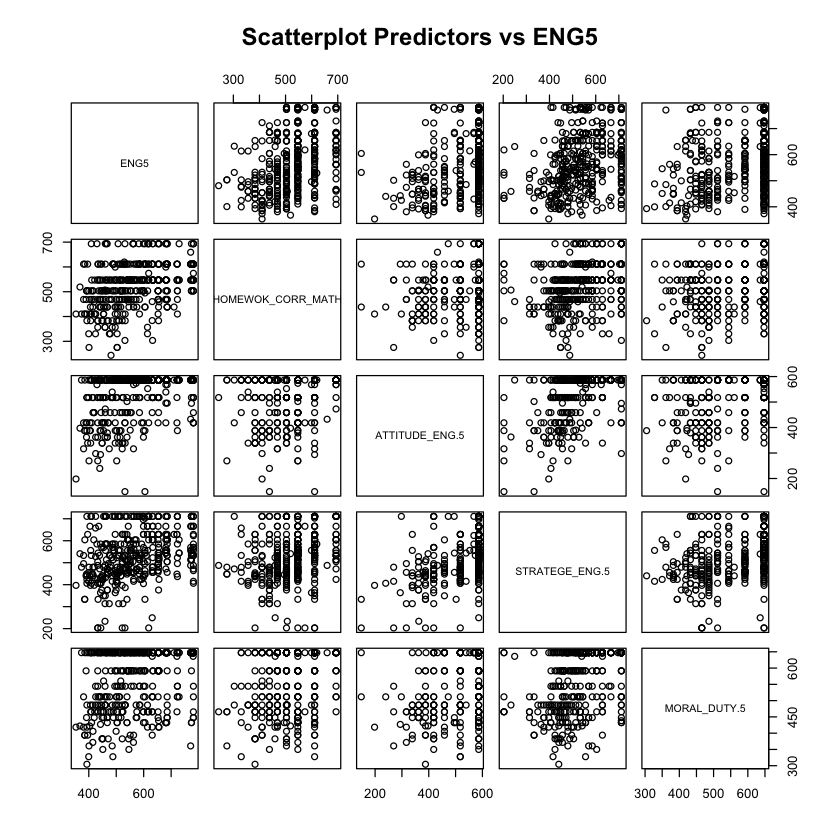

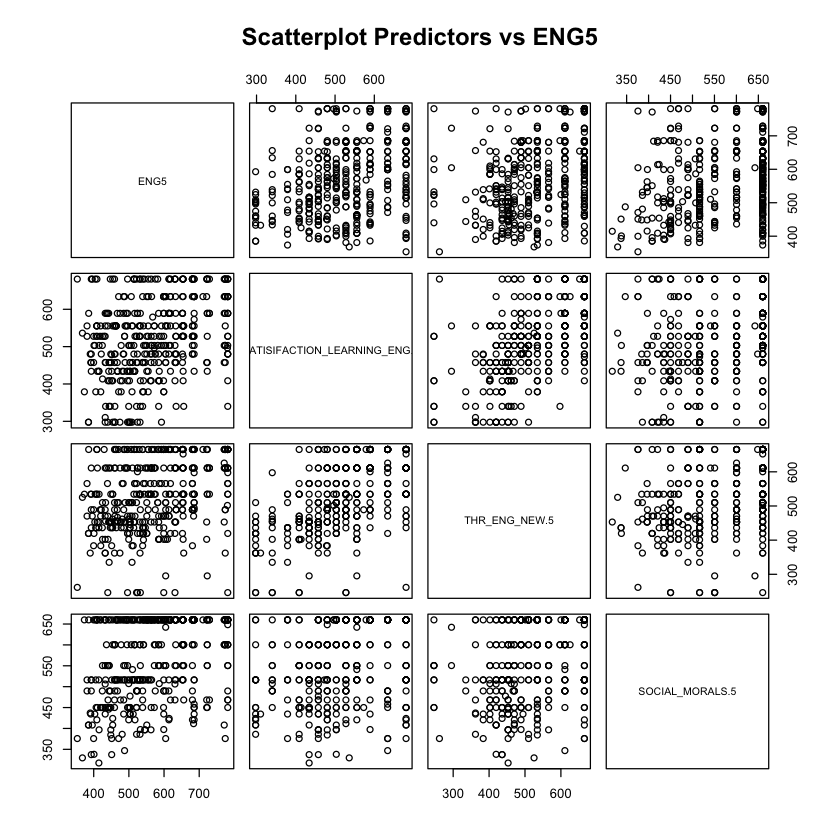

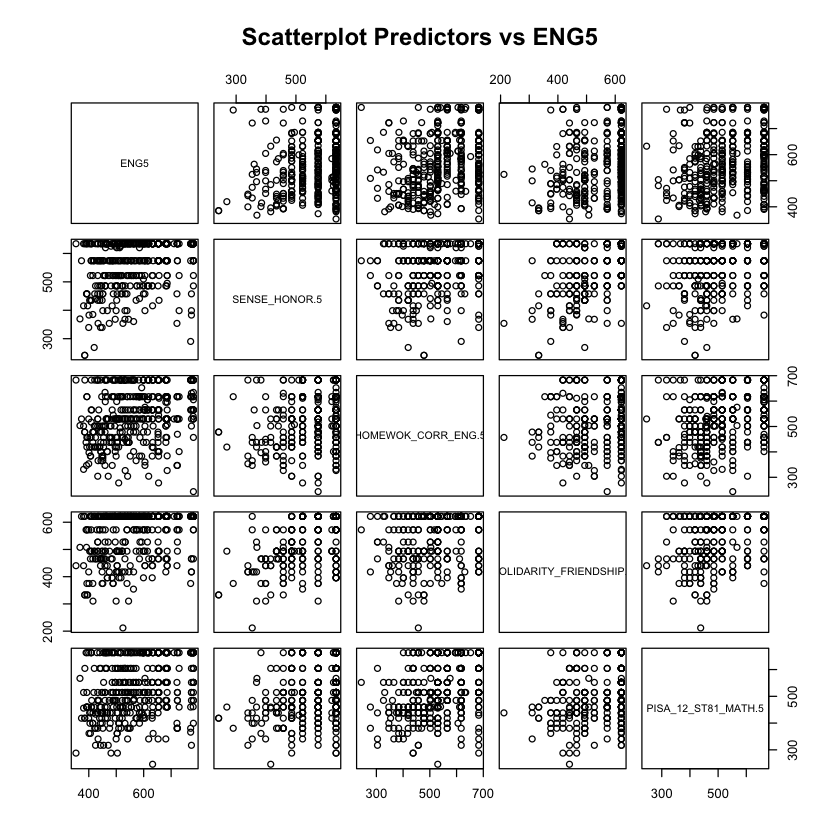

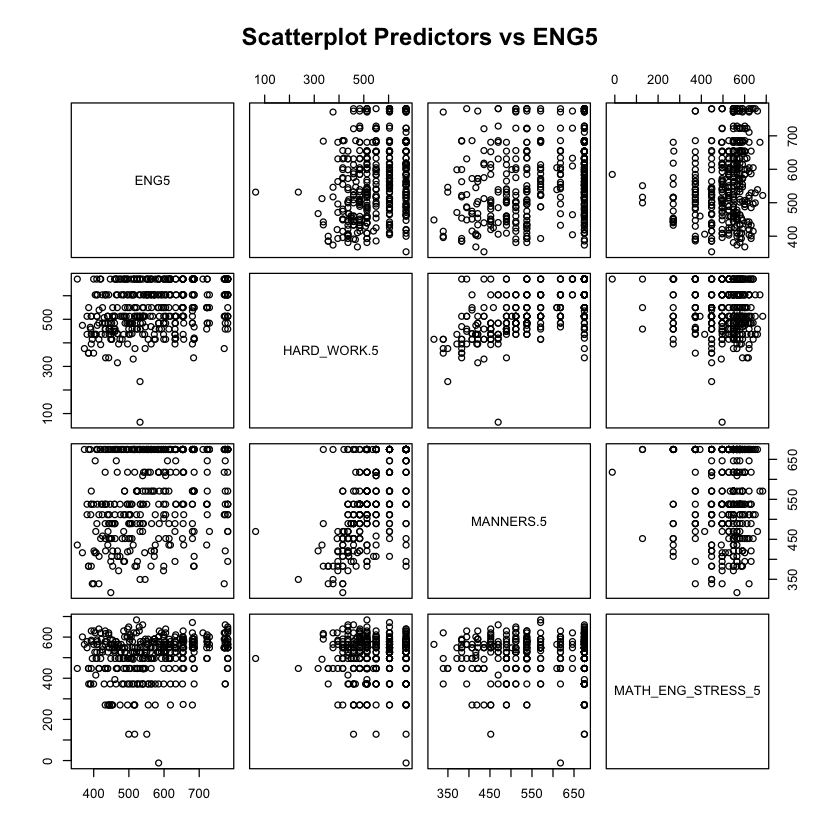

In [18]:
# Distance Correlation with MATH5:

selected_vars <- data_imputed2[, c("MATH5","HOMEWOK_CORR_MATH",
                                   "MORAL_DUTY.5","HOMEWOK_CORR_ENG.5")]
pairs(selected_vars, main = "Scatterplot Predictors vs MATH5")

selected_vars <- data_imputed2[, c("MATH5","SOLIDARITY_FRIENDSHIP.5",
                                   "ATTITUDE_ENG.5","SOCIAL_MORALS.5","SENSE_HONOR.5")]
pairs(selected_vars, main = "Scatterplot Predictors vs MATH5")

plot(data_imputed2$MATH5 ~ data_imputed2$HARD_WORK.5)

selected_vars <- data_imputed2[, c("ENG5","HOMEWOK_CORR_MATH",
                                   "ATTITUDE_ENG.5","STRATEGE_ENG.5","MORAL_DUTY.5")]
pairs(selected_vars, main = "Scatterplot Predictors vs ENG5")

selected_vars <- data_imputed2[, c("ENG5","SATISIFACTION_LEARNING_ENG.5",
                                   "THR_ENG_NEW.5","SOCIAL_MORALS.5")]
pairs(selected_vars, main = "Scatterplot Predictors vs ENG5")

selected_vars <- data_imputed2[, c("ENG5","SENSE_HONOR.5","HOMEWOK_CORR_ENG.5",
                                   "SOLIDARITY_FRIENDSHIP.5","PISA_12_ST81_MATH.5")]
pairs(selected_vars, main = "Scatterplot Predictors vs ENG5")

selected_vars <- data_imputed2[, c("ENG5","HARD_WORK.5","MANNERS.5","MATH_ENG_STRESS_5")]
pairs(selected_vars, main = "Scatterplot Predictors vs ENG5")


In [ ]:
selected_vars <- data_imputed2[, c("MATH9","SATISIFACTION_LEARNING_MATH.9",
                                   "GRA_GEOMETRY.9","STUDYINTEREST_MATH.9")]
pairs(selected_vars, main = "Scatterplot Predictors vs MATH5")

selected_vars <- data_imputed2[, c("MATH5","STRATEGY_MATH.9")]
pairs(selected_vars, main = "Scatterplot Predictors vs MATH9")

plot(data_imputed2$MATH5 ~ data_imputed2$HARD_WORK.5)

selected_vars <- data_imputed2[, c("ENG9","SATISIFACTION_LEARNING_ENG.9",
                                   "INTEREST_ENG.9","STRATEGE_ENG.9","ATTITUDE_ENG.9")]
pairs(selected_vars, main = "Scatterplot Predictors vs ENG9")

selected_vars <- data_imputed2[, c("ENG9","STRATEGY_MATH.9","SELF_PROTECTION.9","GRA_GEOMETRY.9")]
pairs(selected_vars, main = "Scatterplot Predictors vs ENG5")


In [ ]:
# # MATH9 vs SATISIFACTION_LEARNING_MATH.9
 plot(data_imputed2$MATH9 ~ data_imputed2$SATISIFACTION_LEARNING_MATH.9, #Very weak Consider treating as ordinal
      main = "MATH9 vs SATISIFACTION_LEARNING_MATH.9",
      xlab = "SATISIFACTION_LEARNING_MATH.9",
      ylab = "MATH9")

# # MATH9 vs GRA_GEOMETRY.9
 plot(data_imputed2$MATH9 ~ data_imputed2$GRA_GEOMETRY.9, #Moderate positive Use as continuous numerical var.
      main = "MATH9 vs GRA_GEOMETRY.9",
      xlab = "GRA_GEOMETRY.9",
      ylab = "MATH9")

# MATH9 vs STUDYINTEREST_MATH.9
plot(data_imputed2$MATH9 ~ data_imputed2$STUDYINTEREST_MATH.9,
     main = "MATH9 vs STUDYINTEREST_MATH.9",
     xlab = "STUDYINTEREST_MATH.9",
     ylab = "MATH9")

# MATH9 vs STRATEGY_MATH.9
plot(data_imputed2$MATH9 ~ data_imputed2$STRATEGY_MATH.9, #Weak to moderate
     main = "MATH9 vs STRATEGY_MATH.9",
     xlab = "STRATEGY_MATH.9",
     ylab = "MATH9")


In [ ]:
# # ENG9 vs SATISIFACTION_LEARNING_ENG.9
plot(data_imputed2$ENG9 ~ data_imputed2$SATISIFACTION_LEARNING_ENG.9,
     main = "ENG9 vs SATISIFACTION_LEARNING_ENG.9",
     xlab = "SATISIFACTION_LEARNING_ENG.9",
     ylab = "ENG9")

# # ENG9 vs INTEREST_ENG.9
plot(data_imputed2$ENG9 ~ data_imputed2$INTEREST_ENG.9,
     main = "ENG9 vs INTEREST_ENG.9",
     xlab = "INTEREST_ENG.9",
     ylab = "ENG9")

# # ENG9 vs STRATEGE_ENG.9 # promising predictor
plot(data_imputed2$ENG9 ~ data_imputed2$STRATEGE_ENG.9,
     main = "ENG9 vs STRATEGE_ENG.9",
     xlab = "STRATEGE_ENG.9",
     ylab = "ENG9")

# # ENG9 vs ATTITUDE_ENG.9
plot(data_imputed2$ENG9 ~ data_imputed2$ATTITUDE_ENG.9,
     main = "ENG9 vs ATTITUDE_ENG.9",
     xlab = "ATTITUDE_ENG.9",
     ylab = "ENG9")

# # ENG9 vs STRATEGY_MATH.9 
plot(data_imputed2$ENG9 ~ data_imputed2$STRATEGY_MATH.9,
     main = "ENG9 vs STRATEGY_MATH.9",
     xlab = "STRATEGY_MATH.9",
     ylab = "ENG9")

# # ENG9 vs SELF_PROTECTION.9 #can be considered as category
plot(data_imputed2$ENG9 ~ data_imputed2$SELF_PROTECTION.9,
     main = "ENG9 vs SELF_PROTECTION.9",
     xlab = "SELF_PROTECTION.9",
     ylab = "ENG9")

# ENG9 vs GRA_GEOMETRY.9
plot(data_imputed2$ENG9 ~ data_imputed2$GRA_GEOMETRY.9,
     main = "ENG9 vs GRA_GEOMETRY.9",
     xlab = "GRA_GEOMETRY.9",
     ylab = "ENG9")


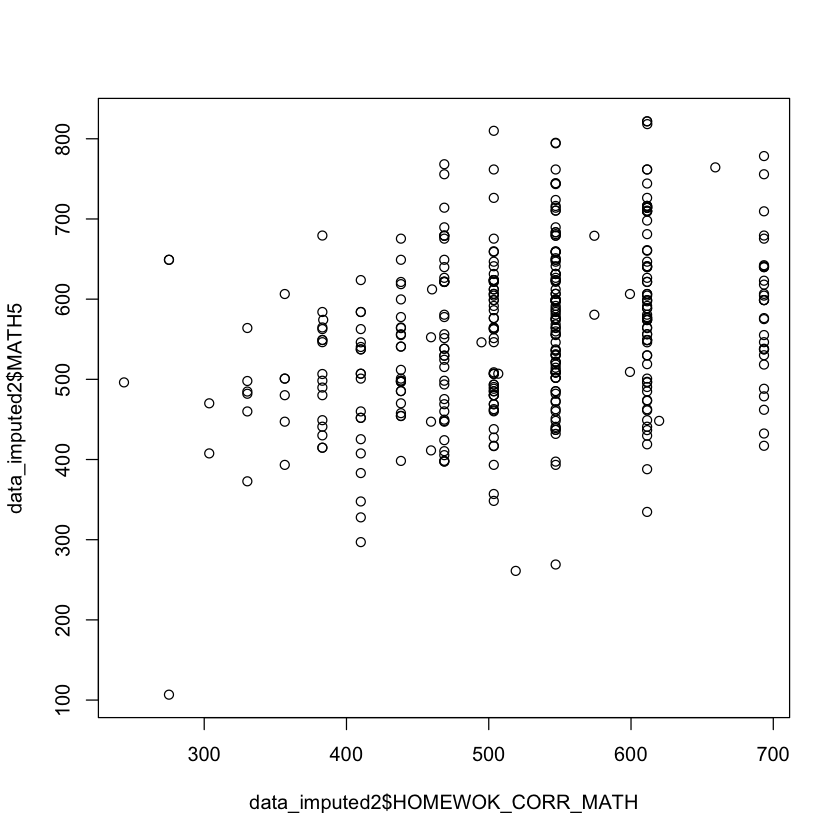

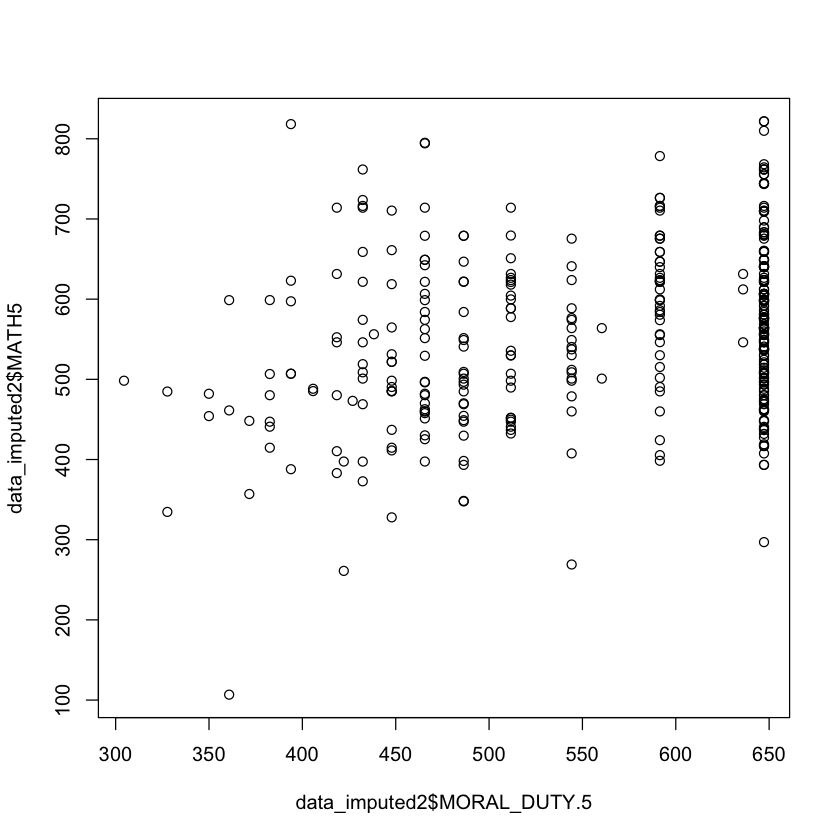

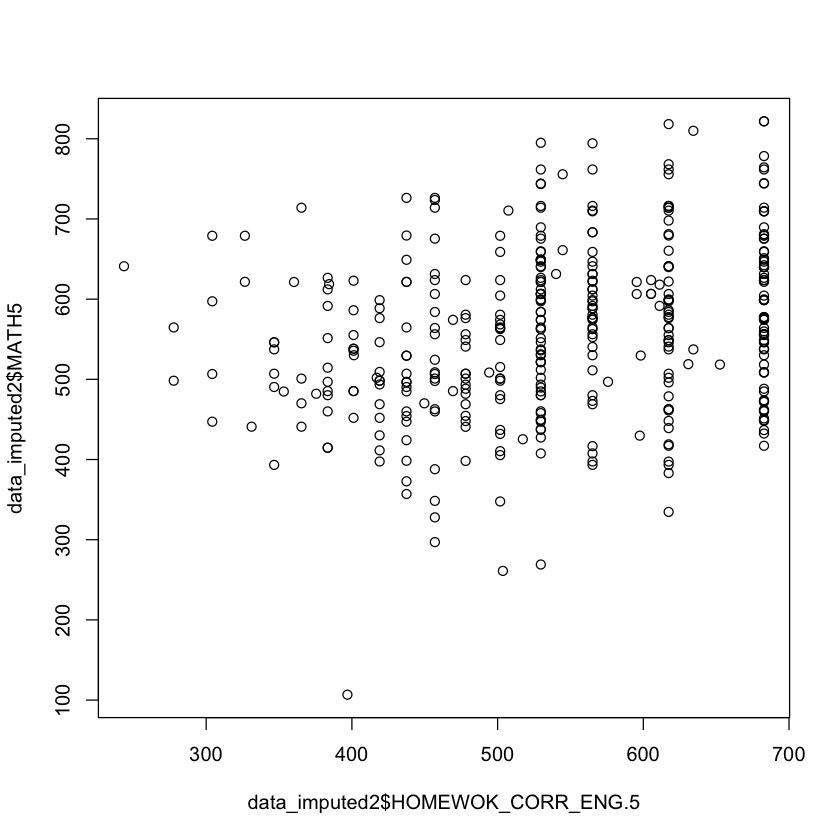

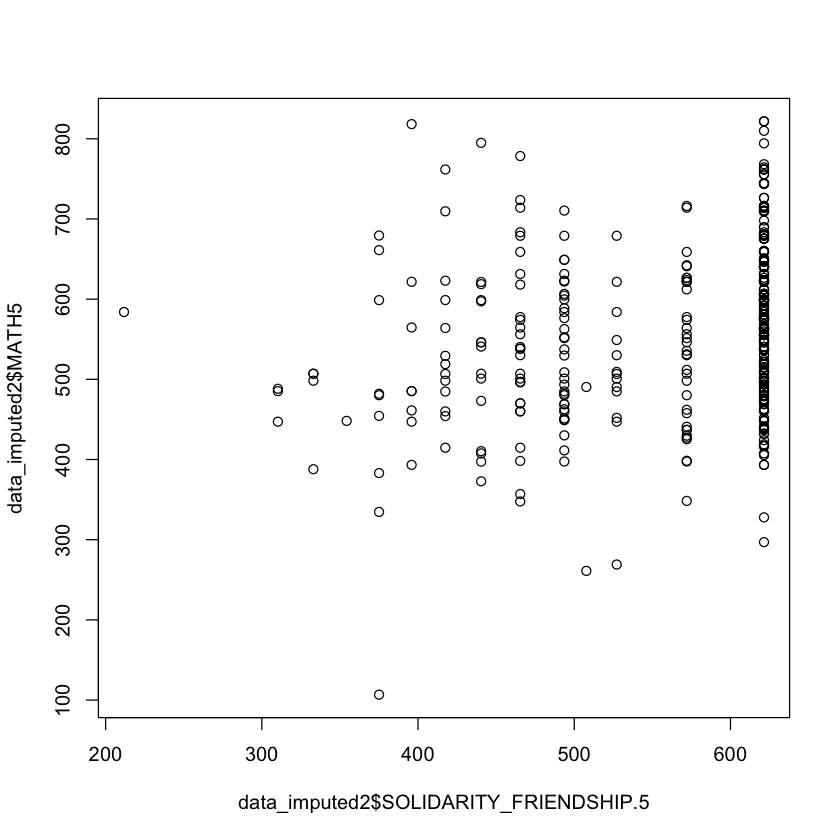

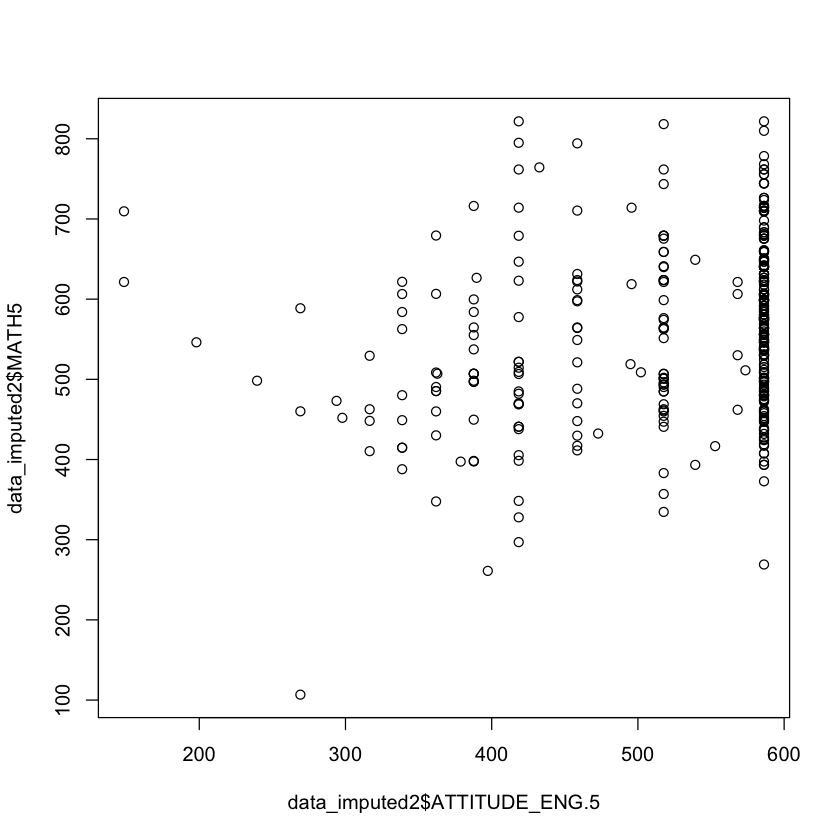

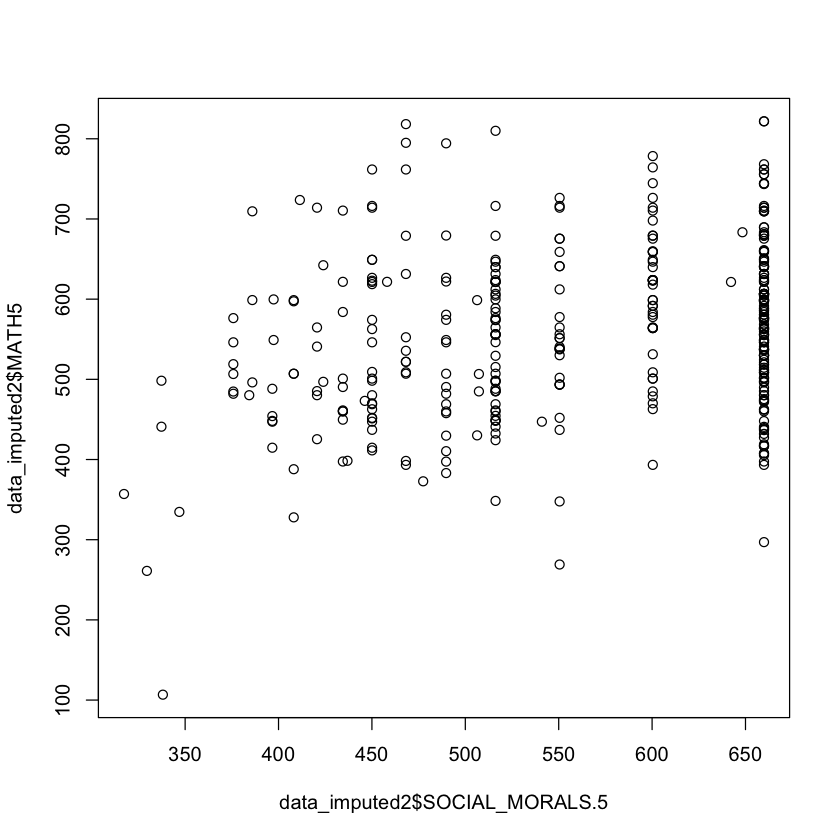

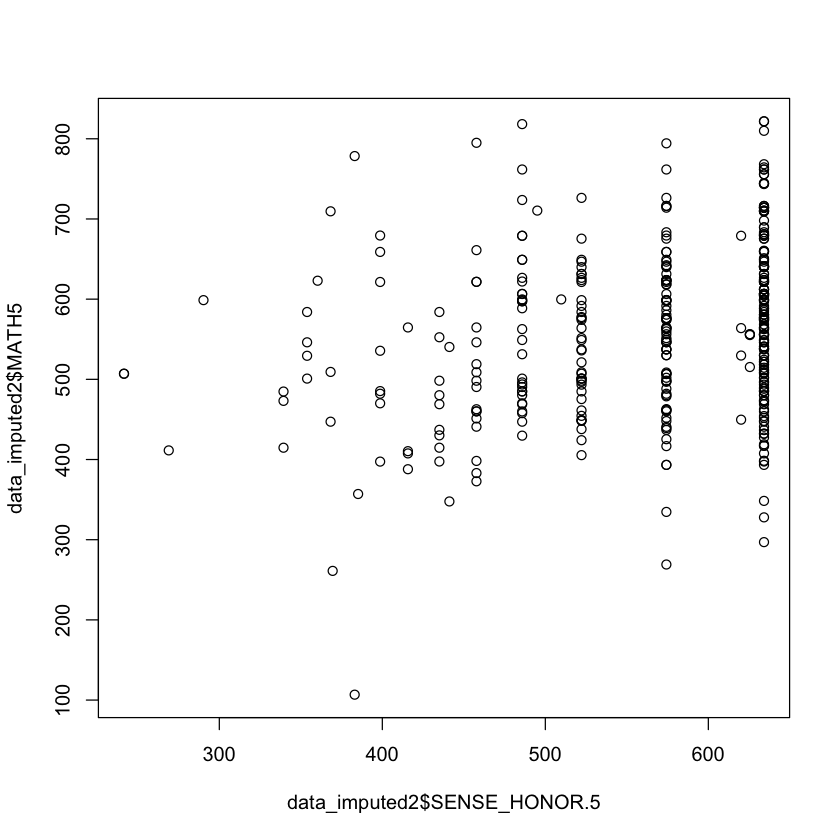

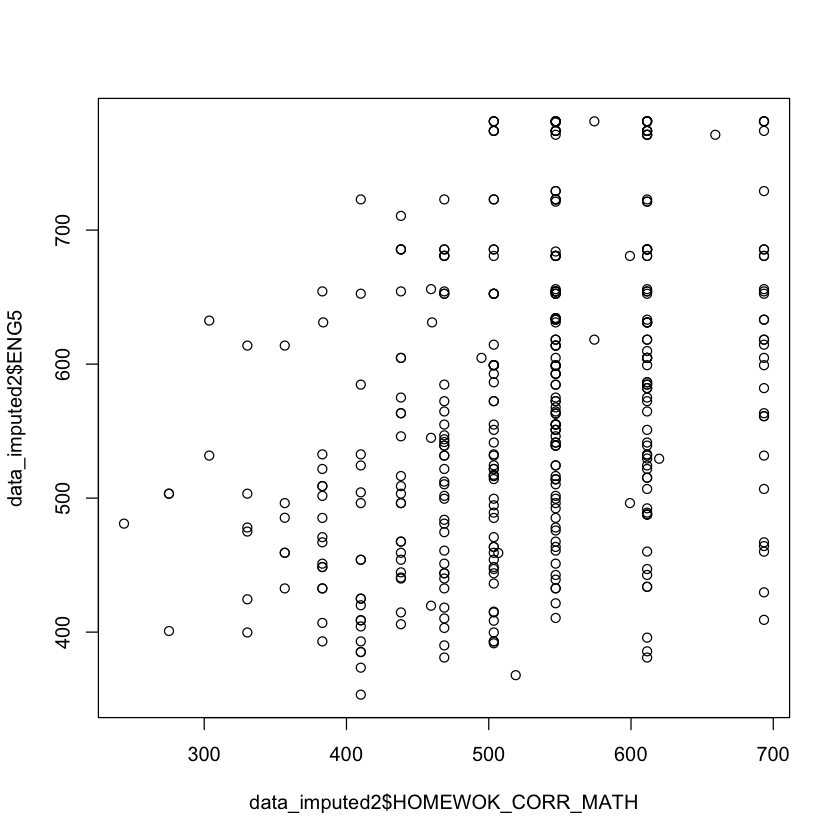

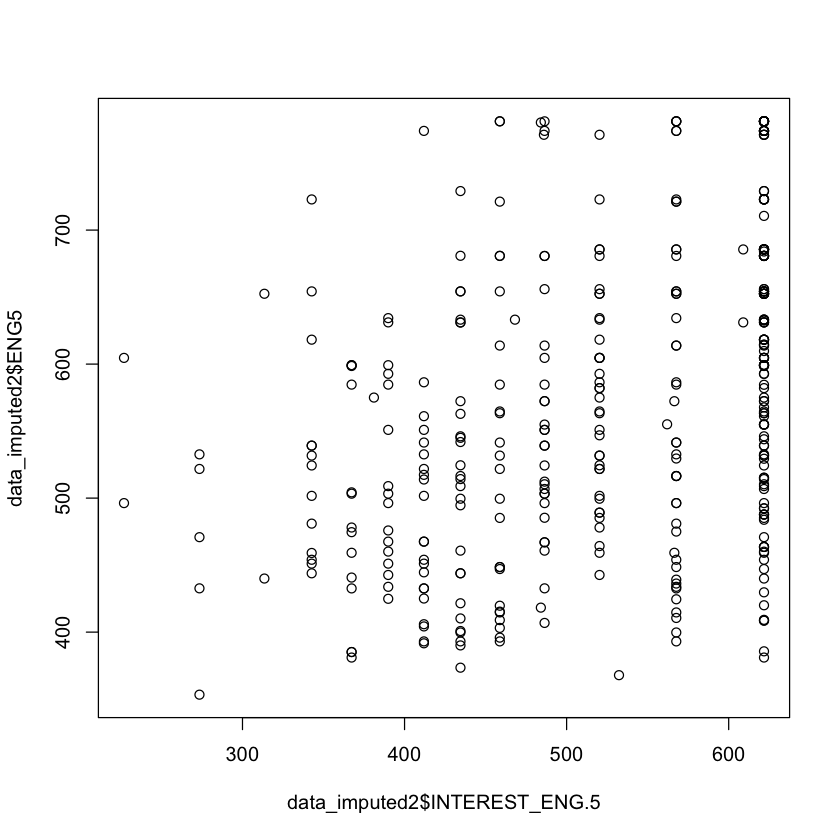

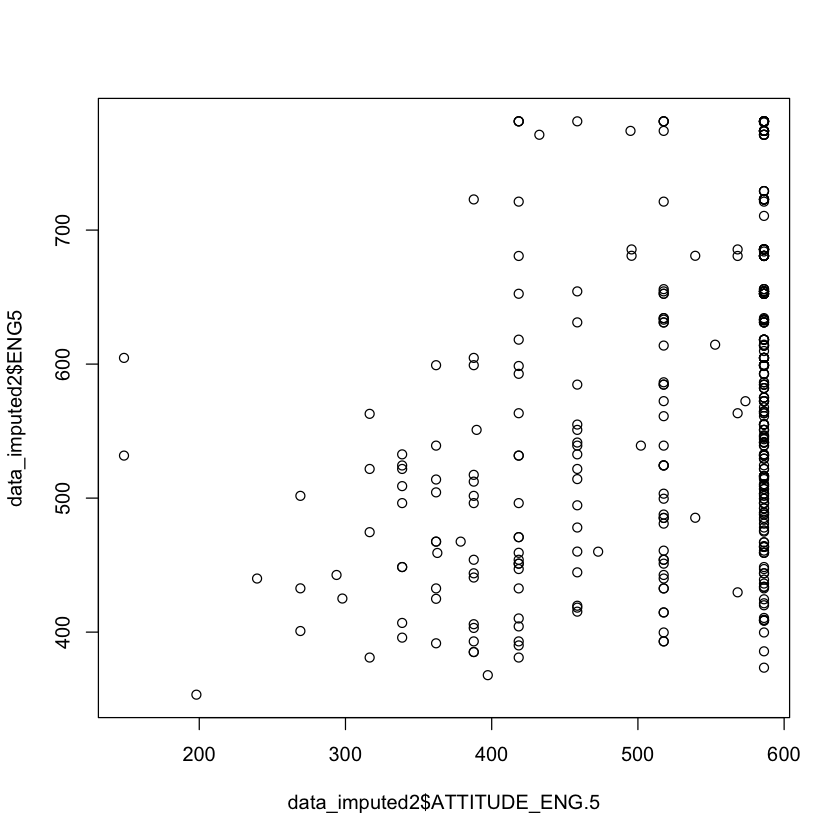

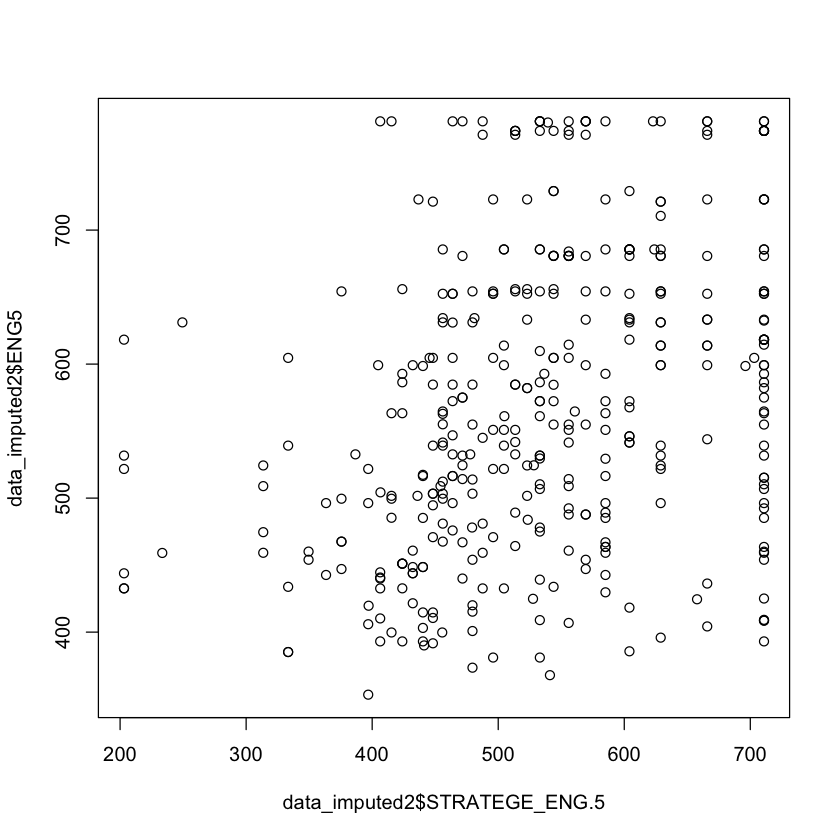

In [19]:
# Math 5
plot(data_imputed2$MATH5 ~ data_imputed2$HOMEWOK_CORR_MATH) 
# interpretation
# so here there is moderate positive trend.  but high variability. Also i notice the vertical columns
# meaning many students have same homework correlation converting to category should be fine right. need to check with professor. 
# Also there are outliers ie when with high home work correlation the math score is not good. could indicated students who might need more attention

plot(data_imputed2$MATH5 ~ data_imputed2$MORAL_DUTY.5)
#weak correlation. positive, converting to discrete makes sense here.vwertical column

plot(data_imputed2$MATH5 ~ data_imputed2$HOMEWOK_CORR_ENG.5)
#weak correlation. positive, converting to discrete makes sense here.vwertical column

plot(data_imputed2$MATH5 ~ data_imputed2$SOLIDARITY_FRIENDSHIP.5)
#weak correlation. positive, converting to discrete makes sense here.vwertical column

plot(data_imputed2$MATH5 ~ data_imputed2$ATTITUDE_ENG.5)
#weak correlation. positive, converting to discrete makes sense here.vwertical column

plot(data_imputed2$MATH5 ~ data_imputed2$SOCIAL_MORALS.5)
#weak correlation. positive, converting to discrete makes sense here.vwertical column

plot(data_imputed2$MATH5 ~ data_imputed2$SENSE_HONOR.5)
#weak correlation. positive, converting to discrete makes sense here.vwertical column


#Eng 5

plot(data_imputed2$ENG5 ~ data_imputed2$HOMEWOK_CORR_MATH)
#weak correlation. high variability

plot(data_imputed2$ENG5 ~ data_imputed2$INTEREST_ENG.5)

plot(data_imputed2$ENG5 ~ data_imputed2$ATTITUDE_ENG.5)
#Moderate positive correlation suprising.

plot(data_imputed2$ENG5 ~ data_imputed2$STRATEGE_ENG.5)
#weak random


In [20]:
# Load necessary package
library(MASS)

# Define a reusable function for stepwise linear regression
run_stepwise_lm <- function(data, outcome_var, predictor_vars) {

  complete_data <- data[, c(outcome_var, predictor_vars)]
  complete_data <- na.omit(complete_data)

  formula_full <- as.formula(paste(outcome_var, "~", paste(predictor_vars, collapse = "+")))

  full_model <- lm(formula_full, data = complete_data)
  null_model <- lm(as.formula(paste(outcome_var, "~ 1")), data = complete_data)

  step_model <- stepAIC(null_model, 
                        scope = list(lower = null_model, upper = full_model),
                        direction = "both", 
                        trace = FALSE)

  # Print summary
  cat("\n=====================================\n")
  cat("Stepwise Regression for:", outcome_var, "\n")
  cat("=====================================\n")
  print(summary(step_model))

  # Calculate performance metrics
  predictions <- predict(step_model, newdata = complete_data)
  actuals <- complete_data[[outcome_var]]
  rmse <- sqrt(mean((actuals - predictions)^2))
  r_squared <- summary(step_model)$r.squared

  cat("\nModel Evaluation:\n")
  cat("RMSE:", round(rmse, 3), "\n")
  cat("R-squared:", round(r_squared, 3), "\n")

  return(step_model)
}

# ================================
# Run for All Four Outcomes
# ================================

target_vars <- c("MATH5", "ENG5", "MATH9", "ENG9")
predictor_vars <- setdiff(names(data_imputed2), target_vars)

model_math5 <- run_stepwise_lm(data_imputed2, "MATH5", predictor_vars)
model_eng5  <- run_stepwise_lm(data_imputed2, "ENG5", predictor_vars)
model_math9 <- run_stepwise_lm(data_imputed2, "MATH9", predictor_vars)
model_eng9  <- run_stepwise_lm(data_imputed2, "ENG9", predictor_vars)



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Stepwise Regression for: MATH5 

Call:
lm(formula = MATH5 ~ HOMEWOK_CORR_MATH + MORAL_DUTY.5 + MATH_ENG_STRESS_5 + 
    AWARE.5 + SENSE_HONOR.5 + CAMPUS_CONDITION.5 + ATTITUDE_ENG.5 + 
    THR_ENG_NEW.5 + HOMEWOK_CORR_ENG.5 + STRATEGE_ENG.9 + THRIFTY.9 + 
    MORAL_DUTY.9 + SOLIDARITY_FRIENDSHIP.9 + MP_ADD_9 + STRATEGY_MATH.5 + 
    SATISIFACTION_LEARNING_ENG.9, data = complete_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-275.617  -59.624   -2.447   56.565  267.785 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  110.26464   81.94707   1.346 0.179262    
HOMEWOK_CORR_MATH              0.24248    0.06027   4.023 6.95e-05 ***
MORAL_DUTY.5                   0.24301    0.06964   3.489 0.000542 ***
MATH_ENG_STRESS_5              0.10365    0.04771   2.172 0.030461 *  
AWARE.5                       -0.19905    0.07154  -2.783 0.005667 ** 
SENSE_HONOR.5                  0.17406    0.07723   2.254 0.024785 

In [21]:
# Load necessary packages
library(caret)
library(leaps)
library(tidyverse)

run_stepwise_lm_cv <- function(data, outcome_var, predictor_vars) {
  complete_data <- data[, c(outcome_var, predictor_vars)]
  complete_data <- na.omit(complete_data)
  
  formula_full <- as.formula(paste(outcome_var, "~", paste(predictor_vars, collapse = "+")))

  ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)

  set.seed(123)
  step_model <- train(formula_full,
                      data = complete_data,
                      method = "leapSeq",
                      tuneGrid = data.frame(nvmax = 1:length(predictor_vars)),
                      trControl = ctrl)


  cat("\n=====================================\n")
  cat("Stepwise Regression with CV for:", outcome_var, "\n")
  cat("=====================================\n")
  print(step_model)

  best_nvmax <- step_model$bestTune$nvmax
  final_model <- step_model$finalModel
  cat("\nModel Evaluation:\n")
  cat("Best RMSE:", round(min(step_model$results$RMSE), 3), "\n")
  cat("Best R-squared:", round(max(step_model$results$Rsquared), 3), "\n")

  selected_coef <- coef(final_model, best_nvmax)
  selected_vars <- names(selected_coef)[-1]  # droped intercept
  cat("\nSelected predictors (nvmax =", best_nvmax, "):\n")
  print(selected_vars)

  return(list(model = step_model,
              final_model = final_model,
              selected_vars = selected_vars,
              best_nvmax = best_nvmax))
}

target_vars <- c("MATH5", "ENG5", "MATH9", "ENG9")
predictor_vars <- setdiff(names(data_imputed2), target_vars)


model_math5 <- run_stepwise_lm_cv(data_imputed2, "MATH5", predictor_vars)
model_eng5  <- run_stepwise_lm_cv(data_imputed2, "ENG5", predictor_vars)
model_math9 <- run_stepwise_lm_cv(data_imputed2, "MATH9", predictor_vars)
model_eng9  <- run_stepwise_lm_cv(data_imputed2, "ENG9", predictor_vars)


Loading required package: lattice

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ kernlab::alpha() masks ggplot2::alpha()
✖ purrr::cross()   masks kernlab::cross()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ purrr::lift()    masks caret::lift()
✖ MASS::select()   masks dplyr::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Stepwise Regression with CV for: MATH5 
Linear Regression with Stepwise Selection 

390 samples
 57 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 312, 312, 312, 312, 312, 312, ... 
Resampling results across tuning parameters:

  nvmax  RMSE       Rsquared    MAE     
   1     100.03128  0.07878591  79.26138
   2      98.97149  0.09934856  78.46978
   3      99.75757  0.08998804  79.07261
   4     101.05873  0.07908493  79.26544
   5     100.82782  0.08319764  79.43710
   6     100.93018  0.08180533  79.40028
   7     101.14375  0.07965174  79.88241
   8     100.90157  0.07814670  79.17154
   9     100.24227  0.09887698  78.73169
  10     100.69453  0.09795584  79.54499
  11     100.95511  0.09640538  79.79790
  12     100.96756  0.09961359  79.78566
  13     101.88957  0.09346600  81.12927
  14      99.91346  0.10823375  78.52223
  15     101.07758  0.10095841  79.89870
  16     100.55985  0.11124830  79.56722
  17     10

In [22]:

library(caret)
library(glmnet)
library(tidyverse)

run_lasso_cv <- function(data, outcome_var, predictor_vars) {
    
  data <- data[, c(outcome_var, predictor_vars)]
  data <- na.omit(data)


  x <- model.matrix(as.formula(paste(outcome_var, "~ .")), data)[, -1]  # remove intercept
  y <- data[[outcome_var]]


  ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)


  set.seed(123)
  lasso_model <- train(
    x = x,
    y = y,
    method = "glmnet",
    tuneGrid = expand.grid(alpha = 1, lambda = 10^seq(-4, 1, length = 100)),
    trControl = ctrl
  )

  # Print results
  cat("\n=====================================\n")
  cat("Lasso Regression with CV for:", outcome_var, "\n")
  cat("=====================================\n")
  print(lasso_model)

  # Best lambda and performance
  best_lambda <- lasso_model$bestTune$lambda
  final_model <- lasso_model$finalModel
  cat("\nModel Evaluation:\n")
  cat("Best Lambda:", round(best_lambda, 5), "\n")
  cat("Best RMSE:", round(min(lasso_model$results$RMSE), 3), "\n")
  cat("Best R-squared:", round(max(lasso_model$results$Rsquared), 3), "\n")


  coef_lasso <- coef(final_model, s = best_lambda)
  selected_vars <- rownames(coef_lasso)[which(coef_lasso != 0)][-1]  # drop intercept
  cat("\nSelected Predictors:\n")
  print(selected_vars)


  if (length(selected_vars) > 0) {

    selected_clean_vars <- unique(gsub("`", "", gsub(":[^:]*$", "", selected_vars)))
    selected_clean_vars <- selected_clean_vars[selected_clean_vars %in% colnames(data)]

    final_formula <- as.formula(paste(outcome_var, "~", paste(selected_clean_vars, collapse = "+")))
    final_lm <- lm(final_formula, data = data)
    cat("\nSummary of Final Linear Model:\n")
    print(summary(final_lm))
  } else {
    final_formula <- as.formula(paste(outcome_var, "~ 1"))
    final_lm <- lm(final_formula, data = data)
    cat("\nNo predictors selected. Intercept-only model:\n")
    print(summary(final_lm))
  }


  return(list(
    model = lasso_model,
    final_model = final_model,
    best_lambda = best_lambda,
    selected_vars = selected_vars,
    final_lm_model = final_lm
  ))
}

# Define target variables and predictor set
target_vars <- c("MATH5", "ENG5", "MATH9", "ENG9")
predictor_vars <- setdiff(names(data_imputed2), target_vars)

# Run for each target
lasso_math5 <- run_lasso_cv(data_imputed2, "MATH5", predictor_vars)
lasso_eng5  <- run_lasso_cv(data_imputed2, "ENG5", predictor_vars)
lasso_math9 <- run_lasso_cv(data_imputed2, "MATH9", predictor_vars)
lasso_eng9  <- run_lasso_cv(data_imputed2, "ENG9", predictor_vars)


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-9




Lasso Regression with CV for: MATH5 
glmnet 

390 samples
 61 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 312, 312, 312, 312, 312, 312, ... 
Resampling results across tuning parameters:

  lambda        RMSE       Rsquared   MAE     
  1.000000e-04  103.04753  0.1164124  80.82745
  1.123324e-04  103.04753  0.1164124  80.82745
  1.261857e-04  103.04753  0.1164124  80.82745
  1.417474e-04  103.04753  0.1164124  80.82745
  1.592283e-04  103.04753  0.1164124  80.82745
  1.788650e-04  103.04753  0.1164124  80.82745
  2.009233e-04  103.04753  0.1164124  80.82745
  2.257020e-04  103.04753  0.1164124  80.82745
  2.535364e-04  103.04753  0.1164124  80.82745
  2.848036e-04  103.04753  0.1164124  80.82745
  3.199267e-04  103.04753  0.1164124  80.82745
  3.593814e-04  103.04753  0.1164124  80.82745
  4.037017e-04  103.04753  0.1164124  80.82745
  4.534879e-04  103.04753  0.1164124  80.82745
  5.094138e-04  103.04753  0.1164124  80.

In [23]:
# Load necessary packages
library(caret)
library(glmnet)
library(tidyverse)


run_ridge_cv <- function(data, outcome_var, predictor_vars) {
    
  data <- data[, c(outcome_var, predictor_vars)]
  data <- na.omit(data)


  x <- model.matrix(as.formula(paste(outcome_var, "~ .")), data)[, -1]  # remove intercept
  y <- data[[outcome_var]]


  ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)


  set.seed(123)
  ridge_model <- train(
    x = x,
    y = y,
    method = "glmnet",
    tuneGrid = expand.grid(alpha = 0, lambda = 10^seq(-4, 1, length = 100)),
    trControl = ctrl
  )


  cat("\n=====================================\n")
  cat("Ridge Regression with CV for:", outcome_var, "\n")
  cat("=====================================\n")
  print(ridge_model)


  best_lambda <- ridge_model$bestTune$lambda
  final_model <- ridge_model$finalModel
  cat("\nModel Evaluation:\n")
  cat("Best Lambda:", round(best_lambda, 5), "\n")
  cat("Best RMSE:", round(min(ridge_model$results$RMSE), 3), "\n")
  cat("Best R-squared:", round(max(ridge_model$results$Rsquared), 3), "\n")


  coef_ridge <- coef(final_model, s = best_lambda)
  selected_vars <- rownames(coef_ridge)[which(abs(coef_ridge) > 1e-5)][-1]  # keep significant non-zero effects
  cat("\nVariables with non-trivial coefficients:\n")
  print(selected_vars)

  if (length(selected_vars) > 0) {
    selected_clean_vars <- unique(gsub("`", "", gsub(":[^:]*$", "", selected_vars)))
    selected_clean_vars <- selected_clean_vars[selected_clean_vars %in% colnames(data)]
    final_formula <- as.formula(paste(outcome_var, "~", paste(selected_clean_vars, collapse = "+")))
    final_lm <- lm(final_formula, data = data)
    cat("\nSummary of Final Linear Model:\n")
    print(summary(final_lm))
  } else {
    final_formula <- as.formula(paste(outcome_var, "~ 1"))
    final_lm <- lm(final_formula, data = data)
    cat("\nNo predictors selected. Intercept-only model:\n")
    print(summary(final_lm))
  }


  return(list(
    model = ridge_model,
    final_model = final_model,
    best_lambda = best_lambda,
    selected_vars = selected_vars,
    final_lm_model = final_lm
  ))
}


target_vars <- c("MATH5", "ENG5", "MATH9", "ENG9")
predictor_vars <- setdiff(names(data_imputed2), target_vars)


ridge_math5 <- run_ridge_cv(data_imputed2, "MATH5", predictor_vars)
ridge_eng5  <- run_ridge_cv(data_imputed2, "ENG5", predictor_vars)
ridge_math9 <- run_ridge_cv(data_imputed2, "MATH9", predictor_vars)
ridge_eng9  <- run_ridge_cv(data_imputed2, "ENG9", predictor_vars)



Ridge Regression with CV for: MATH5 
glmnet 

390 samples
 61 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 312, 312, 312, 312, 312, 312, ... 
Resampling results across tuning parameters:

  lambda        RMSE       Rsquared   MAE     
  1.000000e-04  100.84269  0.1235503  79.06447
  1.123324e-04  100.84269  0.1235503  79.06447
  1.261857e-04  100.84269  0.1235503  79.06447
  1.417474e-04  100.84269  0.1235503  79.06447
  1.592283e-04  100.84269  0.1235503  79.06447
  1.788650e-04  100.84269  0.1235503  79.06447
  2.009233e-04  100.84269  0.1235503  79.06447
  2.257020e-04  100.84269  0.1235503  79.06447
  2.535364e-04  100.84269  0.1235503  79.06447
  2.848036e-04  100.84269  0.1235503  79.06447
  3.199267e-04  100.84269  0.1235503  79.06447
  3.593814e-04  100.84269  0.1235503  79.06447
  4.037017e-04  100.84269  0.1235503  79.06447
  4.534879e-04  100.84269  0.1235503  79.06447
  5.094138e-04  100.84269  0.1235503  79.

In [24]:
# Load required packages
library(caret)
library(randomForest)
library(tidyverse)

# Function to do Random Forest regression with CV
run_randomforest_cv <- function(data, outcome_var, predictor_vars) {
  
  # Keep only relevant columns and remove missing values
  data <- data[, c(outcome_var, predictor_vars)]
 

  # Prepare formula
  formula_rf <- as.formula(paste(outcome_var, "~ ."))

  # Define CV control
  ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)

  # Grid of tuning parameters (mtry = number of predictors randomly selected at each split)
  p <- length(predictor_vars)
  tune_grid <- expand.grid(mtry = floor(seq(p / 5, p / 2, length.out = 5)))


  # Train the Random Forest model
  set.seed(123)
  rf_model <- train(
    formula_rf,
    data = data,
    method = "rf",
    trControl = ctrl,
    tuneGrid = tune_grid,
    importance = TRUE,
    ntree = 500
  )

  # Print results
  cat("\n=====================================\n")
  cat("Random Forest Regression with CV for:", outcome_var, "\n")
  cat("=====================================\n")
  print(rf_model)

  # Best tuning parameters
  best_mtry <- rf_model$bestTune$mtry
  cat("\nModel Evaluation:\n")
  cat("Best mtry:", best_mtry, "\n")
  cat("Best RMSE:", round(min(rf_model$results$RMSE), 3), "\n")
  cat("Best R-squared:", round(max(rf_model$results$Rsquared), 3), "\n")

  # Get variable importance
  var_imp <- varImp(rf_model)
  cat("\nTop 10 Important Predictors:\n")
  print(head(var_imp$importance[order(-var_imp$importance$Overall), , drop = FALSE], 10))

  # Return all relevant output
  return(list(
    model = rf_model,
    best_mtry = best_mtry,
    variable_importance = var_imp
  ))
}

# Define target variables and predictor set
target_vars <- c("MATH5", "ENG5", "MATH9", "ENG9")
predictor_vars <- setdiff(names(data_imputed2), target_vars)

# Run for each target variable
rf_math5 <- run_randomforest_cv(data_imputed2, "MATH5", predictor_vars)
rf_eng5  <- run_randomforest_cv(data_imputed2, "ENG5", predictor_vars)
rf_math9 <- run_randomforest_cv(data_imputed2, "MATH9", predictor_vars)
rf_eng9  <- run_randomforest_cv(data_imputed2, "ENG9", predictor_vars)


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ranger’:

    importance


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





Random Forest Regression with CV for: MATH5 
Random Forest 

390 samples
 57 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 312, 312, 312, 312, 312, 312, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  11    93.38452  0.2075726  72.14441
  15    92.94329  0.2130958  71.70385
  19    92.91853  0.2116843  71.76069
  24    92.82255  0.2131342  71.66993
  28    92.99093  0.2093753  71.81978

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 24.

Model Evaluation:
Best mtry: 24 
Best RMSE: 92.823 
Best R-squared: 0.213 

Top 10 Important Predictors:
                       Overall
HOMEWOK_CORR_MATH    100.00000
HOMEWOK_CORR_ENG.5    87.14261
SOCIAL_MORALS.5       75.33686
ATTITUDE_ENG.5        71.98222
MANNERS.9             64.15981
GRA_GEOMETRY.5        62.17344
STRATEGE_ENG.5        60.00242
STUDYINTEREST_MATH.5  58.77769

In [25]:
# Load necessary packages
library(caret)
library(xgboost)
library(tidyverse)

# Function to run XGBoost with CV
run_xgboost_cv <- function(data, outcome_var, predictor_vars) {
  
  # Prepare data
  data <- data[, c(outcome_var, predictor_vars)]
  data <- na.omit(data)
  
  # Create x and y
  x <- model.matrix(as.formula(paste(outcome_var, "~ .")), data)[, -1]  # drop intercept
  y <- data[[outcome_var]]
  
  # Define cross-validation control
  ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)
  
  # Define tuning grid (customize if needed)
  tune_grid <- expand.grid(
    nrounds = 100,
    max_depth = c(3, 6, 9),
    eta = c(0.05, 0.1, 0.3),
    gamma = 0,
    colsample_bytree = 0.8,
    min_child_weight = 1,
    subsample = 0.8
  )
  
  # Train model
  set.seed(123)
  xgb_model <- train(
    x = x,
    y = y,
    method = "xgbTree",
    trControl = ctrl,
    tuneGrid = tune_grid,
    verbose = 0
  )
  
  # Print model performance
  cat("\n=====================================\n")
  cat("XGBoost Regression with CV for:", outcome_var, "\n")
  cat("=====================================\n")
  print(xgb_model)
  
  cat("\nBest Parameters:\n")
  print(xgb_model$bestTune)
  
  cat("\nModel Evaluation:\n")
  cat("Best RMSE:", round(min(xgb_model$results$RMSE), 3), "\n")
  cat("Best R-squared:", round(max(xgb_model$results$Rsquared), 3), "\n")
  
  return(list(
    model = xgb_model,
    best_params = xgb_model$bestTune
  ))
}
# Define target variables and predictor set
target_vars <- c("MATH5", "ENG5", "MATH9", "ENG9")
predictor_vars <- setdiff(names(data_imputed2), target_vars)

# Run for each target
xgb_math5 <- run_xgboost_cv(data_imputed2, "MATH5", predictor_vars)
xgb_eng5  <- run_xgboost_cv(data_imputed2, "ENG5", predictor_vars)
xgb_math9 <- run_xgboost_cv(data_imputed2, "MATH9", predictor_vars)
xgb_eng9  <- run_xgboost_cv(data_imputed2, "ENG9", predictor_vars)



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice





XGBoost Regression with CV for: MATH5 
eXtreme Gradient Boosting 

390 samples
 61 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 312, 312, 312, 312, 312, 312, ... 
Resampling results across tuning parameters:

  eta   max_depth  RMSE       Rsquared   MAE     
  0.05  3           94.68863  0.1783682  74.66675
  0.05  6           93.88788  0.2006806  73.10425
  0.05  9           95.99754  0.1775219  74.07115
  0.10  3           95.54440  0.1733822  74.77966
  0.10  6           94.86614  0.1897147  72.90752
  0.10  9           97.02362  0.1578156  74.61101
  0.30  3          102.30437  0.1361753  80.17644
  0.30  6          101.08404  0.1406784  78.21636
  0.30  9          101.57626  0.1327800  78.94182

Tuning parameter 'nrounds' was held constant at a value of 100
Tuning

Tuning parameter 'min_child_weight' was held constant at a value of 1

Tuning parameter 'subsample' was held constant at a value of 0.8
RMSE was used to 

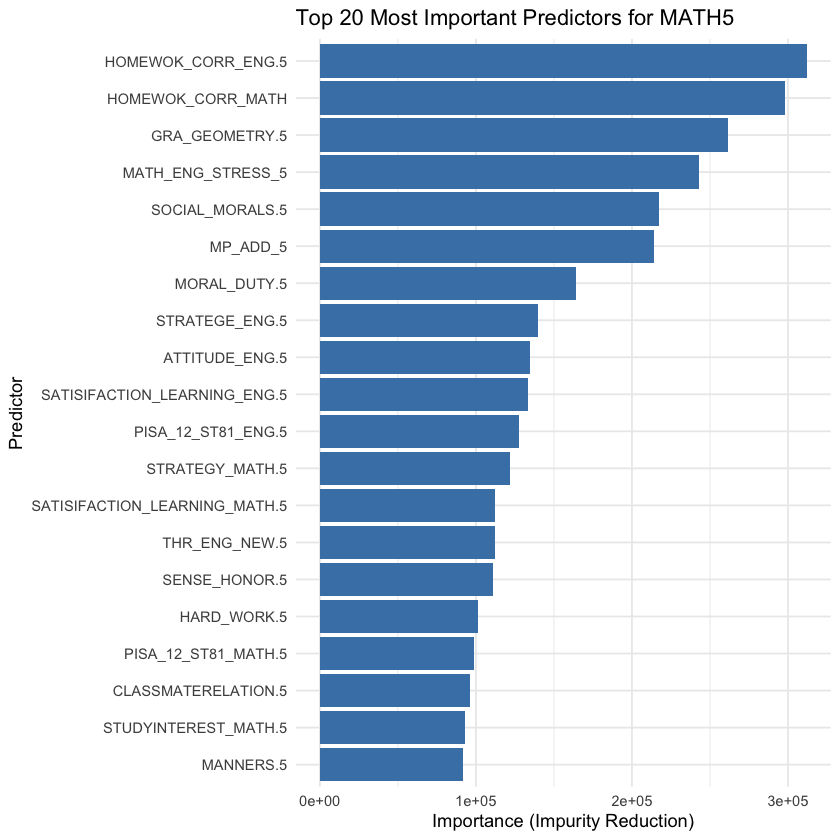

In [26]:
library(ggplot2)
library(dplyr)
library(ranger)

outcome_var <- "MATH5"
target_vars <- c("MATH5", "ENG5")
predictor_vars <- setdiff(names(reduced_data5), target_vars)
my_data <- reduced_data5[, c(outcome_var, predictor_vars)]


# Train final model
final_model <- ranger(
  formula = as.formula(paste(outcome_var, "~ .")),
  data = my_data,
  num.trees = 600,
  max.depth = 30,
  min.node.size = 5,
  mtry = 10,
  sample.fraction = 1,
  replace = FALSE,
  importance = "impurity"
)


var_imp <- final_model$variable.importance


var_imp_df <- data.frame(
  feature = names(var_imp),
  importance = var_imp
) %>%
  arrange(desc(importance))


ggplot(var_imp_df[1:20, ], aes(x = reorder(feature, importance), y = importance)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 20 Most Important Predictors for MATH5",
    x = "Predictor",
    y = "Importance (Impurity Reduction)"
  ) +
  theme_minimal()


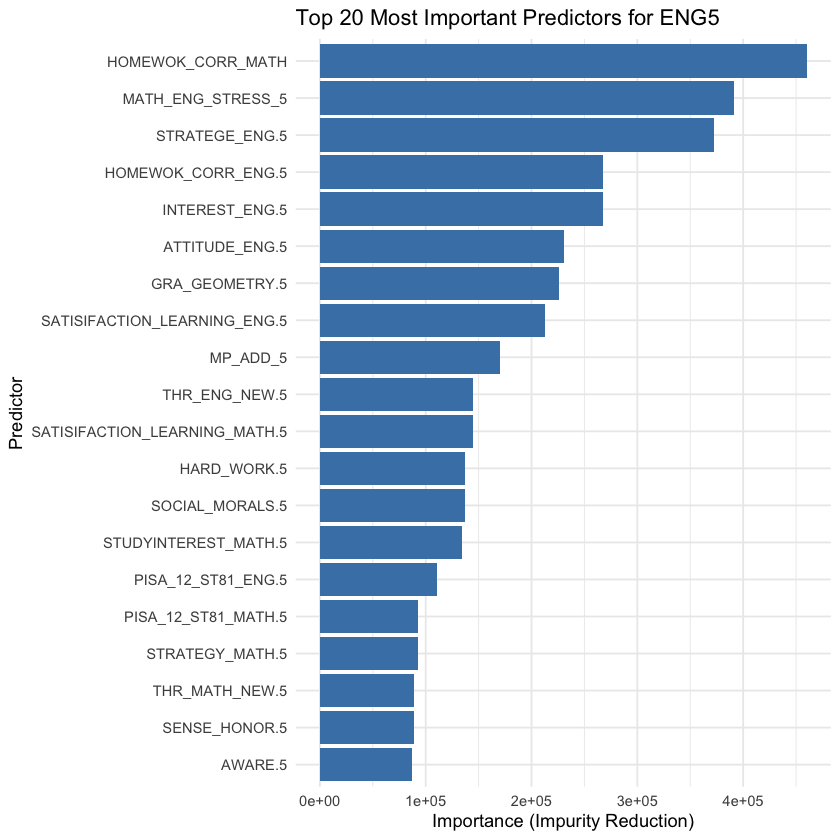

In [27]:
library(ggplot2)
library(dplyr)
library(ranger)

outcome_var <- "ENG5"
target_vars <- c("MATH5", "ENG5")
predictor_vars <- setdiff(names(reduced_data5), target_vars)
my_data <- reduced_data5[, c(outcome_var, predictor_vars)]



final_model <- ranger(
  formula = as.formula(paste(outcome_var, "~ .")),
  data = my_data,
  num.trees = 600,
  max.depth = 30,
  min.node.size = 5,
  mtry = 10,
  sample.fraction = 1,
  replace = FALSE,
  importance = "impurity"
)


var_imp <- final_model$variable.importance


var_imp_df <- data.frame(
  feature = names(var_imp),
  importance = var_imp
) %>%
  arrange(desc(importance))


ggplot(var_imp_df[1:20, ], aes(x = reorder(feature, importance), y = importance)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 20 Most Important Predictors for ENG5",
    x = "Predictor",
    y = "Importance (Impurity Reduction)"
  ) +
  theme_minimal()


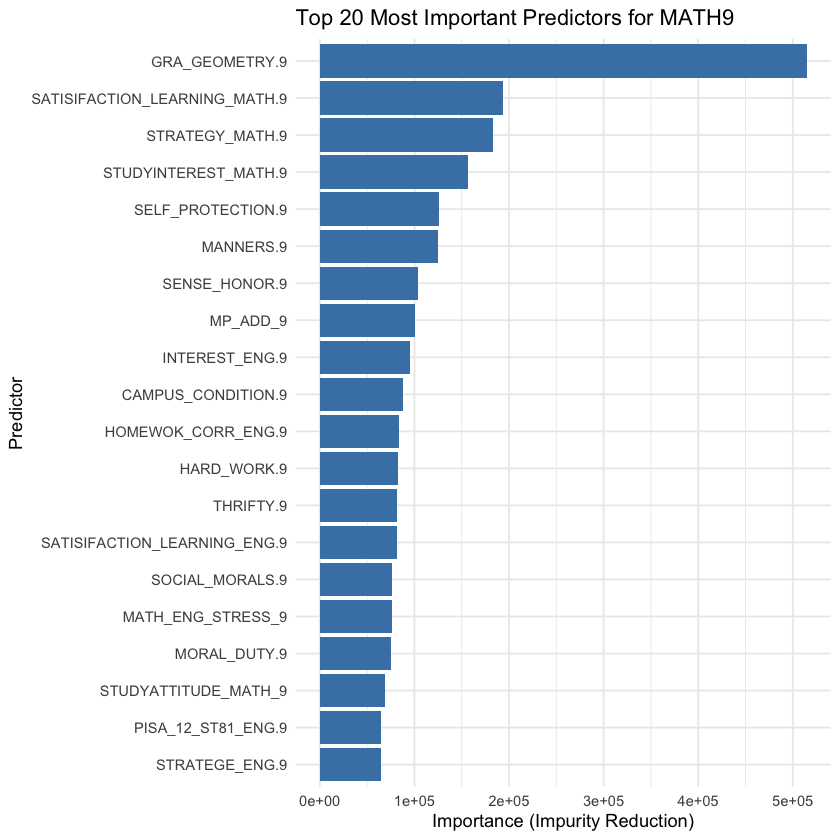

In [28]:
library(ggplot2)
library(dplyr)
library(ranger)

outcome_var <- "MATH9"
target_vars <- c("MATH9", "ENG9")
predictor_vars <- setdiff(names(reduced_data9), target_vars)
my_data <- reduced_data9[, c(outcome_var, predictor_vars)]
 


final_model <- ranger(
  formula = as.formula(paste(outcome_var, "~ .")),
  data = my_data,
  num.trees = 600,
  max.depth = 30,
  min.node.size = 5,
  mtry = 10,
  sample.fraction = 1,
  replace = FALSE,
  importance = "impurity"
)


var_imp <- final_model$variable.importance


var_imp_df <- data.frame(
  feature = names(var_imp),
  importance = var_imp
) %>%
  arrange(desc(importance))


ggplot(var_imp_df[1:20, ], aes(x = reorder(feature, importance), y = importance)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 20 Most Important Predictors for MATH9",
    x = "Predictor",
    y = "Importance (Impurity Reduction)"
  ) +
  theme_minimal()


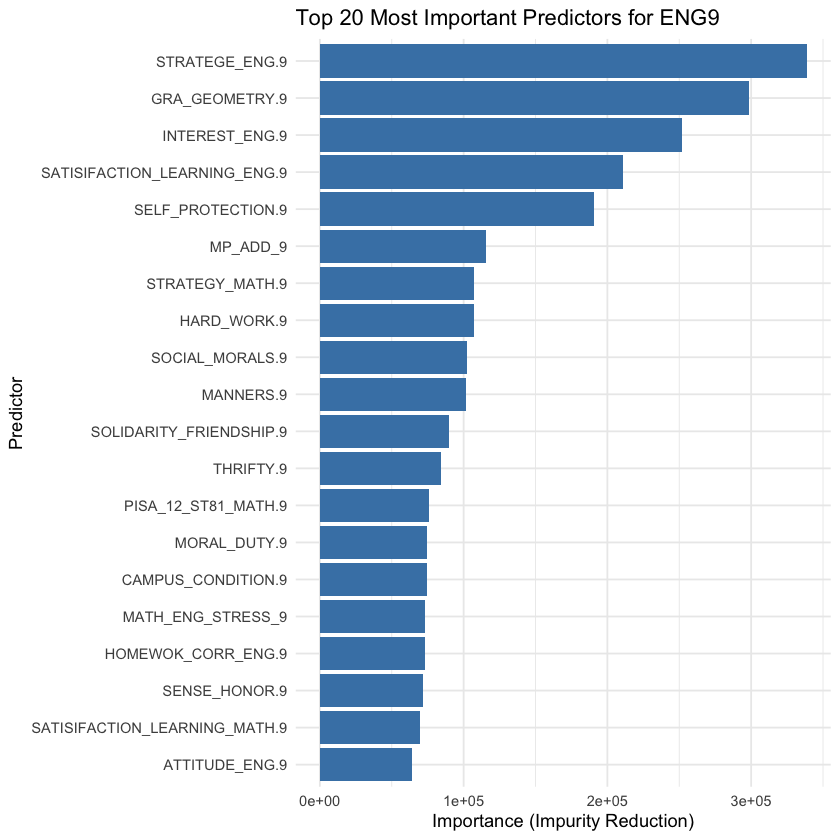

In [29]:
library(ggplot2)
library(dplyr)
library(ranger)

outcome_var <- "ENG9"
target_vars <- c("MATH9", "ENG9")
predictor_vars <- setdiff(names(reduced_data9), target_vars)
my_data <- reduced_data9[, c(outcome_var, predictor_vars)]


final_model <- ranger(
  formula = as.formula(paste(outcome_var, "~ .")),
  data = my_data,
  num.trees = 600,
  max.depth = 30,
  min.node.size = 5,
  mtry = 10,
  sample.fraction = 1,
  replace = FALSE,
  importance = "impurity"
)


var_imp <- final_model$variable.importance


var_imp_df <- data.frame(
  feature = names(var_imp),
  importance = var_imp
) %>%
  arrange(desc(importance))


ggplot(var_imp_df[1:20, ], aes(x = reorder(feature, importance), y = importance)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 20 Most Important Predictors for ENG9",
    x = "Predictor",
    y = "Importance (Impurity Reduction)"
  ) +
  theme_minimal()


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.




Family: gaussian 
Link function: identity 

Formula:
MATH9 ~ MP_ADD_9

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 631.48278   29.23227  21.602   <2e-16 ***
MP_ADD_9     -0.12744    0.06077  -2.097   0.0366 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.00866   Deviance explained = 1.12%
GCV = 8065.5  Scale est. = 8024.1    n = 390

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”



Family: gaussian 
Link function: identity 

Formula:
ENG9 ~ s(MP_ADD_9)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  569.698      4.538   125.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value   
s(MP_ADD_9) 3.805  4.759 4.238 0.00145 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0449   Deviance explained = 5.42%
GCV =   8130  Scale est. = 8029.8    n = 390

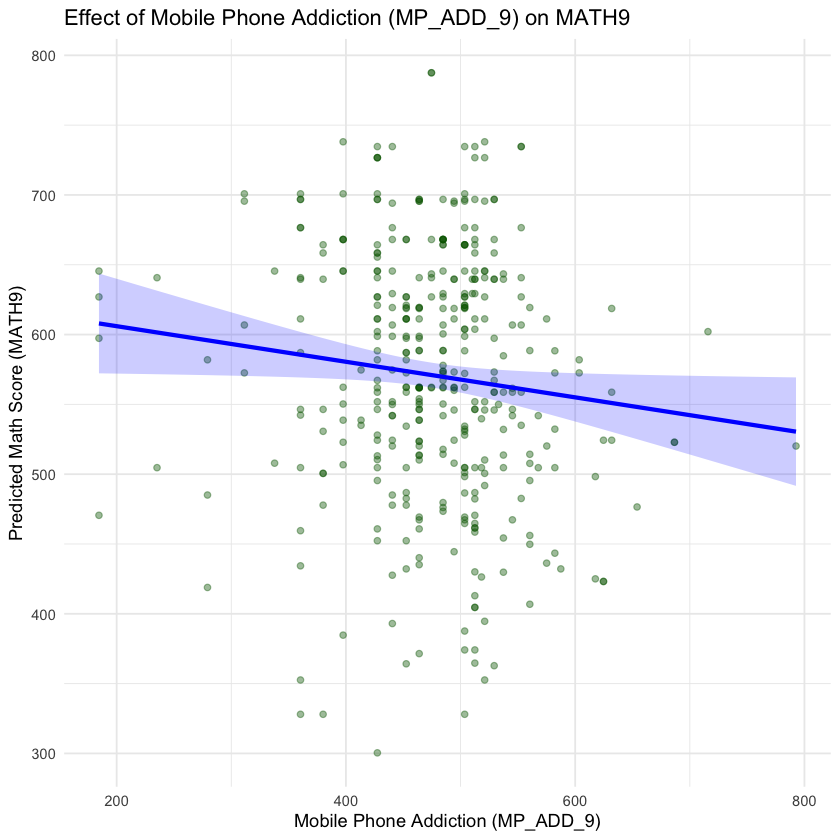


Family: gaussian 
Link function: identity 

Formula:
ENG5 ~ s(MP_ADD_5, k = 15)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  569.974      5.482     104   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value  
s(MP_ADD_5) 11.15  12.71 2.326  0.0102 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0538   Deviance explained = 8.09%
GCV =  12098  Scale est. = 11721     n = 390

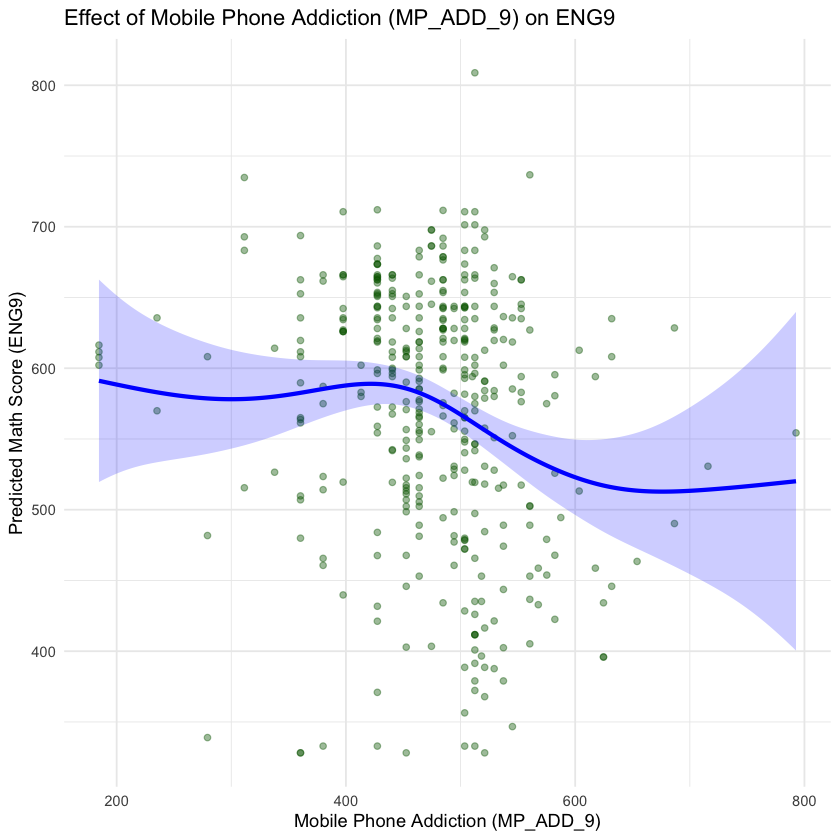


Family: gaussian 
Link function: identity 

Formula:
MATH5 ~ s(MP_ADD_5)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  559.716      5.185   107.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df     F p-value  
s(MP_ADD_5) 3.95  4.938 2.172  0.0504 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0234   Deviance explained = 3.34%
GCV =  10621  Scale est. = 10486     n = 390

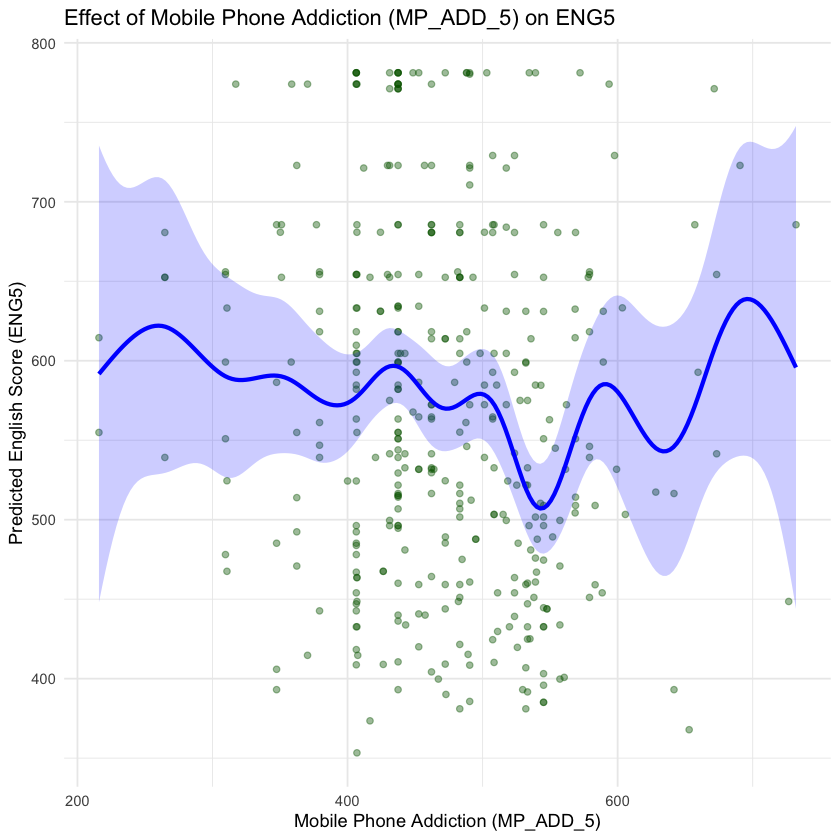

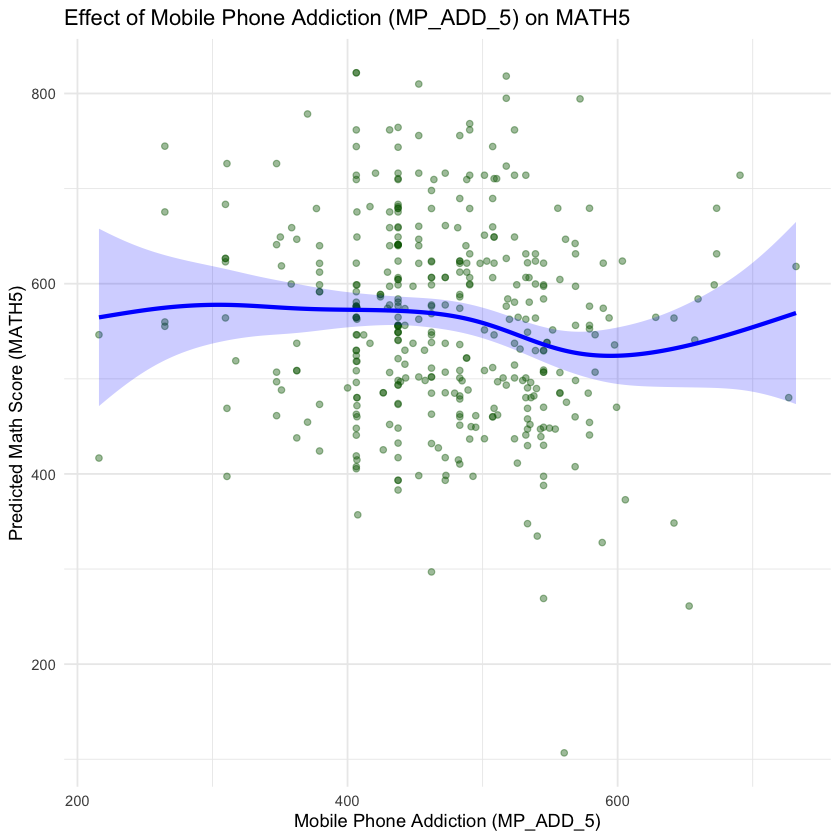

In [31]:
library(mgcv)

library(mgcv)
library(ggplot2)


gam_model <- gam(MATH9 ~ MP_ADD_9, data = reduced_data9)
summary(gam_model)


new_data <- data.frame(MP_ADD_9 = seq(min(reduced_data9$MP_ADD_9, na.rm = TRUE),
                                      max(reduced_data9$MP_ADD_9, na.rm = TRUE),
                                      length.out = 200))


pred <- predict(gam_model, newdata = new_data, se.fit = TRUE)


new_data$fit <- pred$fit
new_data$upper <- pred$fit + 1.96 * pred$se.fit
new_data$lower <- pred$fit - 1.96 * pred$se.fit


ggplot() +
  geom_point(data = reduced_data9, aes(x = MP_ADD_9, y = MATH9), 
             color = "darkgreen", alpha = 0.4) +
  geom_line(data = new_data, aes(x = MP_ADD_9, y = fit), 
            color = "blue", size = 1.2) +
  geom_ribbon(data = new_data, aes(x = MP_ADD_9, ymin = lower, ymax = upper), 
              fill = "blue", alpha = 0.2) +
  labs(title = "Effect of Mobile Phone Addiction (MP_ADD_9) on MATH9",
       x = "Mobile Phone Addiction (MP_ADD_9)",
       y = "Predicted Math Score (MATH9)") +
  theme_minimal()


# There is a statistically significant but weak negative linear relationship between mobile phone addiction and
# math performance among 9th-grade students. As MP_ADD_9 increases, predicted MATH9 scores slightly decrease. 
# However, the effect size is small, and mobile phone usage alone is not a strong predictor of academic achievement.

library(mgcv)

library(mgcv)
library(ggplot2)


gam_model <- gam(ENG9 ~ s(MP_ADD_9), data = reduced_data9)
summary(gam_model)


new_data <- data.frame(MP_ADD_9 = seq(min(reduced_data9$MP_ADD_9, na.rm = TRUE),
                                      max(reduced_data9$MP_ADD_9, na.rm = TRUE),
                                      length.out = 200))


pred <- predict(gam_model, newdata = new_data, se.fit = TRUE)


new_data$fit <- pred$fit
new_data$upper <- pred$fit + 1.96 * pred$se.fit
new_data$lower <- pred$fit - 1.96 * pred$se.fit


ggplot() +
  geom_point(data = reduced_data9, aes(x = MP_ADD_9, y = ENG9), 
             color = "darkgreen", alpha = 0.4) +
  geom_line(data = new_data, aes(x = MP_ADD_9, y = fit), 
            color = "blue", size = 1.2) +
  geom_ribbon(data = new_data, aes(x = MP_ADD_9, ymin = lower, ymax = upper), 
              fill = "blue", alpha = 0.2) +
  labs(title = "Effect of Mobile Phone Addiction (MP_ADD_9) on ENG9",
       x = "Mobile Phone Addiction (MP_ADD_9)",
       y = "Predicted Math Score (ENG9)") +
  theme_minimal()


# There is a statistically significant negative linear relationship between mobile phone addiction and 
# English performance in grade 9. However, the effect size is small, suggesting that while phone addiction may be a factor, 
# many other variables likely contribute more strongly to English academic achievement.

library(mgcv)
library(ggplot2)


gam_model <- gam(ENG5 ~ s(MP_ADD_5,k=15), data = reduced_data5)
summary(gam_model)


new_data <- data.frame(MP_ADD_5 = seq(min(reduced_data5$MP_ADD_5, na.rm = TRUE),
                                      max(reduced_data5$MP_ADD_5, na.rm = TRUE),
                                      length.out = 200))


pred <- predict(gam_model, newdata = new_data, se.fit = TRUE)


new_data$fit <- pred$fit
new_data$upper <- pred$fit + 1.96 * pred$se.fit
new_data$lower <- pred$fit - 1.96 * pred$se.fit


ggplot() +
  geom_point(data = reduced_data5, aes(x = MP_ADD_5, y = ENG5), 
             color = "darkgreen", alpha = 0.4) +
  geom_line(data = new_data, aes(x = MP_ADD_5, y = fit), 
            color = "blue", size = 1.2) +
  geom_ribbon(data = new_data, aes(x = MP_ADD_5, ymin = lower, ymax = upper), 
              fill = "blue", alpha = 0.2) +
  labs(title = "Effect of Mobile Phone Addiction (MP_ADD_5) on ENG5",
       x = "Mobile Phone Addiction (MP_ADD_5)",
       y = "Predicted English Score (ENG5)") +
  theme_minimal()


# A simple linear regression reveals that greater mobile phone addiction in grade 5 is significantly associated with 
# slightly lower English scores. However, the effect size is small and explains little of the total variation in performance, 
# suggesting that mobile phone use may play a role, but likely not a dominant one in academic outcomes.

library(mgcv)
library(ggplot2)


gam_model <- gam(MATH5 ~ s(MP_ADD_5), data = reduced_data5)
summary(gam_model)


new_data <- data.frame(MP_ADD_5 = seq(min(reduced_data5$MP_ADD_5, na.rm = TRUE),
                                      max(reduced_data5$MP_ADD_5, na.rm = TRUE),
                                      length.out = 200))


pred <- predict(gam_model, newdata = new_data, se.fit = TRUE)


new_data$fit <- pred$fit
new_data$upper <- pred$fit + 1.96 * pred$se.fit
new_data$lower <- pred$fit - 1.96 * pred$se.fit


ggplot() +
  geom_point(data = reduced_data5, aes(x = MP_ADD_5, y = MATH5), 
             color = "darkgreen", alpha = 0.4) +
  geom_line(data = new_data, aes(x = MP_ADD_5, y = fit), 
            color = "blue", size = 1.2) +
  geom_ribbon(data = new_data, aes(x = MP_ADD_5, ymin = lower, ymax = upper), 
              fill = "blue", alpha = 0.2) +
  labs(title = "Effect of Mobile Phone Addiction (MP_ADD_5) on MATH5",
       x = "Mobile Phone Addiction (MP_ADD_5)",
       y = "Predicted Math Score (MATH5)") +
  theme_minimal()

# The relationship between MP_ADD_5 and MATH5 is mildly non-linear, with weak significance.

# The negative dip around mid-range MP_ADD_5 scores may suggest a threshold effect, but:

# It does not remain consistently downward, and

# The confidence intervals widen at the edges , so those patterns are less certain.

# Mobile phone addiction may play a minor role, but is not a strong predictor of math outcomes on its own.

In [34]:
library(mgcv)

# Define 5-fold CV folds
set.seed(123)
folds <- sample(1:5, nrow(data_imputed2), replace = TRUE)

rmse_list <- numeric(5)
r2_list <- numeric(5)

for (k in 1:5) {
  train_data <- data_imputed2[folds != k, ]
  test_data  <- data_imputed2[folds == k, ]
  
  model <- gam(MATH5 ~ 
                 s(MATH_ENG_STRESS_5) +
                 s(HOMEWOK_CORR_MATH) +
                 HOMEWOK_CORR_ENG.5 +
                 s(SOCIAL_MORALS.5) +
                 s(CAMPUS_CONDITION.5) +
                 ATTITUDE_ENG.5 + s(THR_ENG_NEW.5),
               data = train_data, method = "REML", select = TRUE)
  
  print(summary(model))      
  preds <- predict(model, newdata = test_data)
  actual <- test_data$MATH5
  
  rmse_list[k] <- sqrt(mean((preds - actual)^2))
  r2_list[k] <- 1 - sum((preds - actual)^2) / sum((actual - mean(actual))^2)
}

# Results
mean_rmse <- mean(rmse_list)
mean_r2 <- mean(r2_list)

cat("Cross-validated RMSE:", round(mean_rmse, 2), "\n")
cat("Cross-validated R²:", round(mean_r2, 4), "\n")



Family: gaussian 
Link function: identity 

Formula:
MATH5 ~ s(MATH_ENG_STRESS_5) + s(HOMEWOK_CORR_MATH) + HOMEWOK_CORR_ENG.5 + 
    s(SOCIAL_MORALS.5) + s(CAMPUS_CONDITION.5) + ATTITUDE_ENG.5 + 
    s(THR_ENG_NEW.5)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        336.88997   49.66440   6.783 6.41e-11 ***
HOMEWOK_CORR_ENG.5   0.17954    0.06246   2.874 0.004341 ** 
ATTITUDE_ENG.5       0.23708    0.06889   3.441 0.000662 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                         edf Ref.df     F  p-value    
s(MATH_ENG_STRESS_5)  1.9378      9 0.846 0.012069 *  
s(HOMEWOK_CORR_MATH)  2.2956      9 2.589 4.74e-06 ***
s(SOCIAL_MORALS.5)    3.9290      9 2.199 0.000253 ***
s(CAMPUS_CONDITION.5) 0.5284      9 0.121 0.147538    
s(THR_ENG_NEW.5)      2.1075      9 1.326 0.001263 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq


Family: gaussian 
Link function: identity 

Formula:
MATH5 ~ s(MATH_ENG_STRESS_5, k = 28) + s(HOMEWOK_CORR_MATH) + 
    HOMEWOK_CORR_ENG.5 + s(SOCIAL_MORALS.5, k = 27, bs = "ad") + 
    s(CAMPUS_CONDITION.5, k = 29) + ATTITUDE_ENG.5 + s(THR_ENG_NEW.5)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        373.63824   45.84671   8.150 5.53e-15 ***
HOMEWOK_CORR_ENG.5   0.14301    0.05732   2.495  0.01303 *  
ATTITUDE_ENG.5       0.20645    0.06379   3.236  0.00132 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                        edf Ref.df     F  p-value    
s(MATH_ENG_STRESS_5)  2.279     27 0.448  0.00156 ** 
s(HOMEWOK_CORR_MATH)  2.315      9 2.721 3.08e-06 ***
s(SOCIAL_MORALS.5)    4.466     22 1.202 1.87e-05 ***
s(CAMPUS_CONDITION.5) 1.569     28 0.179  0.03479 *  
s(THR_ENG_NEW.5)      2.060      9 1.153  0.00278 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01


Method: REML   Optimizer: outer newton
full convergence after 18 iterations.
Gradient range [-0.002519381,0.0006500544]
(score 2323.376 & scale 8073.473).
Hessian positive definite, eigenvalue range [3.291862e-05,193.5407].
Model rank =  102 / 102 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                         k'   edf k-index p-value    
s(MATH_ENG_STRESS_5)  27.00  2.28    0.91   0.035 *  
s(HOMEWOK_CORR_MATH)   9.00  2.32    0.97   0.225    
s(SOCIAL_MORALS.5)    26.00  4.47    0.88   0.010 ** 
s(CAMPUS_CONDITION.5) 28.00  1.57    0.86  <2e-16 ***
s(THR_ENG_NEW.5)       9.00  2.06    0.97   0.215    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


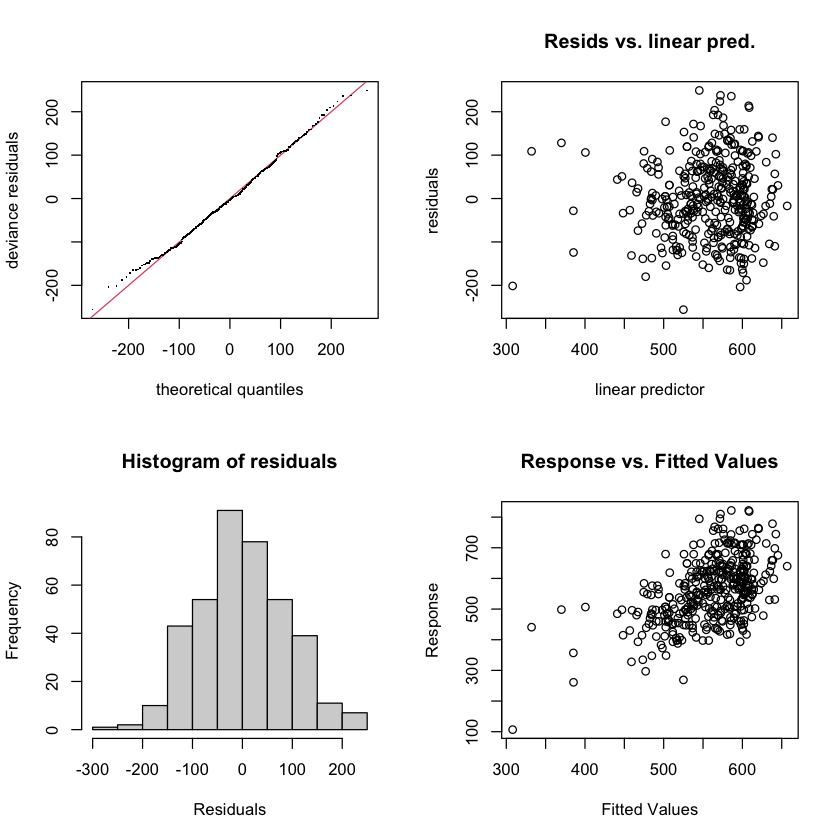

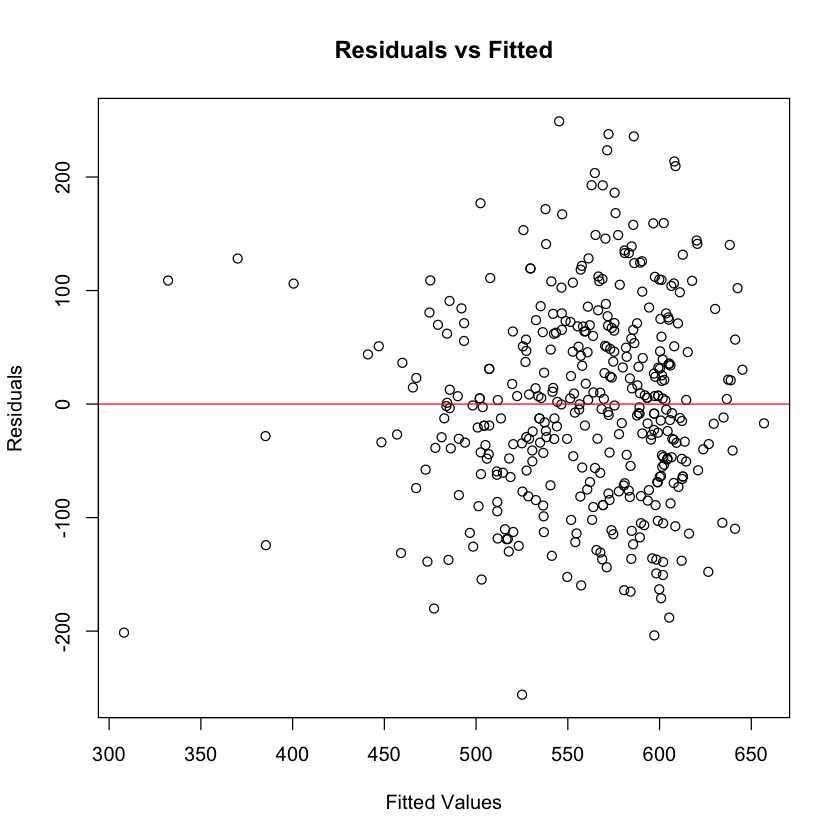

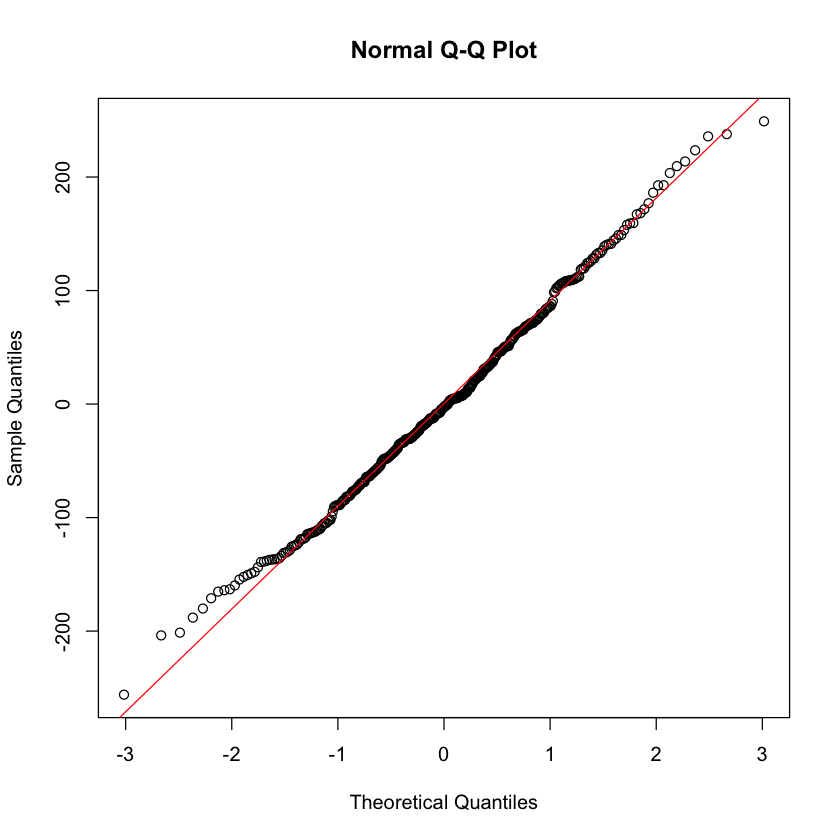

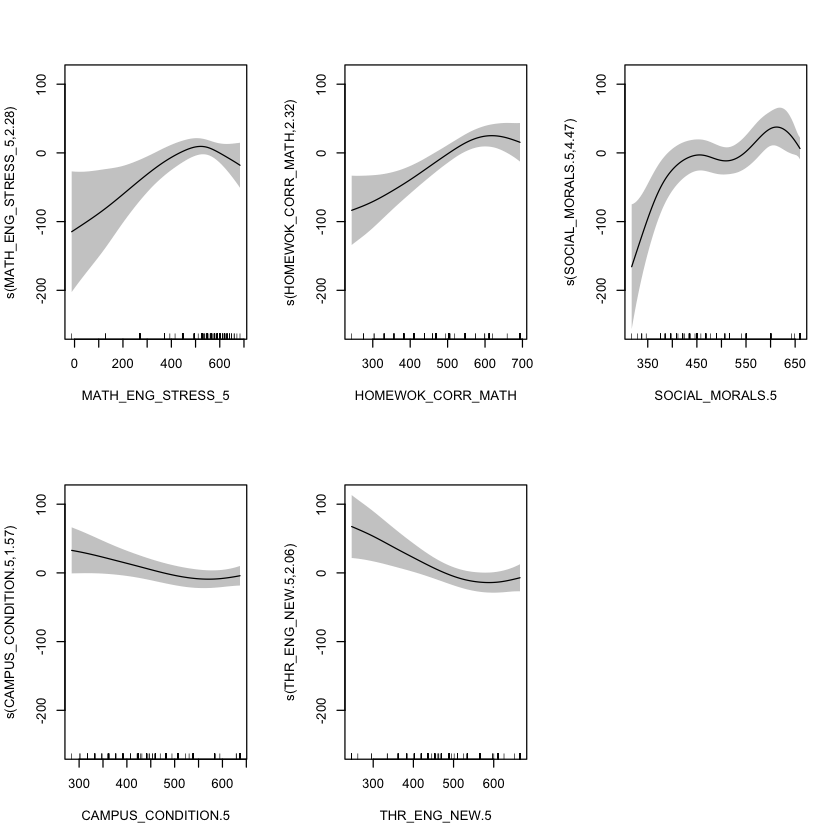

In [40]:
# Train final model on full data
final_model <- gam(MATH5 ~ 
 s(MATH_ENG_STRESS_5, k = 28) +
  s(HOMEWOK_CORR_MATH)+
  HOMEWOK_CORR_ENG.5 +
  s(SOCIAL_MORALS.5,k=27, bs = "ad")+
    s(CAMPUS_CONDITION.5, k = 29)+
    ATTITUDE_ENG.5+s(THR_ENG_NEW.5),
  data = data_imputed2, method = "REML",select = TRUE
)
summary(final_model)
gam.check(final_model)

# Predict and compute residuals
data_imputed2$residuals <- residuals(final_model)
data_imputed2$fitted <- predict(final_model)

plot(data_imputed2$fitted, data_imputed2$residuals,
     main = "Residuals vs Fitted", xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, col = "red")

qqnorm(data_imputed2$residuals)
qqline(data_imputed2$residuals, col = "red")


plot(final_model, pages = 1, shade = TRUE, rug = TRUE, seWithMean = TRUE)



In [37]:
library(mgcv)


set.seed(123)
folds <- sample(1:5, nrow(data_imputed2), replace = TRUE)

rmse_list <- numeric(5)
r2_list <- numeric(5)

for (k in 1:5) {
  train_data <- data_imputed2[folds != k, ]
  test_data  <- data_imputed2[folds == k, ]
  
  model <- gam(ENG5 ~               
                INTEREST_ENG.5 +
    STUDYINTEREST_MATH.5 +
    MATH_ENG_STRESS_5 +HARD_WORK.5+
    s(THR_ENG_NEW.5) +              # max unique = 31, +++
    s(HOMEWOK_CORR_MATH) +         # max unique = 24, ++++
    s(SOCIAL_MORALS.5) +        # max unique = 32, 
    s(STRATEGE_ENG.5) +            # max unique = 60, 
    s(HOMEWOK_CORR_ENG.5),
               data = train_data, method = "REML", select = TRUE)
  
  print(summary(model))      
  preds <- predict(model, newdata = test_data)
  actual <- test_data$ENG5
  
  rmse_list[k] <- sqrt(mean((preds - actual)^2))
  r2_list[k] <- 1 - sum((preds - actual)^2) / sum((actual - mean(actual))^2)
}

# Results
mean_rmse <- mean(rmse_list)
mean_r2 <- mean(r2_list)

cat("Cross-validated RMSE:", round(mean_rmse, 2), "\n")
cat("Cross-validated R²:", round(mean_r2, 4), "\n")



Family: gaussian 
Link function: identity 

Formula:
ENG5 ~ INTEREST_ENG.5 + STUDYINTEREST_MATH.5 + MATH_ENG_STRESS_5 + 
    HARD_WORK.5 + s(THR_ENG_NEW.5) + s(HOMEWOK_CORR_MATH) + s(SOCIAL_MORALS.5) + 
    s(STRATEGE_ENG.5) + s(HOMEWOK_CORR_ENG.5)

Parametric coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          361.23224   65.64841   5.503 8.18e-08 ***
INTEREST_ENG.5         0.26621    0.07820   3.404 0.000756 ***
STUDYINTEREST_MATH.5  -0.23386    0.06149  -3.803 0.000174 ***
MATH_ENG_STRESS_5      0.19382    0.05037   3.848 0.000146 ***
HARD_WORK.5            0.17091    0.07251   2.357 0.019079 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                          edf Ref.df     F  p-value    
s(THR_ENG_NEW.5)      2.40686      9 1.569 0.000628 ***
s(HOMEWOK_CORR_MATH)  2.55646      9 4.717  < 2e-16 ***
s(SOCIAL_MORALS.5)    4.45085      9 2.079 0.000775 ***
s(STRATEGE_E


Family: gaussian 
Link function: identity 

Formula:
ENG5 ~ INTEREST_ENG.5 + STUDYINTEREST_MATH.5 + MATH_ENG_STRESS_5 + 
    HARD_WORK.5 + s(THR_ENG_NEW.5, k = 29, bs = "cs") + s(HOMEWOK_CORR_MATH, 
    k = 20, bs = "ad") + s(SOCIAL_MORALS.5, k = 27, bs = "ad") + 
    s(STRATEGE_ENG.5, k = 47, bs = "tp") + s(HOMEWOK_CORR_ENG.5, 
    k = 40, bs = "ad")

Parametric coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          347.19540   59.33495   5.851 1.08e-08 ***
INTEREST_ENG.5         0.27105    0.07008   3.868  0.00013 ***
STUDYINTEREST_MATH.5  -0.20996    0.05643  -3.720  0.00023 ***
MATH_ENG_STRESS_5      0.21124    0.04621   4.572 6.61e-06 ***
HARD_WORK.5            0.14985    0.06347   2.361  0.01874 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                        edf Ref.df     F  p-value    
s(THR_ENG_NEW.5)      2.701     28 0.576 0.000270 ***
s(HOMEWOK_CORR_MATH)  3


Method: REML   Optimizer: outer newton
full convergence after 21 iterations.
Gradient range [-0.006923345,0.001472551]
(score 2320.63 & scale 7644.507).
eigenvalue range [-0.0001705545,192.5443].
Model rank =  163 / 163 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                         k'   edf k-index p-value    
s(THR_ENG_NEW.5)      28.00  2.70    0.80  <2e-16 ***
s(HOMEWOK_CORR_MATH)  19.00  3.36    0.77  <2e-16 ***
s(SOCIAL_MORALS.5)    26.00  4.84    0.82  <2e-16 ***
s(STRATEGE_ENG.5)     46.00  1.84    0.92   0.045 *  
s(HOMEWOK_CORR_ENG.5) 39.00  3.17    0.85  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


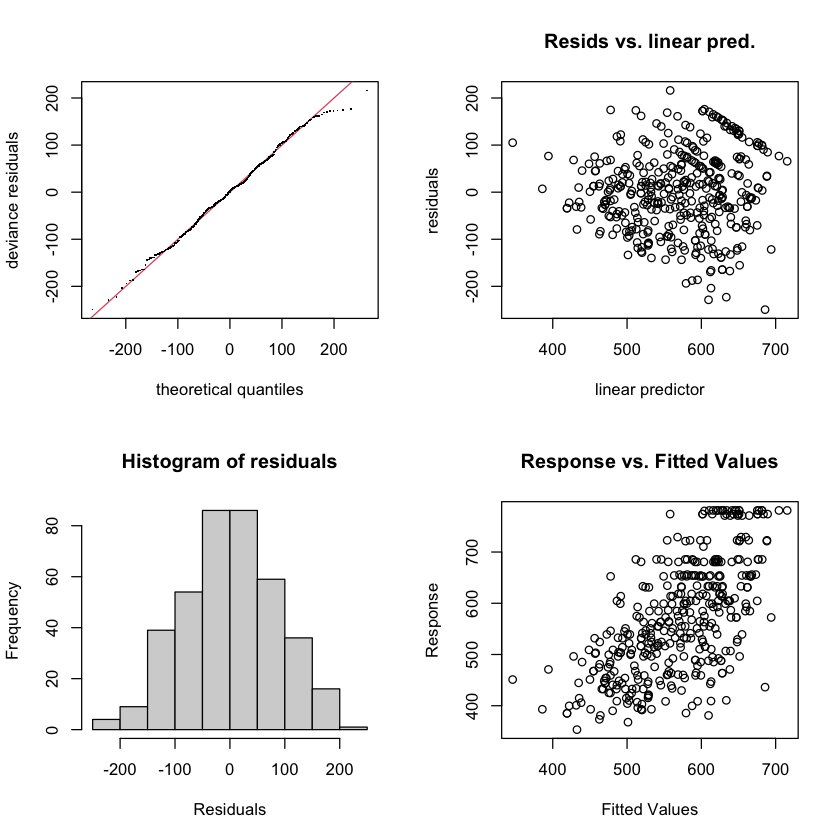

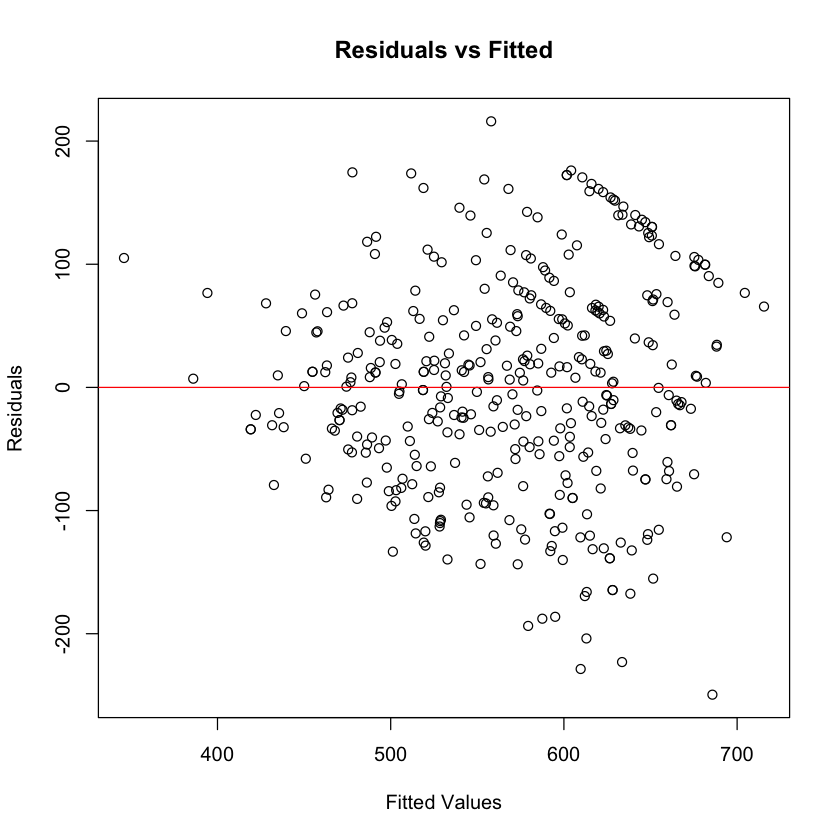

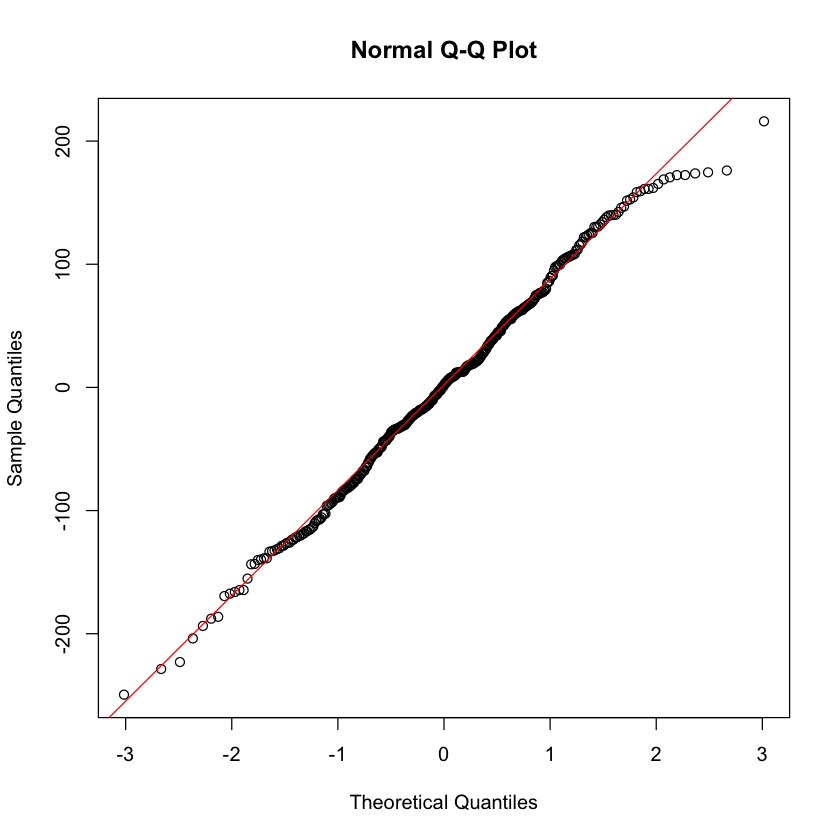

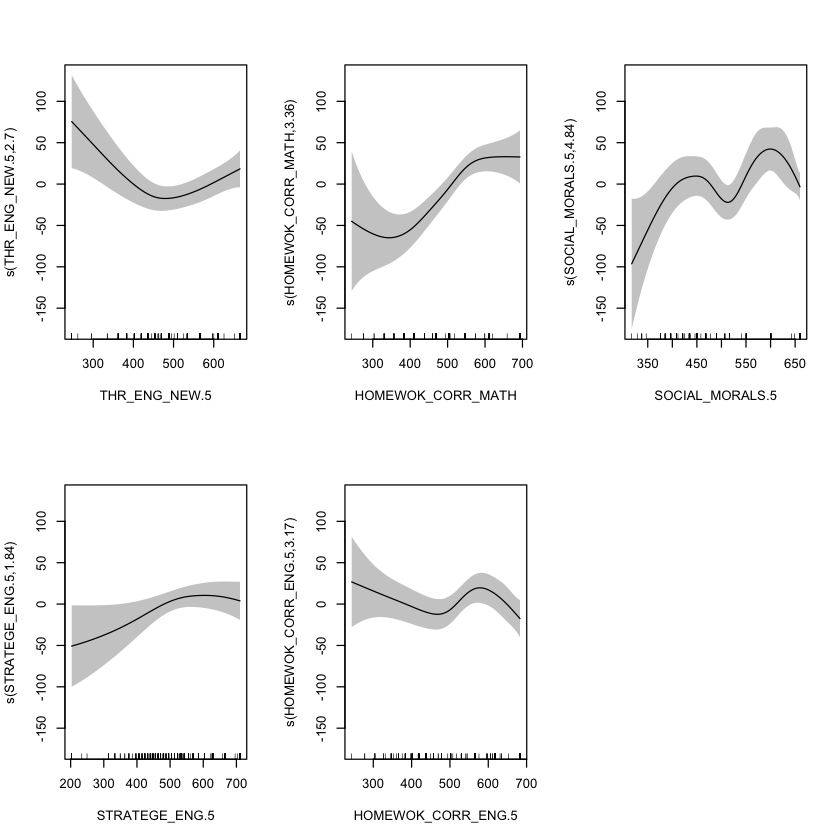

In [41]:
# Train final model on full data
final_model <- gam(ENG5 ~               
                INTEREST_ENG.5 +
    STUDYINTEREST_MATH.5 +
    MATH_ENG_STRESS_5 +HARD_WORK.5+
    s(THR_ENG_NEW.5, k = 29,bs="cs") +              # max unique = 31, +++
    s(HOMEWOK_CORR_MATH, k = 20,bs="ad") +         # max unique = 24, ++++
    s(SOCIAL_MORALS.5, k = 27, bs = "ad") +        # max unique = 32, 
    s(STRATEGE_ENG.5, k = 47,bs="tp") +            # max unique = 60, 
    s(HOMEWOK_CORR_ENG.5, k = 40,bs="ad"),
  data = data_imputed2, method = "REML",select = TRUE
)
summary(final_model)
gam.check(final_model)

# Predict and compute residuals
data_imputed2$residuals <- residuals(final_model)
data_imputed2$fitted <- predict(final_model)

plot(data_imputed2$fitted, data_imputed2$residuals,
     main = "Residuals vs Fitted", xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, col = "red")

qqnorm(data_imputed2$residuals)
qqline(data_imputed2$residuals, col = "red")
plot(final_model, pages = 1, shade = TRUE, rug = TRUE, seWithMean = TRUE)

In [42]:
library(mgcv)

# Define 5-fold CV folds
set.seed(123)
folds <- sample(1:5, nrow(data_imputed2), replace = TRUE)

rmse_list <- numeric(5)
r2_list <- numeric(5)

for (k in 1:5) {
  train_data <- data_imputed2[folds != k, ]
  test_data  <- data_imputed2[folds == k, ]
  
  model <- gam(ENG9 ~ 
    STRATEGE_ENG.9 +                         
  MANNERS.9 +                                
  HARD_WORK.9 +                              
  SELF_PROTECTION.9 + SENSE_HONOR.9+GRA_GEOMETRY.9+ SATISIFACTION_LEARNING_ENG.9,
               data = train_data, method = "REML", select = TRUE)
  
  print(summary(model))      
  preds <- predict(model, newdata = test_data)
  actual <- test_data$ENG9
  
  rmse_list[k] <- sqrt(mean((preds - actual)^2))
  r2_list[k] <- 1 - sum((preds - actual)^2) / sum((actual - mean(actual))^2)
}

# Results
mean_rmse <- mean(rmse_list)
mean_r2 <- mean(r2_list)

cat("Cross-validated RMSE:", round(mean_rmse, 2), "\n")
cat("Cross-validated R²:", round(mean_r2, 4), "\n")



Family: gaussian 
Link function: identity 

Formula:
ENG9 ~ STRATEGE_ENG.9 + MANNERS.9 + HARD_WORK.9 + SELF_PROTECTION.9 + 
    SENSE_HONOR.9 + GRA_GEOMETRY.9 + SATISIFACTION_LEARNING_ENG.9

Parametric coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  114.12270   50.36695   2.266 0.024172 *  
STRATEGE_ENG.9                 0.41980    0.07908   5.308 2.15e-07 ***
MANNERS.9                     -0.33762    0.07295  -4.628 5.49e-06 ***
HARD_WORK.9                   -0.11395    0.06113  -1.864 0.063306 .  
SELF_PROTECTION.9              0.27101    0.06928   3.912 0.000113 ***
SENSE_HONOR.9                  0.21610    0.06535   3.307 0.001058 ** 
GRA_GEOMETRY.9                 0.24765    0.05329   4.648 5.03e-06 ***
SATISIFACTION_LEARNING_ENG.9   0.13954    0.05560   2.510 0.012599 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.358   Deviance explained = 37.3%
-REML = 1773.1  Scale est.


Family: gaussian 
Link function: identity 

Formula:
ENG9 ~ STRATEGE_ENG.9 + MANNERS.9 + HARD_WORK.9 + SELF_PROTECTION.9 + 
    SENSE_HONOR.9 + GRA_GEOMETRY.9 + SATISIFACTION_LEARNING_ENG.9

Parametric coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  92.41289   44.88484   2.059 0.040182 *  
STRATEGE_ENG.9                0.37030    0.07023   5.272 2.26e-07 ***
MANNERS.9                    -0.27404    0.06706  -4.086 5.34e-05 ***
HARD_WORK.9                  -0.17025    0.05597  -3.042 0.002513 ** 
SELF_PROTECTION.9             0.31182    0.06255   4.985 9.42e-07 ***
SENSE_HONOR.9                 0.21158    0.05895   3.589 0.000375 ***
GRA_GEOMETRY.9                0.26795    0.04849   5.526 6.08e-08 ***
SATISIFACTION_LEARNING_ENG.9  0.16423    0.04985   3.294 0.001079 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.344   Deviance explained = 35.6%
-REML = 2241.2  Scale est. = 5513  


Method: REML   Optimizer: outer newton
full convergence after 5 iterations.
Gradient range [-0.0004649851,-0.0004649851]
(score 2241.229 & scale 5513.044).
Hessian positive definite, eigenvalue range [191.0005,191.0005].
Model rank =  8 / 8 



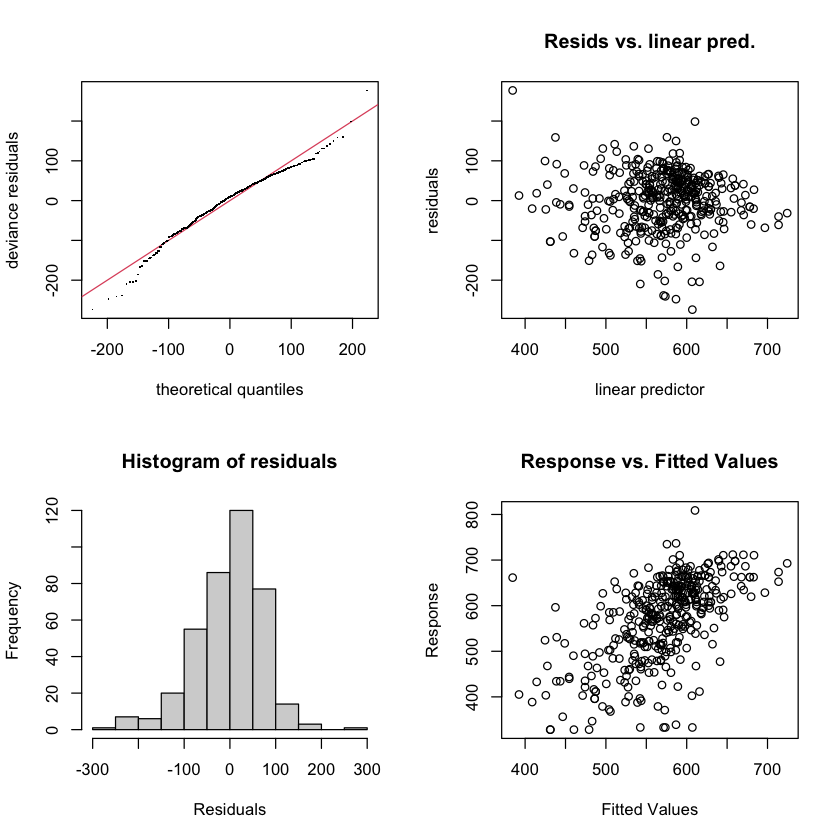

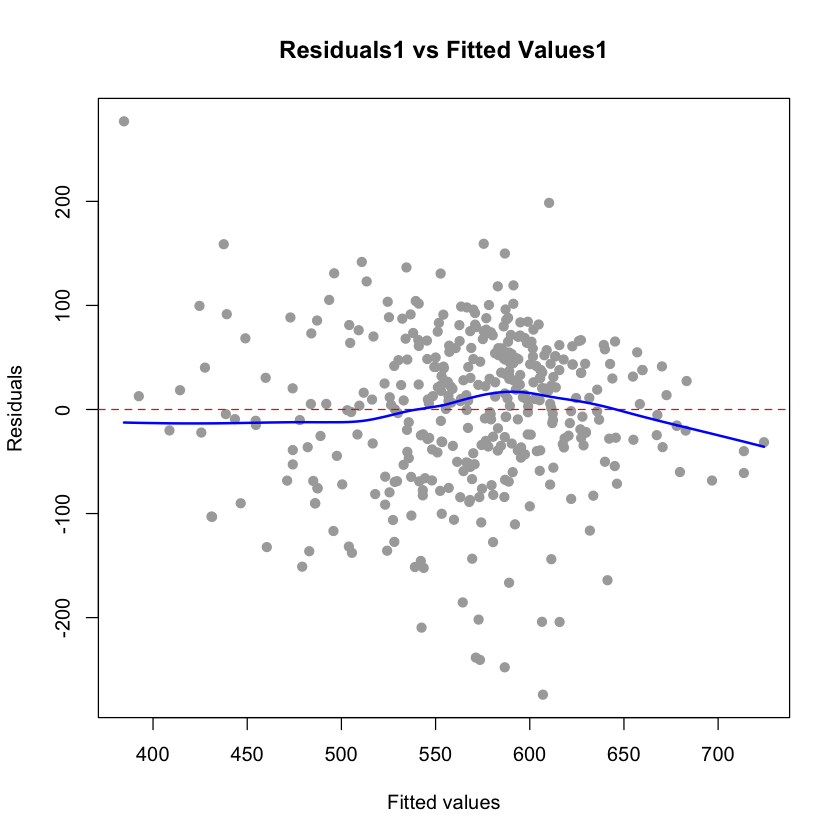

In [45]:
model <- gam(ENG9 ~ 
    STRATEGE_ENG.9 +                         
  MANNERS.9 +                                
  HARD_WORK.9 +                              
  SELF_PROTECTION.9 + SENSE_HONOR.9+GRA_GEOMETRY.9+ SATISIFACTION_LEARNING_ENG.9 # was 5, increase to 7
  ,data = data_imputed2, method = "REML",select = TRUE)

summary(model)
gam.check(model)
plot(model$fitted.values, resid(model),
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals1 vs Fitted Values1", pch = 19, col = "darkgray")
abline(h = 0, lty = 2, col = "red")
lines(lowess(model$fitted.values, resid(model)), col = "blue", lwd = 2)




In [46]:
library(mgcv)


set.seed(123)
folds <- sample(1:5, nrow(data_imputed2), replace = TRUE)

rmse_list <- numeric(5)
r2_list <- numeric(5)

for (k in 1:5) {
  train_data <- data_imputed2[folds != k, ]
  test_data  <- data_imputed2[folds == k, ]
  
  model <- gam(MATH9 ~               
MANNERS.9 + 
  s(SENSE_HONOR.9, k = 4) + 
  HARD_WORK.9 + 
  s(GRA_GEOMETRY.9, k = 5) + 
  SELF_PROTECTION.9 + 
  SATISIFACTION_LEARNING_MATH.9 + 
 + s(THRIFTY.9)+s(SOLIDARITY_FRIENDSHIP.9,k=15)
               +s(HOMEWOK_CORR_ENG.9,k=15),
               data = train_data, method = "REML", select = TRUE)
  
  print(summary(model))      
  preds <- predict(model, newdata = test_data)
  actual <- test_data$MATH9
  
  rmse_list[k] <- sqrt(mean((preds - actual)^2))
  r2_list[k] <- 1 - sum((preds - actual)^2) / sum((actual - mean(actual))^2)
}

# Results
mean_rmse <- mean(rmse_list)
mean_r2 <- mean(r2_list)

cat("Cross-validated RMSE:", round(mean_rmse, 2), "\n")
cat("Cross-validated R²:", round(mean_r2, 4), "\n")



Family: gaussian 
Link function: identity 

Formula:
MATH9 ~ MANNERS.9 + s(SENSE_HONOR.9, k = 4) + HARD_WORK.9 + s(GRA_GEOMETRY.9, 
    k = 5) + SELF_PROTECTION.9 + SATISIFACTION_LEARNING_MATH.9 + 
    +s(THRIFTY.9) + s(SOLIDARITY_FRIENDSHIP.9, k = 15) + s(HOMEWOK_CORR_ENG.9, 
    k = 15)

Parametric coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   565.39999   61.70905   9.162  < 2e-16 ***
MANNERS.9                      -0.26397    0.08211  -3.215  0.00145 ** 
HARD_WORK.9                    -0.15867    0.06560  -2.419  0.01618 *  
SELF_PROTECTION.9               0.17271    0.07102   2.432  0.01561 *  
SATISIFACTION_LEARNING_MATH.9   0.27311    0.04678   5.839 1.39e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                             edf Ref.df     F  p-value    
s(SENSE_HONOR.9)           1.693      3 5.203 9.07e-05 ***
s(GRA_GEOMETRY.9)      


Family: gaussian 
Link function: identity 

Formula:
MATH9 ~ MANNERS.9 + s(SENSE_HONOR.9, k = 4) + HARD_WORK.9 + s(GRA_GEOMETRY.9, 
    k = 5) + SELF_PROTECTION.9 + SATISIFACTION_LEARNING_MATH.9 + 
    +s(THRIFTY.9) + s(SOLIDARITY_FRIENDSHIP.9, k = 15) + s(HOMEWOK_CORR_ENG.9, 
    k = 15)

Parametric coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   542.76017   53.05781  10.230  < 2e-16 ***
MANNERS.9                      -0.27020    0.07317  -3.693 0.000255 ***
HARD_WORK.9                    -0.14878    0.05837  -2.549 0.011196 *  
SELF_PROTECTION.9               0.21448    0.06266   3.423 0.000688 ***
SATISIFACTION_LEARNING_MATH.9   0.26320    0.04119   6.389 4.94e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                             edf Ref.df      F  p-value    
s(SENSE_HONOR.9)           1.922      3  5.877 4.46e-05 ***
s(GRA_GEOMETRY.9)    


Method: REML   Optimizer: outer newton
full convergence after 8 iterations.
Gradient range [-0.0007477903,0.0005421689]
(score 2240.608 & scale 5301.042).
Hessian positive definite, eigenvalue range [8.436305e-05,192.5215].
Model rank =  49 / 49 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                              k'   edf k-index p-value    
s(SENSE_HONOR.9)            3.00  1.92    1.00    0.50    
s(GRA_GEOMETRY.9)           4.00  2.59    0.94    0.12    
s(THRIFTY.9)                9.00  2.47    0.98    0.29    
s(SOLIDARITY_FRIENDSHIP.9) 14.00  1.57    0.87  <2e-16 ***
s(HOMEWOK_CORR_ENG.9)      14.00  1.22    0.85  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


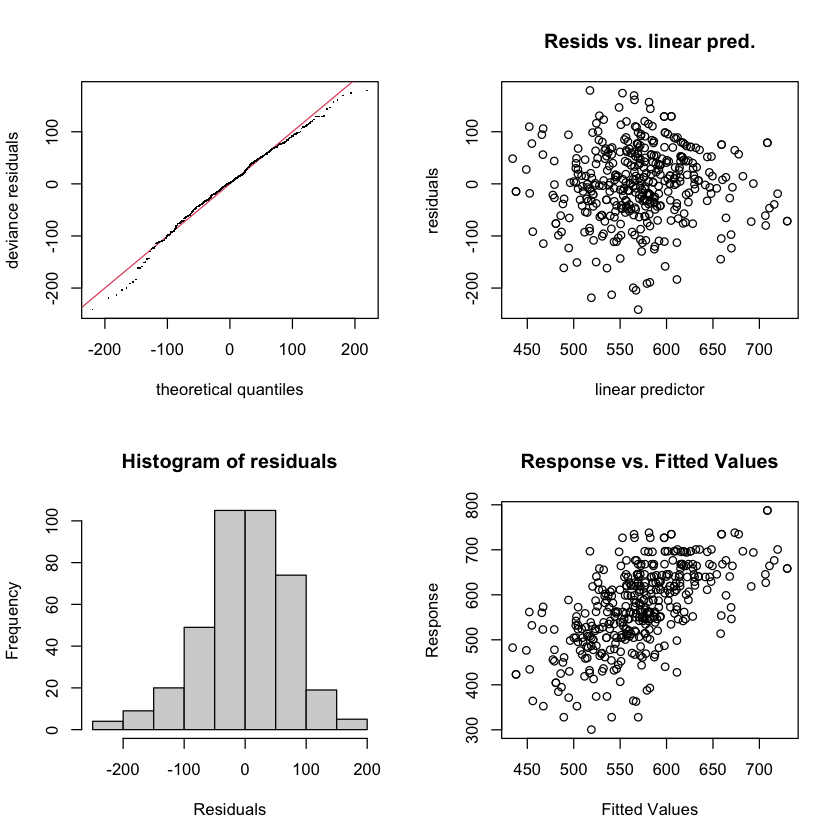

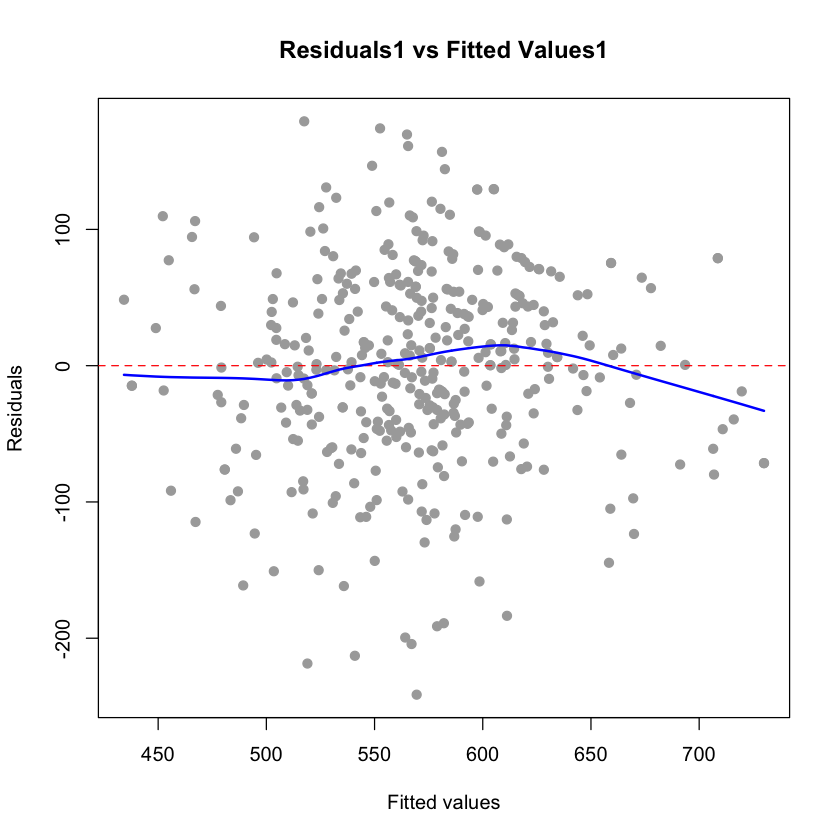

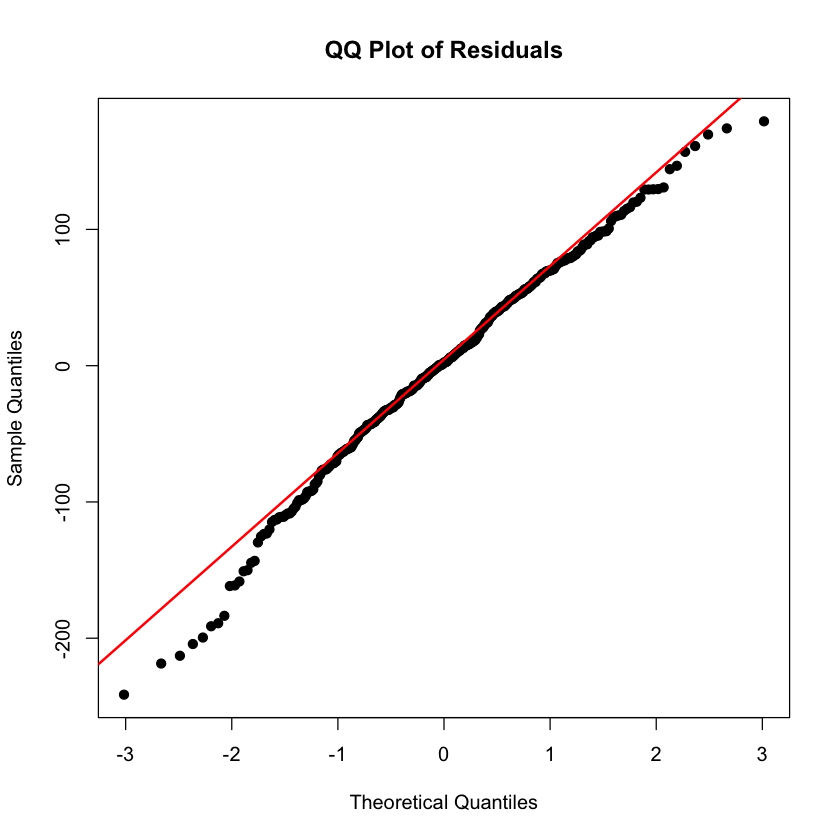

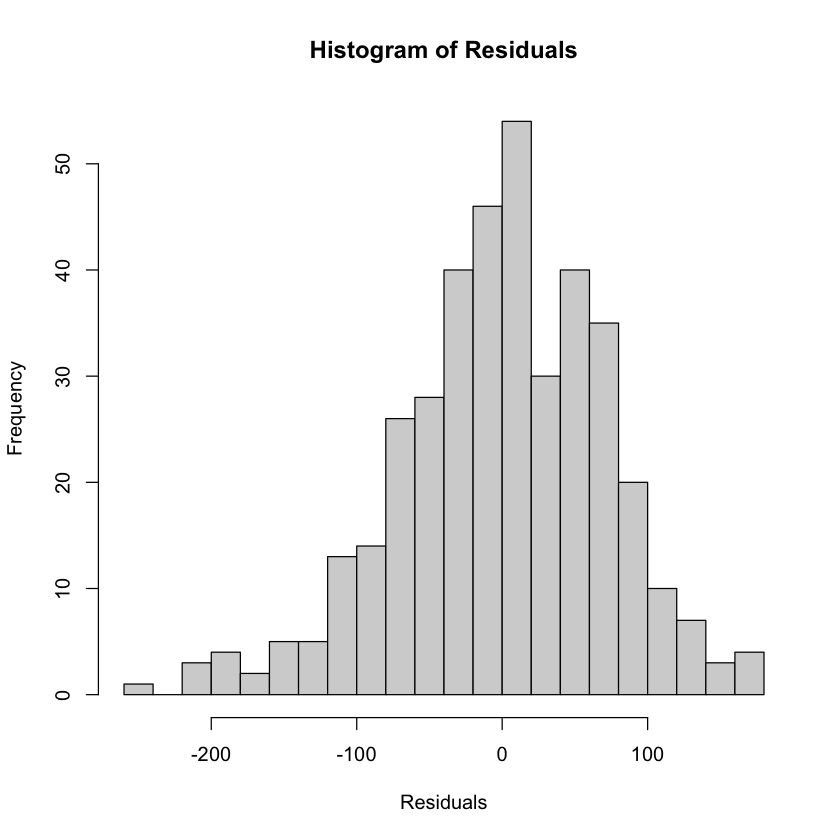

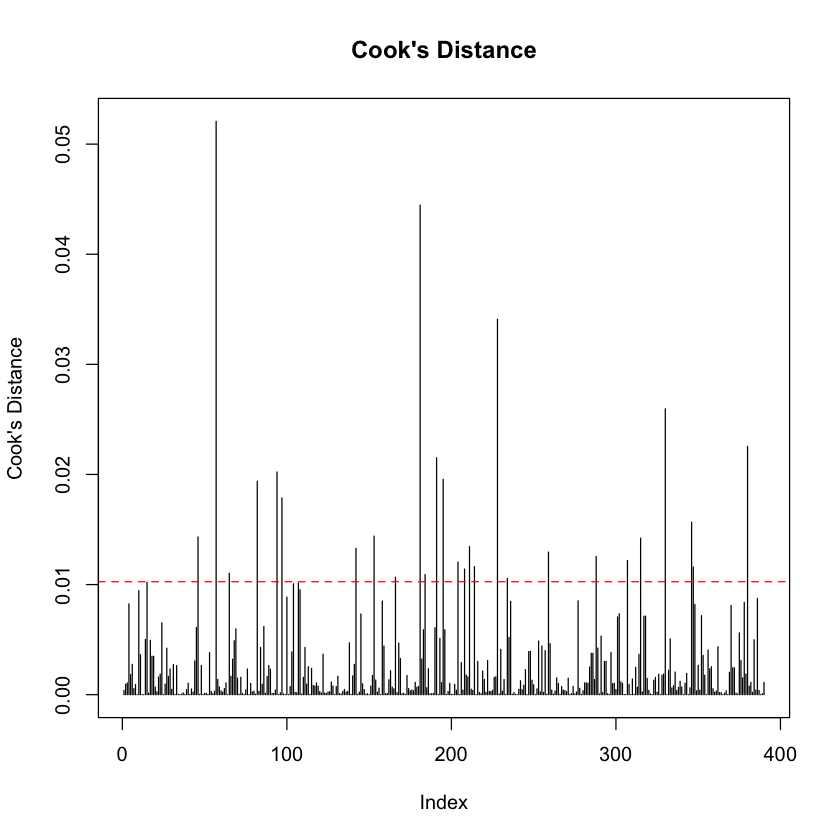

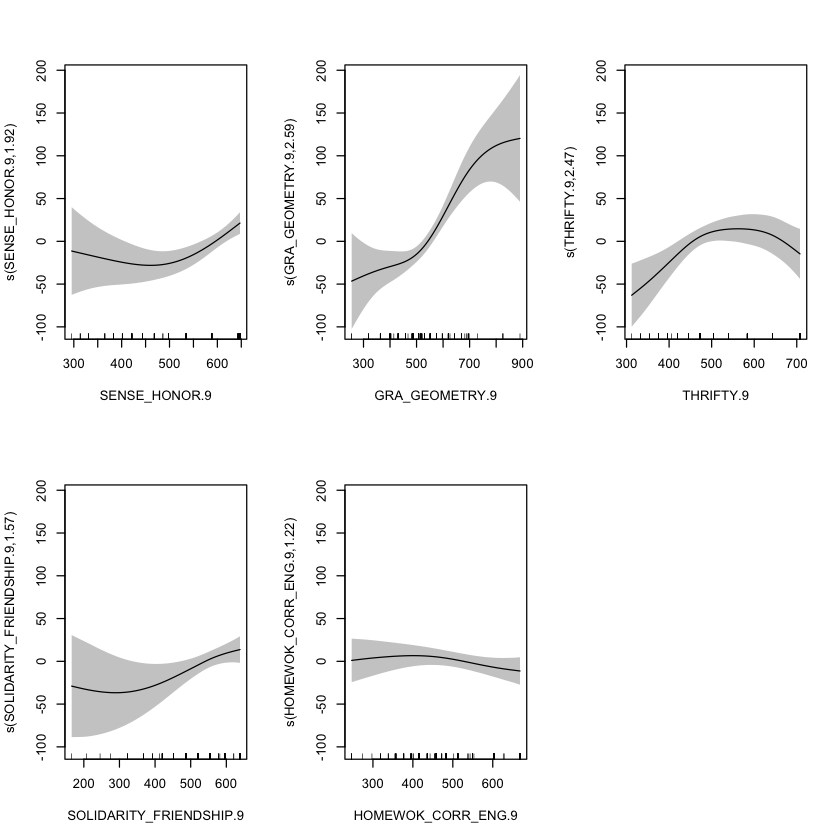

In [49]:
library(mgcv)

# === 1. Fit final model on full data ===
model <- gam(MATH9 ~               
MANNERS.9 + 
  s(SENSE_HONOR.9, k = 4) + 
  HARD_WORK.9 + 
  s(GRA_GEOMETRY.9, k = 5) + 
  SELF_PROTECTION.9 + 
  SATISIFACTION_LEARNING_MATH.9 + 
 + s(THRIFTY.9)+s(SOLIDARITY_FRIENDSHIP.9,k=15)
               +s(HOMEWOK_CORR_ENG.9,k=15),
             data = data_imputed2,
             method = "REML", select = TRUE)

summary(model)
gam.check(model)
plot(model$fitted.values, resid(model),
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals1 vs Fitted Values1", pch = 19, col = "darkgray")
abline(h = 0, lty = 2, col = "red")
lines(lowess(model$fitted.values, resid(model)), col = "blue", lwd = 2)


qqnorm(resid(model), pch = 19, main = "QQ Plot of Residuals")
qqline(resid(model), col = "red", lwd = 2)
hist(resid(model), breaks = 30,
     main = "Histogram of Residuals",
     xlab = "Residuals", col = "lightgray", border = "black")
plot(cooks.distance(model), type = "h",
     main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / nrow(data_imputed2), col = "red", lty = 2)

plot(model, pages = 1, shade = TRUE, rug = TRUE, seWithMean = TRUE)

  #            MANNERS.9 +                         # linear (edf ≈ 0.91)
  # s(SENSE_HONOR.9, k = 4) +          # smooth (edf = 2.10, strong)
  # HARD_WORK.9 +                      # linear (edf = 1.22, borderline)
  # s(GRA_GEOMETRY.9, k = 4) +         # smooth (edf = 2.14, strong)
  # SELF_PROTECTION.9 +               # linear (edf = 1.33, borderline)
  # SATISIFACTION_LEARNING_MATH.9 +   # linear (edf = 0.97, significant) 
  # te(STUDYATTITUDE_MATH_9, THRIFTY.9, k = c(4, 4)) +  # significant
  # te(SOCIAL_MORALS.9, SOLIDARITY_FRIENDSHIP.9, k = c(4, 4)) +# 
  # te(AWARE.9, MORAL_DUTY.9, k = c(4, 4))+
             

In [5]:
library(mgcv)

toBibtex(citation("mgcv"))
toBibtex(citation("ggplot2"))
toBibtex(citation("xgboost"))
toBibtex(citation("randomForest"))
toBibtex(citation("glmnet"))



@Article{,
  title = {Fast stable restricted maximum likelihood and marginal 
likelihood estimation of semiparametric generalized linear models},
  journal = {Journal of the Royal Statistical Society (B)},
  volume = {73},
  number = {1},
  pages = {3-36},
  year = {2011},
  author = {S. N. Wood},
}

@Article{,
  title = {Smoothing parameter and model selection for general smooth models (with discussion)},
  author = {S.N. Wood and {N.} and {Pya} and B. S{"a}fken},
  journal = {Journal of the American Statistical Association},
  year = {2016},
  pages = {1548-1575},
  volume = {111},
}

@Article{,
  title = {Stable and efficient multiple smoothing parameter estimation for 
         generalized additive models},
  journal = {Journal of the American Statistical Association},
  volume = {99},
  number = {467},
  pages = {673-686},
  year = {2004},
  author = {S. N. Wood},
}

@Book{,
  title = {Generalized Additive Models: An Introduction with R},
  year = {2017},
  author = {S.N Wood},
  

@Book{,
  author = {Hadley Wickham},
  title = {ggplot2: Elegant Graphics for Data Analysis},
  publisher = {Springer-Verlag New York},
  year = {2016},
  isbn = {978-3-319-24277-4},
  url = {https://ggplot2.tidyverse.org},
}

@Manual{,
  title = {xgboost: Extreme Gradient Boosting},
  author = {Tianqi Chen and Tong He and Michael Benesty and Vadim Khotilovich and Yuan Tang and Hyunsu Cho and Kailong Chen and Rory Mitchell and Ignacio Cano and Tianyi Zhou and Mu Li and Junyuan Xie and Min Lin and Yifeng Geng and Yutian Li and Jiaming Yuan},
  year = {2025},
  note = {R package version 1.7.11.1},
  url = {https://CRAN.R-project.org/package=xgboost},
  doi = {10.32614/CRAN.package.xgboost},
}

@Article{,
  title = {Classification and Regression by randomForest},
  author = {Andy Liaw and Matthew Wiener},
  journal = {R News},
  year = {2002},
  volume = {2},
  number = {3},
  pages = {18-22},
  url = {https://CRAN.R-project.org/doc/Rnews/},
}

@Article{,
  title = {Regularization Paths for Generalized Linear Models via Coordinate Descent},
  author = {Jerome Friedman and Trevor Hastie and Robert Tibshirani},
  journal = {Journal of Statistical Software},
  year = {2010},
  volume = {33},
  number = {1},
  pages = {1--22},
  doi = {10.18637/jss.v033.i01},
}

@Article{,
  title = {Regularization Paths for Cox's Proportional Hazards Model via Coordinate Descent},
  author = {Noah Simon and Jerome Friedman and Trevor Hastie and Robert Tibshirani},
  journal = {Journal of Statistical Software},
  year = {2011},
  volume = {39},
  number = {5},
  pages = {1--13},
  doi = {10.18637/jss.v039.i05},
}

@Article{,
  title = {Elastic Net Regularization Paths for All Generalized Linear Models},
  author = {J. Kenneth Tay and Balasubramanian Narasimhan and Trevor Hastie},
  journal = {Journal of Statistical Software},
  year = {2023},
  volume = {106},
  number = {1},
  pages = {1--31},
  doi = {10.18637/jss.v106.i01},
}